<a href="https://colab.research.google.com/github/DimaFrank/Mathematical_Programming/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1

תחילה נגדיר הסתברויות

p,q,s -ל

נגריל אלף מספרים מהסתברות בינומית שמייצגים אלף איש שבאו לעשות בדיקה ונמצאו כחולים 

בקורונה עם הסתברות של 0.2

הסתברות שקיימת באוכלוסיה על פי הנתון בשאלה

 אחרי זה נעבור איטרטיבית על המדגם שהגרלנו ונגריל הסתברויות לקבל 

 true positive/
 false negative

 אם בהגרלה קיבלנו תצפית עם ערך 1 (חולה)- נגריל הסברות בינומית שהבדיקה נכונה ונעדכן את הערך המקורי

 true psitive
 
 אם בהגרלה קיבלנו 0 (בריא)- נגדיל הסתברות בינומית שהבדיקה שגויה
 ונעדכן את הערך המקורי
 
 false negative

 התוצאות נשמור במערך הנקרא: 
 
 test_results

In [2]:
s = 0.2
p = 0.95
q = 0.1

# Generate binary data indicating whether each person is infected (1) or not (0)
infected = np.random.binomial(1, s, 1000)

# Generate test results based on the probabilities p and q
test_results = np.zeros(1000)
for i in range(1000):
    if infected[i] == 1:
        test_results[i] = np.random.binomial(1, p)
    else:
        test_results[i] = np.random.binomial(1, q)

[Text(0.5, 1.0, 'Density of test results')]

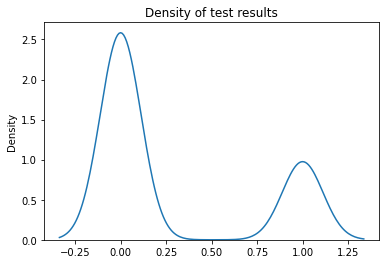

In [3]:
sns.kdeplot(test_results).set(title='Density of test results')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


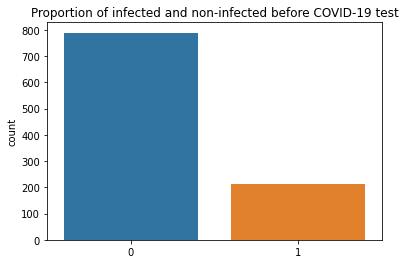

In [4]:
sns.countplot(infected).set(title='Proportion of infected and non-infected before COVID-19 test')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


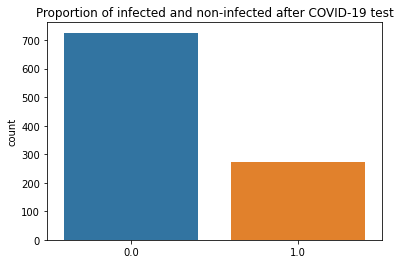

In [5]:
sns.countplot(test_results).set(title='Proportion of infected and non-infected after COVID-19 test')
plt.show()

# Question 2

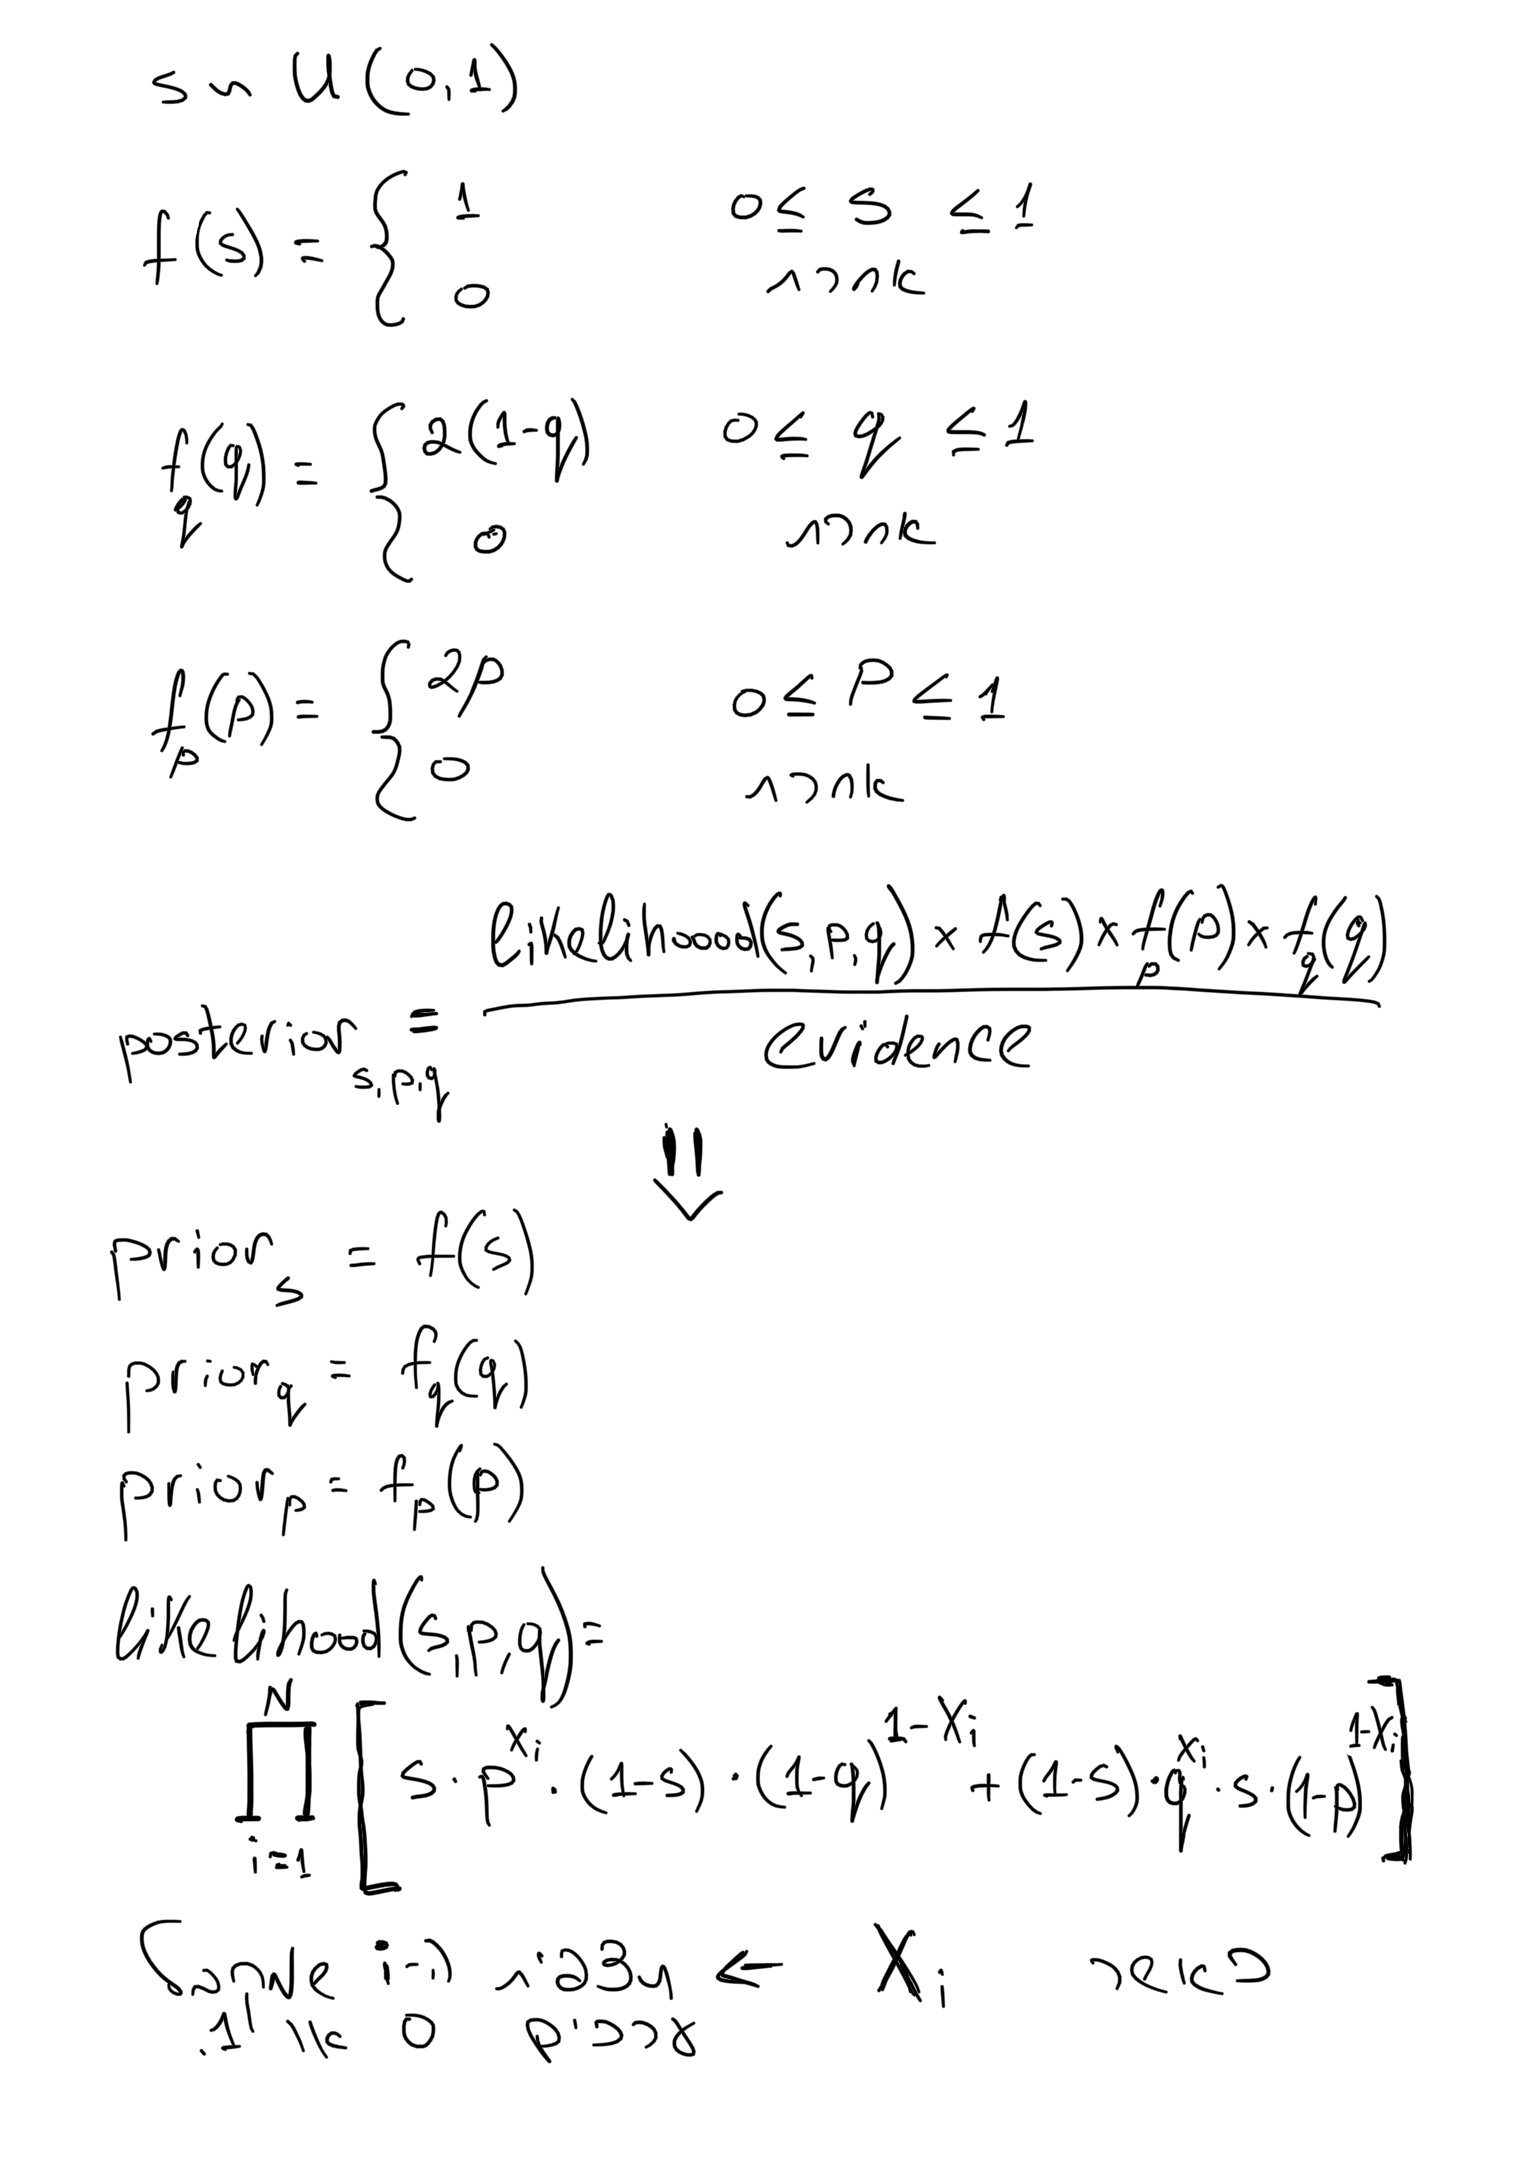

# Question 3


הפונקציה מטה זו פונקציה של הפוסטריור שמקבלת כקלט את מערך שהגרלנו קודם ואת המערך עם שלושת הפרמטרים 

s, p ו-q

ומחשבת את ה-פוסטריות בהינתן תוצאות הבדיקה.



likelihood-ה

מחושבת כמכפלה של סיכויים של כל תצפית עבור כל תוצאת הבדיקה

s ההתפלגות ה-פריור של הפרמטר

נלקחה מהסתברות אחידה מכיוון שאנחנו לא יודעים את הפונקציה שלו ולכן יש סיכוי זהה לקבל כל ערך בין 0 ל-1

p ו- q ההתפלגויות ה-פריור של הפרמטרים

מוגדרות כפי שנתון בשאלה

הפונקציה מחזירה את המכפלה של הלייקליהוד ופונקציות הפריור

In [10]:
import numpy as np
from scipy.stats import uniform, bernoulli

def posterior_of_s_p_q(test_results, parameters):
    s=parameters[0]
    p=parameters[1]
    q=parameters[2]

    likelihood = 1
    for i in range(len(test_results)):
        if test_results[i] == 1:
            likelihood *= s * p + (1-s) * q
        else:
            likelihood *= (1-s) * (1-p) + s * (1-q)
    
    prior_s = uniform.pdf(s, 0, 1)
    prior_p = 2 * p if 0 <= p <= 1 else 0
    prior_q = 2 * (1-q) if 0 <= q <= 1 else 0
    
    return likelihood * prior_s * prior_p * prior_q

**Using the MCMC method, create 10,000 independent samples from the posterior.**


הקוד מטה מיישם את האלגוריתם הבא שנקרא:

metropolis hastings
*************************************************************
1)

האלגוריתם עובר איטרטיבית על כל תצפית במערך שהעברנו אליו כקלט
ובכל איטרציה מגריל שלושה פרמטרים מתוך הסתברות נורמאלית עם סטיית תקן קטנה שהגדרנו מראש
**************************************************************

2)

acceptance probability מחשב

על ידי הנוסחה

min(1, (posterior(generated_sample) / posterior(initial_guess))

initial_gueess כאשר

זה ניחוש ראשוני שהגדרנו מראש ושהולך להתעדכן במשך הריצה של האלגוריתם
**************************************************************
3)

מגרילים משתנה יוניפורמי בין 0 ו-1

**************************************************************

4)

שלב ההחלטה:

אם המשתנה היוניפורמי שהגרלנו בשלב הקודם הוא קטן יותר 

acceptance_probability -מה

אז נקבל את התוצאה ונשמור אותה בצד
**************************************************************

5)

הוספתי עוד שלב נוסף לאלגוריתם שמיוצג בסכמה מטה.

על מנת להבטיח שהתוצאות יהיו בלתי-תלויות הוספתי משתנים

lag -ו burn_in 

lag -ה

מגדיר כמה איטרציות לרוץ על כל תצפית לפני השמירה

על-ידי לקיחת מודולו 100 אני מגדיר שכל תצפית תעבור 100 איטרציות עד שתישמר בצד

burn_in -וה

אומר כמה איטרציות לחכות עד תחילת השמירה אותם בצד, על-מנת לאפשר לאלגוריתם להתכנס




![Schematic-representation-of-the-Metropolis-Hastings-MCMC-algorithm.ppm](data:application/octet-stream;base64,iVBORw0KGgoAAAANSUhEUgAAA1IAAAYACAMAAABLholuAAAABGdBTUEAALGPC/xhBQAAAAFzUkdCAK7OHOkAAAGAUExURf///woKCggICAICAgwMDBAQEPv7+wAAAP39/Q4ODvn5+QQEBAYGBuvr6/f399vb2+Hh4UpKSkBAQGxsbOfn5+np6e/v7xwcHCgoKPX19Xp6ehQUFMfHx0JCQjQ0NDo6OmhoaCYmJpGRkc3Nzbm5uVxcXFJSUnZ2djIyMvPz8+Pj4xgYGL+/vyIiIh4eHmRkZO3t7SwsLM/Pz/Hx8Tw8PJmZmTg4OGZmZpWVlWBgYBISEtfX1xoaGtnZ2Zubm8nJyaWlpcHBwTAwMOXl5YeHh0ZGRoODg05OTq+vrxYWFtXV1cvLyyAgIF5eXru7u6GhoS4uLt/f30hISKOjo9HR0cXFxb29vTY2NiQkJN3d3SoqKre3t0RERHh4eNPT00xMTFBQUFhYWD4+PlpaWo2NjXR0dIuLi1ZWVsPDw6mpqXx8fJ2dnXJycm5ublRUVKurq5+fn6enp3BwcLGxsbW1tWpqaq2trbOzs35+foGBgYmJiZOTk2JiYoWFhY+Pj5eXl7gmUXIAACAASURBVHgB7F2HQts6FFXixHIGYY+wN4QZ9h5l7733KnuvQqHw6+9cORMCr7jQMqzXR2xZ80rH5+pKlhjTnS4BXQK6BHQJ6BLQJaBLQJeALgFdAroEdAm8cwkoiiLDWck5dPfqEhCCtZKIIel33hf04v2pBASY9Gb+UzH+fnwF0NJx9fvy+lghCU6ixLK76duPneH7u67E0/Qa3b22BC6+73ZkVo1fnreMVgiBKzqqPhZUfq+06qsyrrznLi9nbWSmpLG33mKwcd29gQQku8FS39tYkpA/VnNVNd9kpSbSuer3OupHChX7rWMlPyG+3mS02exGo8FgMlksZt29vgQsFpPJYDAa7Tab0dJbkpA62Jzl+khdRS/rcxJQX46OrMzBtkaz3W43GgAk3f0tCQBbQJYhqWTtYnhW6N06Wz3XXd/9M9F8Stj8QVuv2QRiIjSZzRbRzDYJ7g20Hj1JziFZaALi9QVxg7QMkH19Y9SvCSf6jA6qdw+cpwqo0Fsxrryr2gw1hLQ8i9lisIvxk9FSXxg/kDHXlq+715dAWYIYq5qEqG0YWNFrDHxlMhV2H486dFQ91WPfuT8Bytk0vJWElgSezPVmskZIlsaZqMG82qPzov6+0TCnblB//WaUXTGzE8lT5yebp1vTxb0G8LbdRGxFDWGcOZ2PAFPJuuRfX/JvmiIBylV0OmIwoCWBJ4sdDdubn9M1vB0e5m9NzEXq7vUl4GtaR8zSfPNid4IF0jfCDkKqgrE+KrOPQOULpV+8fwkIhjqPLrRB1TNZ6i2gJ3P+VkfPqFp0mifR3dtLALO8QuBy+fhiZAJeasZ6GllB+079Wc6YZ5rw/XcnvYQMLensKS2xA1AgKBPn9Z2JR31kxsVsL/UkXUZ/SwIQtgosd8te+rQNijehymywT3dlAVR6S/ythvizfGSm7AyWSFAyTGYLjHrTeT8iKEUdTH8mV82xASvCjrVvuK4E4yrSHCxG43QiQKVjSrNU/15ENNK39RI7AcoCgoqva+3D7D3BSW++v9cKj3JSxR/Xkhlp4HbS/ixGQ2pXmI6pR5J6hx5h13Ow2wJQMDXlb/a7UUQdTu+hndRWKMiONnMb2SksRvPY2XsomF6GpyVAPNQTZTZSgxkk3nYfTmYlnZ6eltjffkIt5Go5reec2shkGIj2mIz+dkH0/H5LAmivpvR4mtU1Q7toqw3XVb3fkttfD+TsP1BBZTJYUvcw96s31F9vg9/JEGTk3EvFHL3FbOK2/KoCfeLjd8T2b8I4JqKThKHCZOxd180U/6YR/i9XICpiPwkmCYvZzku6InRA/Z/E/u1z6+ShicMki4VKqTsOpjfXv22OELlDdZhcIDOf2cItq9toIV2ZCCGmd+OFN2Bccz6XyKJuKLmK1Ue876ZpPAWRmXO8zEAUZeOpVRU6oN5bAz0qDxmNlg56uQGrlEyWnHJ93veRiP6ph8za8woJURbeu9+gG/n+aWP8buYAlfWyk9uEPT3tUuep3xXc3wgns6wtGI9MMPRVX1r1tvkbMn+FPIioIhLrhT3dMLOBhnuFRPUkXkMCCvtWaaR3ncTXaY2z3jKvIdW/kQaaSh5P4EYaUCV9d/+NLPU8/l8CANB5GyHKxM0/9WHu/wvsXYVA620vC+XPYLqNeVdF+7KFQZvsZBCijDyDlL4vK4gPWnE0WMF3OxY549PrnFm9/f59MypMGS4hxcHGVzBl+Lx7M5XwzRJ+vj6f5amragYDKmAqt0HH1L9uVOji9/Fk6rPZooPVBizSfMhYuH/o9Rrlf5TPayT6ldJAo5y3EaZMhuWJN2miryTNP6wrzLA3jVh2bpaM3+P8jeHdWFb9TscPI7f7D/MLEV188B2rb1MXQjS/7YWX0rdpMvyZDGOYoPrteHrA15eAolQJRNkMVxU+RHmAJItNTv17ByusYT130uEH2GsVRxndWzmBAvpa6X3BdICpljQsT4LhL1LX/f5lB5DZzoDgKFOH09elSQ+b/bZ3Wjd4mvktjjF39iyVUWFhqxLvXHrt8sZe7q9ZbB34lPi1U/5K6aHRJlI42tJi2IrQRfnPml5mQ3Nk67PV3zl8zYCe3XeXbyosy59OLZtbrgqfjxLfuSksNpLz6j5fwD8uNmGXydmDjZxb7h6P3P44/T9LQJTuz5J4ldi/KxiFhXcLTBlL495L2V9FAB8pEYVlpeGba7PNXGv1NYLCXLVpPOm2dSmioGn75tCUmlJ4JGCkKMmrC8d+7L1OVa0R7cMl3ARIvU56XzcVhRWsYNIXPJVo1YX5T/oBxkbL1AKS8WfggGn01MIXhmhLU3IVtYW899j7pgxrF+Mr9dGf/rVmNaDl8W82RUDqnXWDpaVXrKtmWeGLm34o37/lwFMLwkZRv6G/oH5LYq8cSGGj66R7S7ZdP/MozD0o8QX6+BowEg3TU2LPfIPejnfq+r3IQSnIfYcs5bzdfA9belnZXelvfwqvsHLYKEBTjc2v3Fn05H5DAlDwvtOxATZ+4PINj2B2u7bxDP9XogSqG94lyESF2W8k/VtBFLZTWKUuJ4xZfXcspbDkkp8+sfxWhd4kEOTfOdb+gqS3aX7KYpwpegeFf0GxP0nQYTKfG/lgwMZVinLSy/leYAWheaRGe9cpefQJQWCea5XOPDGCHxDR4YHwDExS+LH2FEMrbVvLWMyWylIUMDCciBjk43sa9EjciEf+K5Gtv2x44L9RrwLyEk8Dy6mwinVblVo6X56eJAPD0TORZ0Bi5BGQ18PHal4ilpqyCBCcCXkJH8zZnRgPY7y3j/ISD3yhRZTzYo7pKeNChI6pAKH+jUuFbbfBNGHinQFqBZTxam5riwlqDQWqh5iz8jXsk+Xzdn/x6w3u6RwPI1kXee+86umB1IOA3l7q/Q1IwOflzTDgmXrpydxbEPXXGyo4eshyKj/ttktveM+vJ5qnmN6svb8emQUFImR5I4vfB3nh4YPw3ns8UCO2pPIa35guZGLCM+DJcT3HMgpjjd/i5CmC/vOmElBY+xZ2LbXwkcB1fYrSbJf4otc0oZYANNVCPtRqckGMjE2vlpZmR0dHy8tp3OxYapkdnehDCPQOJaahISLON2sru8MwHlFiZ0cfLo5whu/Xc/NN+FID0hCQQrqOgqZYX1xkFxfeMBpLCasF8f3FvSOib2nULR4VTJbPzs6GUfy+lqbR8AJPDFcEjkNwjIqzY1hFhBub1YSLHWpQTrm9r6kAOSMlSlyODROFD49QZ+ccEVdJ3LbZ1NeA8gQ4JawAtjRn+yxZadQnKG9c31JDjFP1IE/XqAuBRmNwjX/WgqWJ2TgfKiCNdhqjxY1S8SmAo302xjeYxb0c0xAe4Smb+7xS4rnJTX2jlCEexjQ1jLpVGeGOVRRA2M7Rdv+kHta9/LLjXWk0H3vxi3C6e3sJKNZrbFpglpLOPF2DsgR48JmA6Twge2o3cvTraG/IrL6IhYXue1vZ9PRIfmI4/OOau6vbRjZFX+z71VmWUXZYVUCtqcQtZXYfxLH2zZTU6prygHyws3pPFI6ikBrzE1LH8UExFL8NZh2qq87vHHdSz6EM3cerqRkZKVf9/v5CD+iRnFyTgjmzlWM3+tm3mpSR1PwrN2NhtZFlqW2R/QjjLJg8Td1gYVep1bUO5+h8Xeowa4jOX0NuSL4lr7NsZiRnWNCxEpd813kqs4iuqNTp77NIUckeo8PoCtvKEgJmwJm7qSpya5RlnS5Mr123AMJwsPHcRZa1JVSe9qhvDVd7z0XqEGs4SI06Afys23nVI2UJy11LhCMmh83uja22M/f98nT1ajapvUUXldMLeWIynZJj/YnLkGFOcwFuYvIaucRNGSMzkVQu1vBzuWxmbuVulG4A7aHSyks2G526Nuy3mitKxS1NTxlGvukrk0Qb/Z0/inLZiG0mjPYrf1tQgw7hI8SEoMlcGc5qpY4Yd7zVZuZjBXgNT9zEc27YFQcPOAp2Go0d4eiI1p2RsvTN0wFujpzEy/isZs7Ccx1TlegVnEcFpAry+HGzO8PtKxu/fm2DMFe5ZTwuL8lG/bhZjNvQfbYatzoS07hUVuV7hwvhwK5yF5+xeNK8wOtLwwGk8pMRzlex5tcxW3SIFKaYUnBXWSzxTfcWci6pzUwt4bbxgjTczGUxxXmckZr3MyeeJ3UD6AU7dRkm3s16pqmcUiTqZ83+uZGPIv/8eT0kSkOicc4Plpl5pXs+A8lw+0irKrmhalt+8/j1AG+8BsisLVcp8ZxPNbUhzEgyc/0sNty2DudI0vQ3FN7VUzddz1Ods7lGOluoeJwpmRabkbJ1U90UxXFcPH36c7CEm5f78O7KbK6z84HTzat7N04b6ElNuNiMzuDGzm2mWMu7Fga4dDkqqhUAH5k1wERhsti721Fs3f0dCWDxCs3xmvhh8OJzdsztPAovRG8xxKvVc5O1EW2WpFx1oHWTJM0MiQcKW0q4oN6gHJs6k9H7y5fRG5dY3+a6idsvxucyDm4GzaRO0pvV4xQrQ3cHRcLhZbzF66+v2mqOMlPtvHpJZN83XTjuxpdAVyYxLeaJR8EV15W9cwn9t6mS80GQJmNXdqlGXLCWEWluklmLrheMUn3idWqUhdvrNoDq+I7vI2s23jjFrHf2deipzkn0xc5wNtmFctrSj3rLvt8c4hgn+twcquMgQOjPFEUq2DjEvsmrZ2slq93FQF/8JfZPUSbKeCUxTHYxN01CnbvZn+Y2aXhsLMrIB4bYhol3QSV0Jtr5qhsftd+VFnLbclZp9d3JdYbE88ObS7Zuhg+NXLqhWiss0z6Isllb1lC2CGZ1sDMzH4QWSM9OzAuTTiZPrEi8uhwkfor9kQY2c1KQVeF8ACMprKdXQuuarjyMT9F197YSUFzRNCPF5/qpIf1Ovgak/C83KII7N8c7cMM3246KuJh1O18BpGAJm13jRjAc1DtFvireptXkk/FpUEgAwm0QxL7TGRtTxw0JlR2zDjks3c6nI4LyUtzrPOmSgouxlC3+oB970Q2VSeZaUodic0zo0ThAKW4d+0j3BXWYG8MMDleyyo51LpmguMryTyMvJUjJclY1z8Ar3B2HBW/2wsGlguvp/QZXERhx4HS2KXp608Wy4zvd4mim7HqJ77K4GPeWxGciOyJcckyOTYokA6giE6RQOr94HLGxizYe33bQFxszlQJMjcEQJ3/n9gNGLI40dmWM0eKmEsBP0bHh+9W/XKPT3JxMwNgukeKLQKOxcddGXlJzH4Hrk17J1Ll+hHFX+wrnlZCErHyr7wZ+UO2jeJCsFVdn9bwuFu8rTDnNpIKT8WxyTuI1DjnW/a2NGzP2Cwq+V18jFZ9DsbokGk4NQDg+X/3iLSWgsLNGAwZS9cfUVAHOdQpIeXgI3hgoZG4V0glTZTU0VHCAMgApeuC4NvDIdnEZXp3jIp99GN+BLIyZ0dXnWnCxYZcK70UG5/G8ODkAF0AiUdMJfhEOl1Iu3vVQ6Wq4LboCF5f2brqHqwVu7tRwdCuziQS+SJ1dkY8beRlUTEX5aVAhhdmkaYIUHM1Y5yejzAVgiXCM3MbQH10FDhZ3a//BMNiHxgjfaahXDN289xi/Cjsq5DNNlKIjh9v2HkiHtdq54cKNgGwCBGFpBpYuOK9DMCvb53xf1L49BQshgW9ngYv1lXFbNgqqLE2TeZPq02rhhcPQo2XmruY8Fe8GVCnbzEsoW7bFxZgTxL3AeVs4Hl2aeY4wojsuJDG5AUlDuxXyDcOayzTIjbISsqKiwUFJz+XUwIfY9kD10v++qQSgxHQbTWYj/x48SAEYDgCp5QAVXHG6N6D1m/fioLYp8k29B3AK68/nSWhidIP7wlZqOPSa3OvFvMW8q32MNgxH1OUtfBWaCsL0z/EBDHECqxULxW9H9QKkLPe0DZ3iXJSkmjhoXnk8IfEqb3ExcRd9i9f4ugx677VU+IMSQt8aPphH72TMx1KsRYWUosSW2mxdVDx0WSU8kluqKAPEKp+x5XR9X1xc3L3AWU31PxSrkgkNmDq+omzP8HgM+pALIHUcXGBZObbxBXRzPIaGzHkpWLoorUzVf2s4TwekZKW9k3PEFHlZr2Zy6L3D+lOREzytyomZp7gpB4XePIviSgkv4YVF9LbI4KWJKFre7mkjMqCXECA1iLcYFIZq3p2Ih3lXiTNokXHEjO3mlkxCJz0PdFDsMzDjazJXBfsHhtGvX08CaM27enzHy6sb0GRBzrEISE2THc/v2ufQkSJwjx5f64dURbSNbxGfhK2kFFCEE5M5MmeL3OptdGleAyKMW/igqs6PVvOBB/P5wZAyZVJHZXKXXUqPA62s8bkcNbXB6PToedFDqUzQkjr5CL3bhRO9SQmGVMI2BYu9tdk7kCJ1XhbeibcCKks3e9wydntIxVytiS7tioB3rYmvUw6wiZTxEoIUCwEphe3ZeDeMmSLgHOfLBYi7hBEU9OPEAc63wH0oH94B8/CjfJnrG+Agt9xvmfCSgSdmbgEpsszD3nEg8QP8UrYDZFSxsg3J3r1ORdtaLY2+vYpBeB+k5nsNC+urJN+t0oO6RJAaA6R6T7xZ4dfvFFYFS7rZXj1BGejujSUg41WO1bKS6Rgt9sAdcxsvCRxgKUpYJToSVA+0jeyDFG4uG/kM6TLnhR3UK9gGgSYoQXkYLAV8wMWs8eLnIeVZiV5rktIrGEtO4LuiTz4oHzJqyg+aS6NyBUOKFD90t1KbvUvtTogDSGHxEyVmveYJweVU2I2Jbwm2Y6NtvKSB0BASUmCpsVk1mbh9YcQU9e3brCwZhLq36oNUT0CxrdnpM2l1xQQpSJAgFaUqzM5ozi8oNYX1AVJFgNQ+T4IeF+C8kELMG6PHHuR9jDou86Rh7+2DX1c3aMosLULt1d0bS0BRnPswsULXoenNIAfLQiO3Ba0aAAulYbIxDO3+AFLtuZxjNscanZAlkHTHLXvUQTyOugpBiogMhrvK34AUBSRIAYUtczzH7UkJP/5kQQtlPIMM0j6HWgQpfn6W8kGKWMoDKUcXbzwJgD7VS0BKvDRmR1RIPclSXkjJmZyvwWoChayrLGNwh12FghTKXZQTn7/YBGvOI0i5MA6Lpqp5ISUzKAkwYngdHgVA6t4SpMZRucFST0KKDSVhF1pTPBGm7t5WAoryoxgkRSbeIE5BrsDPOjS/7zT68Th4VUt8hYa5QZDC3XASb0tWshIuYHVG6DtJ8hOLiC9YygOpl7LUHE9r8pfCWxrqY0tzvL7V5yGAEAyp51nKAaPmL1/NqZxeSNGVF1KhWQqK3xiMmiLzYUBqCekULfCtbUQ9CAEpKHc3JZZrkFJ5aghIgaUeQCqP8xs1eVGuIEjdJPFTVdKeZ89CCqrrPk342rbInKS7t5QAjEmrQJRRWgyc5PXkqLBmo02i0YS3CCqkckNBaraTSz/Zz5IzNXSmjR+2+1DgdAKD2lmqv4wPnHs7viJXYKJIdZjHHOESQK/eKuHnZLnwspSw+D3PUtZfXBqs8MZnDoqugaXYOCDkRn5lfBXGfys7DQUpucNuvISyqUxMh4DUQ5ayMkBq3d8sFU5YHtSxFIR5X88jSf9WnaMCl8+xFKhvBGv9LOZWbxRPTP3ntSWgKEcDRFKpGDI8ShtGpBXQVJ6vxyHMEywFQ9Odnec0La9S48LtYM2e16qmxN1n4xUbAKm1p8wTNGKCxc/7Va9nLIWPEm2rYQJTCDBV5fYWFv0IJuSMFjIhkK1r4zQOlx3eeSllolIY0RHsibGUMixxmChFx1VkF8opeyDlZSkyT/hYKkBGwjzhU/xqOf+OJY8LvHEbtkLZw1IoFZknzoRkgYd6fgj4Yk5JhRQK7B9LuR6yFMwTNm45F1VD3azXNB3ngZSinBfCvEfSonqHNc/j4llIKUqtHdszGmFE0d1bSgAQyTHg03jTvbeTBuWGvasGuM3saVY8Qt+E4udhKb/FD09ksiHMRJaNi44P3WZa4hnZ1B3R7MOVU7gKgNQTYyn0RSTlgRRdAlIXAIkLo3/DNRiEEgtfuYa5Gg/hYOvusmPRhHjE2FDUJVJQfhn5Ok3eYC+NBF6STZFg8bN1qZFUi59nLMX6ZySeSpCkJMejaIsusNQqdXyf4oflPjCiD4vSeTImUUDxi/QofmE1PAk1P0+S8immgwhmFZtHqZDqEWWV2S3nd3gsKw1p3LCDcEGQeshSsBthkjxhgmqJsDdrZJEFpOqoaqxpGiuYzsUzmbVWblPTwDxxLLIK8QdvqmUypNcf+WoQIpTu9ccSUFj2DJHUQntIQaP1q3AIbJl4U1NmZPHzjaWU+6TAiWDnIhbl5XqVPed3WAvLjiqQrmsqYxBqv9Jq5uv+sdQ3dIIAF3PIza2Yim13QhXFsll1YOeBlNKDz7bMuwWwoTnCb/FJpG/YB12rmOBGi7crtjPWwqivQylKwUwupmC77bTmiLpbEEuNcXOzJ/u4dJQzfwo0pVQMzVyQhQFGdFjrBKS8Fj/HKrdVIZ1Yqo/qBKTWltC7UbW+DFheZGWvnmeQOZtV5ADnWJAUwFKgOuwodeGkx1gYaPrBSBuGTDwWPxeGXxf0EEu6xLwUIhxiVUbbkAvmx4oi8zU0SnZk4VswuofFOb5jKe/MEXJQnJNt0DZRR5gnxr3Fe/RLce3Y2G+VtHbdvZUEaH0CkZT95qkcZEcVZkDb5n2jl1hY/JZj0Cp4x96ZuX9CHouosc6ng7qYcOXV6A9Jpfc9w6u9bbQIQG428VxQDp5ioULJEEgkwMXBErIY5r7/GUNGEUst+imeNls4sRRzo79xY1TH0c7ijOEmICbe+dcSHlV3XR6vF2Kmlvhysowb8mbjRu9Xc9q4oWMWKybCamz2n2rRQD6RvH7YC8tvGShnfM3eZfNW/fQsQWrDQFO9qKFSkM8HlpC9ooBgSiOcR7AtqIlQz9+zk85I5bReiSkD5awXSwjDXK4iTDzxzvaee2hjY+q8FMIppZhLPopztle12TBz3LTRzxSwTgpeA3jqRBUPKDGUr5g3ThLJfpsRZbs/2ltNorWDMsOCpLIpa9/+Npsg+dav1p6N3/bOQb4QUi5P8ixACRCs9xI0FQmaMmD9n7cK3kf672tKYLvMaMGC6oDvDoNTR3eaGsOwaL8lwqHIztHkRbtUj/cltYoz2ihWoqsxMPCq4/noJd7bISwIR2c3GXhhD/nK6Vgvo3bJCZjpjtVw3r/KIvrb4EIGQNEUxU2bajJXWEUoorTX2ZCY3YSuuq/m7omInrJuEI8M3HRDKMX6m0EErV5NMGUupYDCVmpjaLMgXhrnibOUyo2JXkArPQNUToPJyIuHqJwKYqe4RNDJGV4P5QpdeRMfVaxsld2DMDyJCEjx/Es3s45u2OP3SC10r3FuWzhd7y3FCM+eWjYFomzjnBalUyJHYPze9bz8/H2IpjjhFsMaTH+PQLWDq8AsxIW4YuXxgB4uZaaWjWRYQjMFMutP4FJb+kwdtIrtVCq3ESLBllVULKiTxkUQ+RMOJGrAaMow6PbV4YmQurdmCUDpP6VvOmCpe9KhqeKGV+KNpur03e8XaQZTfs0P0d/cE/eFaNHTqRhPXPQxvh/YWpORhSAQbq+EsU6pKN+D8mavOR9VmoawGI3njy/5qI9SKKIe0nsjt0+t4mLmLstZkfwLfdBUM0Wv8bDvA0b4SzNdQYiimI6fCQJUacRRcApOGUZQXrjJ+ov53OFJTMy3RDM81osKQJajQ+mAp/G0hbiW3NBaEgW3rJEuWtGC5eLcdjo1KvcdVcJ77ccSFLSsTlwasIxcjSJywViqpDqj+3o/X0qbIn+FTeVTSo2b1iGUfOCYhWdTVet/ZeMDRNDUVSM9rmxR9iGK5Vnr0jCF7x5qkkcnQfm8MHOyXS4/AzB59fgSorD5SkgNZUubpJxRvF2qSCW0SyzryhXJ2asvkbccMY+3Bk+6mqKZ41AOSzRT8NG8sWSKktLdG0mgnw6SUheLPpeDo2U8byU1NX9tcPfE22J9V50pkZELC+v+2cisU/Ga96UUd1YztlyXGUF9YfZ6gYKndF/KzYdrY5FjnSmbqhboDV4evTCINQM/Vis7IyNT0hJjwg/SKEr1IBYcoXu1JK6MHXb1e4MH/mZ1bI0d3uGlrzrkljc2lo5Vskt1+0vw+3abMoaU0lbP8Rbp2YrCTUplabK3a8WOD45F1rTi3YCY39eQfWfU6rkjcwwBx1Jy76mcTQedq1hL6O+MYizVPftjrK169YZADwdbXuJY93dYO1hXymIDs+50o6qRKWvr6shR/rE6tpqJwOXry3su5u4YQ7nG1rqPHdm3Y1TrqJptR8cyeUZVqva82J3byMjSY897C8XfW+m8xjJcco7z9LHIwRuhYsg9uZVUx+r1IfXh478yyzRgNGXCehR/NR4H033+RALKLnbCNNqgmLxcxrJnN3SHV4N6viCKJ7hVVpwqO1k9PsHxFKtHdXHI/ijBQV5+Z/WswxFp4+MK4RwwSTx2svcpyqmWxOEp0IOwAlKw+D3rvJXB5x4hnOLxhiS80nSi1mp+3tqHiBfS6/msKAreC5UYTdmwviVUzUOmqnu+UAIxkVhMyfNVZf65uFBavM4fTPXx35NqE3CHy6AQATcBl/4IwpNu/U/9Vz7vBzmo0YPCCS9vYvj133vjPgoe5OG/8V95sldzU/8KSI3NYggF53vgi+LxVO99z8VtQGK+4IG1DhCAJ2hABuKhN7uA6N4EfFl5wwT8yqzDZLQYejfI0K+7t5CAclmME66lg0ejk7fI7LOlqbLU7Ed64StKeRuOR7R1e0eRn61N3kF9sGDWLBX26O8sDW3hYamPBCmss7iVDBbbXJFOUhpa/HeizKaQcSJq9EN1i9+p2N8Ig9Ug/tUTfyPDV8hDZntYkG4yX+l6yStI83ES+Ba1EXqffVeX5QfYOAAAIABJREFU72Ph/L8PllnZsP/Lh2J42utUgmKCfZ90nvr/Jn55CPmCNiR4+MX6y9P5kjFkV8EtFuz2yJi0+jhOUS7sBosx4ZLmvHT3yhLAVGE1vqAJ2lvilbP4vMlh7vcgDd9KGMoWj+h7zI/isAFZIT5FNJ5infFHKfPHKafMqnoNFrthU8uk1Mep5huVVGk4Pr7s6elpHcZeeh+pd4ZFkebXKRb3vpFsvmyyirKPw294cQtWjunu60gg0Wg0G0eyv06F/1pNsUtCN+2LpI9U/5rI30dGl43Q/Mx3+nv01ZsDn+eVGSwGW+LH0lteXQ5fLsHZVJulnl/og6lXb3mZNSdh1s+8o+t9ry7bd52g9dBmMtuWm951IT9i4bAncR4sVnRoqK4CfMQG1Fxm+ZfJYDYkeD6E0ZyMHvGhBPDxzIoBX69165N+D0Xz2e/nyYxuuAu9vv6zV/4N64cd5/A9r9GGIw4/kgn4DSXyRZKGWQqDKbOU7v4iFf5r1bRitZfBwk36UOqvifx9ZITtRtYxmLJHNryP8nyaUuBDm2saSmFWSiepT9Oqv1cRa5fBaDa0+T/G/r1oeqjnJYCdR9KxEzrvnP3rkGrqKXi+bM8+1V8Az4rntx4eFeJz+cIdXZS/Ja3fDYQlyWKi99b9VyFlrUhOzBB7Dv1uQR+FU2Inq258W8g8eqx7/J8EFOy4icGUrVa39P6fqF70HLtX4QQckxR03PWLUtAS2DG/ha2Mkua1xKU4eK9GdPVyi4EXn7y3DvFhPvLAjjUjZJ/ATlO6e0UJwOCXQQa/2r9KUs7z5jwzb9S6vgy9diqVF+5v93RKja263qKtP2AD3E6a7MWWo7p7RQlgc+1Go1kyXf5VSKEC/W2aIQVEDc3x/G2kslSpHtz+ihL506Qc7g+Ccewcems3mO0rYovrP622Ht8jARj8MpMMZj6w/XchJSvJI9ohxYqwRTm22ZRlR5fRcvyuWlM+x9bVHwJU2ArwihajpwXviPghyv6umvxhYZyJZpOZVy/9XUhhB/01rZCipfPc/h3b+6HrNps9B7Y/rNc/ulcqBnPVc+n/UQFekq3SbLKbTcWBQ9qAXeZfkpIe1icBbCR+S9NSK395ORI2Z+zUCCm8RU8KeSVtOQhM3Vt46TsyUCjKvDn9o0AKu0LDih54eBsByu3ZPdTXR/SLF0lAYQVbdD5v6avZ0NHNhVOLEXAZvJUja8KhZmSeCAgdGJii072aTOBfFHlFMv7CXv4IwKos/PZ3F6k9TN+TRUAean6Psn1QEBHBV7TAhxjxp/J9xXfqlVq7wNJ7r9VMn8mJkoXzllG9DJSWNyXtv7CiZ9Aqvz3vOwm5FXw/1b/z1S5Sai5aNAtbNLYg+KsOLOWB1EuzxfYjw718RGxjjoNnfxn4rbdHvDSpNwjfjoOgrt4g3TdJEtr3iM1ksd/43kmxP9eMKaGOwXyT/D9noujaYwSpxddhe6wbu+nOSU9Pz8k5w1DHenabk75VI87FsfasRB1eTXnmQHyQcl9t5VzkJOKjHTm7ZuW2pu5MtC/el/JQaeRhRxO9pwMdSArd9pY2/Mc/d7Ttt1kqa7duq641LjAxd9XKcum4z8t1ch+Dg6B+1h2cB4SSp+qWc/wFUSb3e3AATfTuLIWRW2rWuk936HQBWNBqi3FmxtzW8sqG+mFf3PHh4e0wHj6ohRJ304qX2Ox13X6gbcCxs9pdV4Ui4Ci2X8s16emDOecsvHS1ND295vACooi7w/XKXUVA6f7gUmENqdhz1v4TIqcCxmxGJRmMWPPnY2B/4g8q4H+gXz2QAA5iX4PRh3f5XlQPArzsFkaklgMzThNMG5+ldoppxcGhe+iy1qqE+qjVVHt91JCqzHhZytHSnGbnGUMIHHF+aLfxPJUvlZ22ksp8uxR/G/6wP7bk4wRfsQG5rETg+Kbvv9HcOBnwwBQ5XpVmT+06ab45RqJ0nkxhRuUMN7Rt4gQL2f3toi2pO8J6XyJxe9KB25Ot0jM3UJ2PY50GoRAprvDjsSRDplLbK9mWYdIpqjSlrnaa7SOZUPbkH535OBbINL2WekVnYriu4xPWMiRTwnXQB9OOsKHBOduFteIXjrcx9v5USRaMWzswUzlns2csunEWR081t9t6OwpYxQ8cvGjn6z9wSoej/KCRdyarMV7WNCFC471WSZC6pu3SlJi7tF7sQWJY/ms2daHZvvc/IeT2vJeMo3QJUpu/0S2fT8nzVJFlGOFwULZ67ypN+oGeWPHdXp8Z5o7dNPHUCeqrPpbCd4/n8QJSuJpdkQSk8Flkl+lwMibsRzUOTRMR/JnLmRa+5v0UNRxnrv1G2RU20cm3sHtleA43JJntli4gKmLFcj0aFv6zkZtOY1nTxQjOwFptv+CNM3T+1b1q+1K67FstBbHZOP4pbYJZ79dwkpNpb68ER09Jx2x8wFY664q9nKPzSWXFXTC6yHldWEG7G3V0Hxq6miJmbxq5McdFQz/hMIApnQOXXY92SvHFEFUvBEQCqSg17vcVFOxlcHtuGCDeNMalMQBbkdvXcfykUMdkltWIk3pfyWH5xAIgZYSKokTcrPWa4CyG3FHZiumJR+6VMv30yeBk5Taj2c5fb/GEorTjJNrBMCIjtFnbMk66UVp7OY7cw+A3l9vuqHMFQErJKuMJU+SnuBaNpIIiwr0dx/uhVb+lctsgOhgee137IJcuZgsi4EYjzop577D3yZO/0Jgu6GhrpNOSys3RrZlTMuY5DTfoO4rrvpfXZyquppZDbh/LqdwID0vGCW3LESLXEymnAuVQljKAtzh5omE4nluWV8Z3quurGwrWeBl9DK1s4qE4+daKqzz182hHtP2eOqfj0sTtv1Q/lBA6Xfg23hR1nZ174a5zJBtNfK5Yr6VrHP4hyz/iMUNA4Y4tPAEnyyEmDhGdE5try8ql1PxkNV/6AG+VSMFSjoiqagAKJ07BjSzebDx2m3fjRyev6lqPilomX9dtZ4U3vaYLD2/CCeMvFCuOs80wmm18T/SfF0YOHVxmx0beJr4VUZS9gR2kbM2zS91uULxzUZLy1AOlveYJEEi+B1LMleeBVF9CpecwsiqzVHwWVCssu5Dqy8rmxH/xNt7mGY0o6L+hS4QOC0yXAuVAbZ7dFu2kvttav68Gt9ZJ9gUMjJQbLhlXhZ55aeQZdLaaMjuQ5lRD3Ztt8ZeQb+wCDjfsUeSGvW12XmyPn6S0Lg18oQ/ZKM4OUkTJ4idne08HZTk2KX/U3zS4OsBBitHtoCJ2Z+MLyBLrwiyrntKf2iVxzLgbJ+rSlBFeUpGc15JqLrOajAZ/Sp4IWn9gn1zBMVPGuo3OXpNFBRSAlRTa9Ra+omuktIozil/XzSSk5r/mf/nTGde+d+HvShlNOYD1SPzk9SClKFglZNskclLCIgEN9LQqA090oKexHQPfFzTkHUuhxEsPIcWUWmlh55Lc2QGO/owO+uD4vIQb42cGyM2U4IjRsf89GB1K1YGdX2BQj55+Y+YLTeiVFTlStMii5wgd1jSOYp4YeSpIB+VNnuG9WJ2BE3R55dmRCJaIggxacUpxN5cEByNY+TRPGVVwVF3DDI8Sk+UCUmJeynorDV5S1KPLTiiJmQECtiq/bHxsFOnLMg6GL4P5RrEu8i2Rz+XlKqmF8GI4Kj6HRpYy25X4Goovs9G23afeG7/b5P5wmJTcAkuZkoihvIgSTPX4z/88fhzhU/hY+KDL80r1i+1/rmSW3WgwS9JrLvFTlA2Jp9Bgnk3N/ATDQNe5y5tFV3D8yJV4jmod87JUKEiF5fCSlM6UlJSFhfy2/JGOwFopVWY+N1xeVPStqKjlCMf6XhBE8a9hb+Nb6O4Gahm08Ro3hWLHSbztG4rW0mYbGVugPKLy89vScFQo6+nlW1A3cdWUwgsJUq46Kb4TgRZSFlJRkGsQLCBl3AANweEY+Ogi/LDk70Ze9g3hmQMsRYofvpkpkUYiKWLKAmJOn9BTj8O5nkb+3UUJ0FHxQncMr+RzYwsiq/z8kfxmSE8ZKuG9kyi0EpfLJRuGlArraCTyfCUHueTgSBwLViWZ/QjA3G9IZ/mCzmyYW4T28SJ5YxO/+FeHFNsu4+Y9Oul6vdgzlqaOGnG9sDZn41uk0gWMpUKwFM4Tu/i2XURuO3l723sosKiZ8xonzxR4qtlfxpOaqcagnzuzEVtQh3Kwtdcg3wjqnWyYIIWrPUthbb/IomgyebKf7NI9SfxQTRljPgGp8GJ+m6wG2k6e/BaBrFRIefInXDmaV/LTzKS7IndiqTywlKJc2syZLVMi7uTkdosw+nsKB3XPzg8oR+yonq9CKrvQeO0pDqrcIuzuTow8r1EzdhmPE7/TYeGIm06pQJav5ASkwFKplXaj2U9DBmNIhz1/Xtm9AUZDvgy0ekIkFsNAUcDL8HcEryp+Nt7q6SO/E+d/w2AbMxzajqPT++ZKVeM8ukH4fkJCdPa1gcbx1JeeYyksqRU9LlROsXUcREckAW2puZ6XlVPRMSyI4vaeUBHoofLLiONqRL47hTwlAjpUrSlp/EFwQCrXB6lGYqmGRl76IBBBatO7PAL6483azOHwcIYHUipLAVLyuM1QSyUL4QSkooMhdVYobT4IKgwU1Sh+RUruWS9PGlXYZMkrDnpRupgtGktdbNeu4dcDmN78yrQQbjqj5HUHPsUl5ldHqVF6TWcnSBUL7eNB0zx3C/NEAln8XrOl0FSXSbwkm8kdM5hvgoOBomrOvD/pYrXG34JUvhizhyw4GQ2/e3S9OMDr0E0dF7pl5ulme8gY9LQF694F4ORfdsMGIsj39bbvNHkU4B6zVEMxXwu2NwazFJtKMeSex7LtgUcs1WrndU+834JYqk1lqR+NfF19/fgKhEntDF4PA8UPQw9L4fyGsdO2/x04+qL//4XXPHHgZEuZ1XZPB0+5nGgJ5Ybms1/XzZ8cj7+ua23efGyr1O6zTpCaeTmkWkYIUjfBnev/m+P5EK4cbrtwtlePCX0HCsuVoeSIeszd85DCmAT7SLPtNt6WFVCiwI6PYU4vjTSoAFMJvHDHWxLvqeze+4BfENoRwLGE36kBnkcghJ5Io7rAlEnxe8BSfY3cf+q6GtY7lhLJ7zTaf9JAr2iAzwnFz89Sx3Y+Bt03oBS+y1AsddnLowKVQwRGaU8572aOw2oXS+S8jDWZLjw196X1Jxcwoo/RvBReLUwur803GjCwMnSP/kma/zYu+sArumFAyqiBpcqrX3Wq1yPS8SReFjEVf0y34KhMi7RBF2xDQIrG5UGK3xzt0oPlBpiX2kUXXUrjpp/oUWrs0W03XXhcXzWPb6WkGGzu6HHiAGfFWeF0+o5MC9WPlak2nrC7d1BS+EsASRlvpAlmkQdyapgE4B+z1GgZt3V5gIF3ehHYMXAsVTTHD5E/vohUWUoJGEud23n8Dw9NobaBVoUglhJjKSv7Fs/rYXb1VDkCJSOBtPTykrB+8zFTGjK4cemyUCxt9IriT38xbZhCkKK3GBa4NGS2mUFV3TAs/WnKnyN+q0ZI9YkFSbBlvaqLGOOFHevq4b8KK0/jxeXAEb7FMPAtmj1DJ+vk8aQWymxihM9koxVhvb428tMKKHFbXExVwQdWt0Ss5/G7pWneCIs3efSl8d4jcWkdXsYKwiwRSvRFf3jVD2s05up+pp8uZrZ4EoMqaFuJwKAHs6ssZvAE4XrqA1hKtfhh1rpkngKRfeUX2f8DxlLOGm7Bogk83p5BeRXI0DsvxVh4PecLGJmRTZ6FrXuKLErzkKX6kUZ4PufVfUIImIVO36RqAaFrvH5vMcON3NPB+8sLnvfMg+ppvEUjqAuSHGoCjqW7kSTe2aBKV2Oinyeaoo2lYDZ4zWWzPnkqHbDM9lahu1HP6BkAZzEZXQ5jqXVYs6AQYb2NF1JtHKuW0LEZ1kqINfHWTIPEU7fhg5fn8NyeL1lcjC4DUtSzZOsG8BkrXuxKeR2WGoiVS8hQxAuMgyIMjVy4rRGzMQ5kJMoUto6Vc7cRIpj7ao76EWwAXovfCm+cp3SOJYnnTyECUu3JAFswF5knRL1YeCc3HzFMS7HkeFL88NT5iyx+QJ7ViUUefHVWpO/sKhnFQ68TRvQDF25h8WvjI9BxFec+gi+r9lFnZmO5CEvTEfa5eCy9QOGM3FRfG6Ju3lRf/gv7UT4+7hDLZkVhmDV8s2RNiPHlqX26GJohNbsCWw+44ZUlAt1N9BXqNuwknptv8Bs3nIB5KTmmBXMy5ZXcdCle4Zhv5NFYfu0+y5kx8lsneuTsGrfzucyJhqas6yR1qY+3fHHpPOmYvpFn2TO8xDN2VFhymbQsdEDm2vn5cPk6PmFJsR/7kSZAddnIJfvyeV9DQ3ZO/SbxEIwqhxEgBEUZ3eKNPwh7EWlYA5xwP9HUlPWrMBdsITtXuDETXxSjPE1REq2WYspkpMQT+pXtCMX5S+K3QNZ4Exuq5zZbyllfQ9P8vr0jAFFQ+DGkPHXTa0HOmuZlLWBKNjkDTFW3LjU0TeUZT734K8BywDKx8qKiUuJtBeIF4hXFn/6KjzsAqRufZKCjfztqDyjrn2bxkeNrhlSE+ATxlbfxE2uQjN9donHQcm3cVnLfcrZePYc50czVWvTIvjJJovlVEM5PyWYZ7DnrHhlONNsKL5qzZDaPxaOSuay6MoGXBY8flGaj8YpaqmGB9954rNmKkl3M0ysoO2W8xJ4rVhX5mhP9EPPDaZvDR/Pn50OT5bDiw8uJT61sUmNqWmUhliRS1CNJWlCNho5ubsoW8WF4sEnmuTSsWJ9rEdU5lOybatKOWy5Z9reHFvPLeiXz4mJ6DJOPuTRT+62mLow5NsyoQ2N+WlohX6F5XZ9TWJckDar9uKlNEpSkyHtJCN7blpZWwqNivaHlPMlwRdSELQFsds/qQV9Cf3iBsdoMWMoIZcLjBPt78/Z6ftVfzZCKLaUP5T2LRF9NejCtJSVNiS6I7mv9acKan0ZpbPIeK4iMgxHM2XSFq8Pkdif6Sx8sxJLFZql10tq3lF99aNkesJxwlR4bgq9oESt8pnZiYqeMz1U51BygldUaTKRmQjFb5VKSCgdfFIXtGbjdZE7q7e1tzJgePMN4CvO/v0rULGylEdDUYrZzOTf/bAhjcQ34Vpivt8SQfvdjWg3E0+izlLiGWny+MXLSF0cdDxZHbuu1zx1PYSTEpycRvB8r1Q2WBHoNuO4GPFE96qSnPM72ISi48a19LiVs6TvWOe1PhOEdY22mBerkIpv8Jc/mAzGCEpV2yZQcCExfGM0XCjtPwnaz5tYAEL1uDpqL9h4iaoaUQ2znMr2EPvCKDiPyVUz2qmmi92auFce3RYez2fX46isM2vtPRzBzWHh4h86Ml+VqQsnA2I7sPJhbbW6AfQJ+Wd9TZorn1k7FTG5QyVoODVJJPO8dHMKUqniC7rvPS7ZxB13qrl6KD7SvIQQK0GWBKul1hfcYkGPdQ89gaslMW+QGaYwxNyvxxcWNbRdn8nl6fmPxQPxqrVsUZHEho7isMppGPKzooqxxYKAw9UDkrZwvJ5TMrQ7RDFxZKUiMVL6UkozuIlwCJGeDacUZbZ1dgZNJGL1ujhUODDSmXSS7TkoTSooHZup24qjkUzVrxTNtC9eQj6/CMSmnnvGTkrPiQKKv6cR2LoaZ4BfQ62bxmsX9y2lphZTCbsSmYw864Z+X3jrR4GscdJels55yIEAJ78min4adnbOzs6PWczdyQn/OvpwvANf0T7nVSPhrbTq7zF6C7uhLRi0UjNnNdbmHBz/iKKZwAHAurxbGX1p8xNMe2oFlbKV5W/XrNL1udWs9co7PkXEQkeNajn58GyUyYnHz40co0s5Ji9wyToW7bD1XLQjW8POeqQkiNqiwrSd41NN6MiGUJSVivmcS5WCx50VC7USg8KMhdVCHRF1ZPT++4WNMTzmpsKhsT2sP5dTa5ChS8xzfhkEDYRwTPWdTTT7qpeByX4RXAAWv/tpz7BqxLWplP2Wku4cS0AgpvAF74rEU3aAaox+m+lr3ni7l//F0E29vUfNRHwf7BfZGX2kwDeWiLu1JD78N02RJxD1i/+IdQZ2YwpVHYoJXdrgqwmLDRotW7bUirDdBkY63SCINeuL3EOECA1HsAKfeBfvhsc/DdyHieCsIX28WIoAvlO8iIIs3uMTbZ9BusNhzZ98g8U+QpHZIFSXQBs6vvHzioUQD+0yIHkNeqrf/4cN7f5KeMP6gWLMTL12LtzvsHjPdgYqWSDkiKn/CH5/ND1yr2YkkvF08IEDQ5dMFUYM9Lo6vZP8XNSifxyJ48PiVb0H3KXTMwCnRrO4eSUA7pLKq6ZiBRI/t7FHCH8JD3vRO+jpao1YfqH20qyqPhg6F8Y1wbHjubUn5Q8gML5XZMjpmoMMz0/sxSv33SqkVUpiyyaWjegcfvNn/Xsn/PCdYJ2r4zKQYxk9c/Ho4r4IF3BlSypKPOthQQg2Nkr66w2QeDsMJtKF/dYkE1187pCouyIq+Fu5X/YNT/gh3sym8ukFAKrYhaHRPhYdlO4Ebo4YjwuKcDmdc36+SlA+8MvQVm0NpTcL+zfFH/pfNKyb+8ZPSDCnMOxKk4oMnVD+YQKYyPLO1KHeIoZG1uRinWVWuDOYlpo8V15fOfuTXx+s1jVWcMpCKDzJ1F0ICWiGFV/t4r8EiGYY/cDeTq4zGX+pgEIOlENJxTG3R/l5wtt7OYY+5O0S4r+SFzycPJZyF060b/EI3+x9AajsV+81K+5gBCp30+/e1JvLeM6H3hS4rKhYzVJV3GNldt5FMy5FCB/tavphzLpNgnXj15Z2fRYyaIUUHDWCTUT4W8WF7moKJ3rTwZyAllEHZhTmpCkxnheSxz9IPXlKPHgylLJZamuHT3WMJaIeUIu/SYGog+bk++TjD9+ODjZjqbV0wkT9XJN9T38Vzob/EMzkRX/EaR+ijNd2FkIBmSAFIxxhM2U3HHxVSbGmZl/3/Yh3vpFQI4X1NL+cyTuqVcnXr5xPNrx1S2EsunwZTOA/n2ff8Exn/W2+FZaffJmBp+Acs+7+VHL6OGcFQSt2p9F8X5V3m/yeQisVgysSjPuBgCsxTlZCRsq/bgTV0ytZefNlBX17rLqQEtEMK7/dFE47rLZn6iG96pb2lRf1sMKRYdM+nJRBtgwk9X38bPSWhP4LUMDZxNtqvHqzffiqr9+evmxw0tElBKsdQajlwUwwNqXziKH8EqaYUbODG1f2MPpqMyOrw0cr8DspLO1ljgZ8Je7zp4gvdHn8AKUzUfIfmJxWe6dINLdxP6KvIdTbYeUc+pLb/d9rjjyDFLgfI5hetv7H+TmP9+1xwqleZRCZ08d3mvy/PeyzBn0AK33lHGqH5TT/40Og91lMv06tIALtzWuwWQ+/G/8yQv0pmHzSRP4MUu4LmZzOP62r1B23+FxYbhyEf4qwOW36/rus/Kbo/hNTUnAEbZNZ9xNneJ0WiP3hSAjKOipOwKeY67cyku9AS+ENIVRzasSgZpxR8Pvd8n3n+6YukIZJ6xfRelPnLAsssDxu5GBv3dHPp04L7Q0gpG2aL2cAPHn0S+3SOH+eJtXxW7enKROCmLt4KxGa5X+Fd7cWS95cWvIdl41tpn4c3v3//K7OWMg6S0gfPz7XFH0KKNa0ZseAro+W5PD7mM2f/dSrO/kDPVn5UT48/0G2ViMv1qJeeyhVCEEg+bqJoqEnsCeh5rmRbut4jorCz+5XNaDFYdj/lGzRE62jy+jNIYe/KLpycauB5n2vFF84JOK4b4TxdQCoGR7vPTQQuuHdM7qYU8l5xSEdIsf8uxWDDy73Vucakyq4ITzryUgXL5ldMnqgImfI/9MT5Q/kgKWOCbpx4rhX+DFJ4h09ME02VTfxuJ3quMO/mmSKf3+JEDNt38Tp219mlzoAFONjI7melhUt0BmroIv8ux2CzoRWbbez7oVHKiaBIdChGzmzfzF7cdcZZ6LT/mS/OKOmwY6M5077zd+v3z8r6LzP+Y0hZEy0Ws912/S8r8fp5yxGjRfncRmetIfGG3YOiIPBUhIf/sotjhZ/Imk69+n+n0FGoIyduFrdhlxKFjqksdfK0u5S8dJ763r7xw/lwOIgIBzt/6B18/r9V/jTEH0IK3SB5RJ3u/VQ0BbE6t7znZWOf9cf7983H84EnWSrsWN3e/P9aB6N9IiMri43i+eHi3S/Hzt/OJDXm7kTgpLr35GDkq8VW6CbTBc5z0N3TEvhzSLlOaTRl3xXv86cz+mBPFKWiVPKylNDIgiqgyEVlT7KUwi5xeOP/9jsM2Ja5oUu2YiVC3Cnv3fOokdYOiySVvoY1MajIf3ojNpDHgtnCqT9N6ZPH/1NIwdj7DZujm3kxnSnzmZwrXZK+q4pfKIv2txFe/ARLKdblkt9YA6ewe5u0Ngux4fypUzovG7ykRFwnzJVW5iwUnva9K2nijJ5dnIBlsd/Gvatyvb/C/DmkWEU6dkoyfLolFK4aSfKMpUI1G1jqCcUPZyfa2tyh4gT5YWvxNY4xqBh1AVLSNSCFHW7NvedZqXujaXwnKPi/vsFpXiVYOGF6eKzdvy7X+8v/jyGFLpHcRqMpy/hT9q/3V+vfKZGzBhY/D0uFCP/tScVPyS7ha//P2CApI6+eIG7H5C7OGiVIMVYxPMG2pU0WMxwRItd/6OVehW3CYsdWI7p7VgJ/DimyrdaLTxFJh3k/DmVxLs1fzicXUJ8Vztow3/NjctbpLaQckRWDR7PfirJ8O8ni3rF0fjlU4Dj1s1TY5IRndhOPY7Yvz/qd/fk+llJmiy7Pt/vUeSTH6B3OHU3YOT+jM9kQ3FU+Pz9Fk0y4DnAKa0rjkjoCxaiq0wspCnImLT4IHRDxX122GuyYkxrRz2n7vwb4c0ih8WdTMJqy2X7SWervxaHDRTWGAAAgAElEQVQk/Rf5CRlJpmUcsUvlUiaup+MTSixpVzjUF7dhyXdjMycstipVssXnRaidGAObb6f5GQmFnRs5RnUsFdZyVmqIVM/1oKMUuxMSimdqNlO9kGrarJzJGLAk7CcTbNr34w04QjippD5FzIgW1UyXmPlM9DlRUIBTWE89b9xBfuQaErgp08fy4dc4YTQg7Hu4HJ0mkjJsvLdyvQfZBJfhFSCF1m+NN2D1bIJ6rkxwBv/oDodDnWQU7k6Gj+fz3l80olZweHTK+ezUoI134gMv67fvGZzXnxfkcks9Nj1P9xze7rjvtR1MNp1ESSZiKUUp6JgGRpYFpEAtW3xkuK9/t14yeSx+5Sm87KTh276JZxAQws7nr8x84GTobAomCmdtUv7mfOuhiTfe+8iRRIKDeBaNPAXzuwCVrGThwIYdH6T+kcyeyVZhuxK9NvUtJ54RkufRq0BKcZfCQmHiq+738nKFNjpuLhEL5Pfqef09bADllbxyCbWOW4VRwKo453+tGKXijdy53aOTFZvUeE49WrHeWOqrSDZh6zZM9TqwPGSvK0Hih+pE0+gK76REcCAiV1kKkITlDzEP7DxXZen+El6JtAg3N3wdeifgY+JJYCS/w87ilVz67vXoMfKRbZ/wCGfvyilsqJdsE/H6kXX/3y6vASl0he0yk8lit3e9l6Uq2LczwVTFoInK8wMABL7vqTLZcgtkWbbe2Tyc05/BTcX7sxBSeBrZsKknTxVKiVgeqmDRdYK6ekJm8i3nuQQpxZXHE7aZFbSiXHNiKSsbMtjzJ5GqcmaR8imQLBfF8+ow5CQr5YVpYfCwKjGREl+I8GEGRyuy7RJui7peJJf4vZLzKBW0/99kfz8EpqSqOT42NWKW952B/e8L439zfBVIMcXRBZoy2wp/BPSa/8377QLgwJZ0Xk1DJqxLPbX11sI83VrPuwtwSqh8ksQjCwg/owvcVhqHLi+zU3WJrBKXi1PjgScwTGykZ/WEYr0CAYkOf16IzXWJihRlBzsYEqS+mflIOaVRXsinaSEgTqGP59M0LyWzaL4pW61Wh5VFSzZLj184YNFmUjcDXM677a2KgtMiYdS1j0z6a/B2jffRU34dSMEMtgKZW3ha37sQiMLmM6Rot9oBYo7OyfBbkDfWYwUanJsGHgXjJMCWS4vJyWxAnEPgYvO9mF9TX8Rxdd7VE8qdRYWU64IXelWfoQR1LBX2c6EWIFPYDywezsKvwoilkLfCYlN4W/fy8nJkdzesgPaAo7iA+X07n249OiF3tFGPZRTI/n066K9k7TM01r47jfQ9CuyVIAXVbwSG9Hcy4Yt+XWuxq0fFq7Ai0VcUgDjCO3JxsmFaE/XfWEDqTFASu5F4DZQaZ7TE9z0HevtXTyh3ZoIUJuDyefGUp+f7Vk9YR2Ffb69dHbHxmW0fpMJIt+uJly4yN3+Sqx1uxkSTT2sC3LY4v/D2iOQkHv9ut2fHO6IE33SYDOkufwW8Jdd/H0nglSCFd3JzIal+xhtft3mU11/zwOKZnwbjlXcqyfdulcujS2YSE5N4JUx+xKy8t0dFyL2NIMUKUrjU5bF2+1dP+CDVmsTLvMuwA1dPNC2WZaR39NJR2l6WguInsyqT9MQXGrBOVHPDNcZk5FyLNl79XodSmCPpFJO8a0Jof60RP2xGrwYp5jiAcmDhjT3/XhaA1C+jdOFR/HzlaTrozejqsx4lcbV3xPohVatCCsuAeKKXpbAgSV094YPUHgzl3i95/ZCKuSqMX+x3LBXyjEBIAavH9XyXdM7HDguP5nh9pnj9gLHWOB98pwyA9YfpGEiZjMVPf3D5uH5f2ee1IIUO0TCG4ZSJl7X8884BSHUZ+Fi4ryBWYh58AHUL854ybPayFBQ/D0t5IDULSB3QgAsuBEs1m7zTu0htxHM9McbHyhGlJSkYUmCpZjPfisWYSjjPj/emf4RnkPEdBVKyC/nAlK+waoh38he6cpfNhk86kjq8FXknJXu3xXg1SKGG8wlGM4ZTqlb1L2uMfrBpoeki0Y3x6cTRtqJM5qvzZjIgBZaisdQjloqI4nwrTu07BKkHLIWYScPq4It5WaphgVcDu/huLBBSsPghh2HoguU+qITF+O0PON+qmOeXk5BgqbiVpJV/Ka+n8ybLpEXCaZfGwYec/3SkL/7k9SAF6W+YsWbFyLvb1QHKvxTtSSO3p8dhAgmzt2xqcIrFrvPCYYxbmBXqWGUTPQkYS3lYKnaZ8wzPaAnfS3lWovsUv554LqVjiosqNqUum3UtSrYrVBeQFZDC6EhY/DCWsir9bZzXwZBI4yXZujuuYpViK+yshKvr5RQleYYnHQWRGAV5F05hJ4UCUal9vlfDuyjYOy7E60EK/aQiDxO+wFQO5jf/aZ2x5gGTp0nHoAoUZHTlwsXKR6SySXRzmZ0BUg3Ug4NZKh0WP8d3O5fyHDSVK2PZLFaii0kosvjRa6J/GgtipzDVC9tDMq3xk62jnZJ5D5O6VtbUiIEWcpMJUmlhRGauXM6NXQ74IbvLsnl/rwTuMngbsZSiWPeNtpx/Kq4nM1fYeTEHRxnKPIz/ZEj9gU8CrwopJhYmWexSdIVHPfLl83cvwEUdRhufu2lgzF200vsDQ50MXl9LpYhIt9FKhQgniz3kvepYShEsBTS0YO1R4bBAomtVkk4BBeBHNaIrzHlllHg31DzABV9w4LA61pfK7XmUrKvLyBMmWGwYFu/E8xE3FrgvsWYL54a8JYAqfLy4Lo5wrDosFsznbS2ETXZewmey/I+8Qd7BL9agzBGiTDOX/rfBOyjX+y7Ca0IKXXL00AhTut3+vQI3/9Chy2JpBLev5V0PNvIrLNXrq+a8bScsZrizF+vpLpuvYuXwBV5/IsPULivNEq+LBTdZuySJD3RgwjqrDnCI6pmaxXoioCW3nfiuKYrbbJE/4ljFcT7nlryiyYJ1rPWrio04O6w38sK9nsVRRC3m5qqwodseJS7dJnEp7SIxr9OWEKg6YXltjq23lVkhsihuqvWrhP9QaA+zBqJwPBst7bsnmtXd70ngVSEFGJWvqZg68Aw5fq8Urx8KH6FG4hsLWvBjX4StgDk6bNgmrHstfvGuUDLWt10yrLKTDF1q1vv4ZB1gwGrZaMQwrEWvjyykmDgf2QwHZcF8sNaOh4oy1YY0S1ajF0a6y6DUrf6QT5BH78paYeleo2Srn8kELuOgH8Z3FtbEYcnGoKcQPGMoCDaK8iOJr0SAPbu5+adnBo0K8H4cFjy2EaIs9Z5J8/dTtHddkteFFNSDonyBKanG/W91BcxQJuLrDayUOFYn/WPyQDs84ViJWeB8+lJpWcTel7x+NdNdsLFlw2V1B21GGNcMOuPcdN20ylN3dyKUiKplehq1WQ6aYlkXYmneWnZ2vC2ndtLF3L8a8bRkwyVvcV6WCXAoygllXAOI0o5/+YRry6pYFe/vCvj45KeB55duxfOoo3eKqPME2mzCZDn9x69Hv9Q+xNUrQwqd6HzOSKvSeU7MvxUAhj79xx0d400YsKAksFXP/9wcxpcZcvLPPcxPJXddYaFQ1+69uyDzuuvnz47djT4RdGn8ruN+0sp67mi6iY02J+Lpr91MAI4gl137c+MogrXXnoCF4KxFdx3N/XjWt3kDhZGiyMl3HUfiO2F4L510bN6fx4qwAX+AqZ6cjMKSyL0INVLAs3dwCUq9LBZan+E2VlTqHRTqYxThtSGFWp/NYbIdmFqBrkQd7J+74EJ476wYYMEpsO85iX9wRT/ex+QjnOqNrwk9C5W8/g9+PfEeRn94HxTL3ZdVTi+eZwMFxfhbNyjRTryKqBz1e+a/lfPHz+cNIMXO8wlTRh4JSnh/veXjt9mb1wAUZW1uJEQZLOnvde3hm0tBawZvASmWXU1fehh525H8bw1/WqXytePhNVjw3SJBfTeYozFn/bWl8eLavwWkYHyNIkwZeOFPjGz1Jnlxq/zTCGiv/hVuJ0UjKVG3TLy4Ld4EUmTBxrJ0HOpqHFwSE6MvLpce4V9JQGbWkzLs3YLv4ht/CRvLvyrJB833LSBFxLS0bjdgxZ+dV57DAvZBhfMFi43VHDFd9RhGmcz2GWzqpKsYL+4EbwIpwlRBXj0ZKUzYhAgmI71lXtwy/yQCXn6TW3YJhgmzbboHO3b8k1J87EzfBlJk6XPdj5A+bpJMK1hip7fNB+gnePPF/JwTwyiDZQuHxeqtpqHV3gpSaA15aoysRhajNPAdy1d1994lgHnps24jVkzAMFF4RZtIvfcSv8vyvRmk6A3XEF2PvcgsBslW2ex8l9XXCxUogfDTAVAUPuE1jozrholAybzk+u0gRaWIu8kw0jIxI69f/0bvPP2995LG+XthqV1ctdU2GkWZjKZu+uzk7+X+uXJ6W0gx59RWPZbRYkQlzdRs47shXZl4f/1HtEnccaSZU1MZDQMdYlH++yvoxyjRG0OKYXlpqoG2eYH2N3NbRGfC6Kh6V12DvqdUYo87k7hNUFTS+je8+nSnWQJvDSmsFuuPHpAMZgypbLaSOhxngXkqHVWaG+x1I9IWHEyO2Fuo5zZo6Ga7qbrq0aL5183y06f21pAiTc+9k1IvWQhUklQyuNOEre1od4dPL9v3XkFssIEihmVlAlB2MJTZaB+Ixgctesv8Ucu9OaQIU0r4r2qzF1RJlYvzpKvrqPqjhvvTyDieBEk4lk5uy0ySAJTBVpK7o6/J/FPBYqNITB0Zi717qP5xeqESAKicWddR9RKICuoft5d0Z36LoHchuEp/JYYS2dv6gZ4EnprmEyuT0B7EUCZp4HC8Ha8/vUH+UPh/A1KimZzlHSkW2uLZYrJL3DS31dFTDmOFMFfozfiHrfj70fEOU6XdnnyyOFZiF0MoNIpUsn5SoAPq9wX5dMi/AinCDZSM8p+dBnojCqqSDI1rpRvnDXFPl01/8jYSUGLKL7tW87FTlCAoTO1K8Tkn6n41b5Pjl0r1L0EKoIJYrRM365j7pRUVJiNtx2WaSam7ujnZbhJ89aUE/08qq8QuZY/f5a2nlUBTkOx0GqzJYDRVHxwJQP2TMn26TP8apFRQKe3n15GFJqBKhRW25DJaGkcWVk+7Nmr3Wi/Ph6aKdPfaEpiaPzsab87cvKpZWUvoJcWb22lW12IwGkzFOZktuqrwisD+i5DylNrRcHKan2Qx4B1pxgyw0Q664qTS1/c2xg9kJOju9SVQPBBfmGTGAma8wmw2YieI3oi1YvULXdntZKrQ3atJ4O9DCkV3J98fdA4kWYx2ml5E6wJZNpuAFtClu7eQgCSwRNoBCdxgN5oL51YSWxv0lRKvhiVPQv8AUjSqUtwN2Te31QO9FqONdBCz6sh08UGcidwHKSuK6RWweHkZzIUZKfvH32Yx6a5P7H4CSKEVhR1Xjinv6bhYmZ4rLjTbJZvdDk0Egyz8/wGcQBTY9cM4IzRsm81Q3zgzUrl1ejPV4KaupE9fvDagINO/MNUbqtSe6RFH2Gz51MnmQW5UWmpbWcLMQEn8R3Al8UmCpAo/QmFRxoHimYSy/OnKhZy8m57tpQg3bfPpnaEK1Ty6n3YJ/CtIBTWpwx3RUJ78LfvH0fheVXNV83t3VXtVq2SAnrlu/QCFba6qOj6BLXW7ZaKpoMKzZ65nwld7x9FjPiWBfwgpKhK9KQOVD6yU+RDO2gFIGVIacJrNR3BBIn4g8qd6hu6vUQL/GFKi1KKNg6GlsTZ/LZozjyDVPftxBvcfUMh/rTVfN6P3AKmAGvka/p1fVJx6IEULfz+CC5Cxfvm2EnhnkHrbyr5e6hX7BKllnDH6emnqKX0OCeiQ0tSOHkh9IMVPUzX1SBokoENKg9AY01lKk9i+RCQdUpqaWWcpTWL7EpF0SGlq5orvNJaK1MdSmqT3uSPpkNLUvnG6eUKT3L5CJB1SGlpZYbE1YCnTKvYN1xBdj/KpJaBDSkPz4oCLOnwmYRrUT4bWIL3PHkWHlIYWBqRuCVL6YesahPfpo+iQ0tDEOqQ0CO3LRNEhpaGpvZDSFT8Nwvv0UXRIaWhiL6R0xU+D8D59FB1SGpoYkNLNExrk9jWi6JDS0M6AVCkZ0XWW0iC8Tx9Fh5SGJvYqfvpYSoPwPn0UHVIamlhh4Ss4JNp84NanejWI75NH0SGloYEVttQJSNXvunRIaRDfJ4+iQ0pDAyusT0AqUYeUBul99ig6pDS0sA9SFTpLaRDfJ4+iQ0pDA+uQ0iC0LxNFh5SGptYhpUFoXyaKDikNTa1DSoPQvkwUHVIamlphDZFk8cvTx1IapPfZo+iQ0tDCCptIAaSSrpy6eUKD+D55FB1SGhpYYd9GAKnCG2yKqSG6HuVTS0CHlIbmVVjRHCDVWItN3TVE16N8agnokNLQvB6WaqzVWUqD9D57FB1SGlrYC6kbRWcpDeL75FF0SGloYB+k9FMENUjvs0fRIaWhhb2QguKnIbYe5XNLQIeUhvb1Q0pX/DSI75NH0SGloYEBqTYyomfq5gkN0vvsUXRIaWhhGNHLyIh+rxvRNUjvs0fRIaWhhRV2VmiwGEoumawhth7lc0tAh5SG9lXYUT0gNfBDh5QG6X32KDqkNLSwwi6TCFJnOqQ0SO+zR9EhpaGFAaleHVIaBPclouiQ0tDMOktpENqXiaJDSkNT65DSILQvE0WHlIam9ip+PfpYSoP0PnsUHVIaWlhhPWREL9aN6BqE9+mj6JDS0MQKayUj+sy8zlIapPfZo+iQ0tDCCms2A1JzUzqkNEjvs0fRIaWhhQEpYikdUhpk9/mj6JDS0MY6S2kQ2peJokNKQ1PrLKVBaF8mig4pDU2ts5QGoX2ZKDqkNDS1zlIahPZlouiQ0tDUOqQ0CO3LRNEhpaGpFaWKjOgJQ7oRXYP0PnsUHVJaWtj6kyDVtq1DSov0PnkcHVIvb2BFcVxZTBbDWrkOqZdL79PH0CH18iZWmPWaIBU1oUPq5dL79DF0SL28iRVFhZTOUi+X3ReIoUNKQyN7IBWlK34ahPfpo+iQenkT6yz1cpl9oRg6pF7e2ApziLHUmj6WernwPn8MHVIa2lix/rLAiF6pK34ahPfpo+iQenkTK8yVSBY/HVIvl90XiKFD6uWNrLDYGpPJZFhu0k8ZeLn0Pn0MHVIvb2JAqhSQMq1H6JB6ufQ+fQwdUi9tYjqtI4ZYyrQ6qkPqpdL7AuF1SL28kRUlLF1AalaR9UPbXi6/Tx5Dh9QLG1imgw8dp4CUpS7shXH14F9BAjqkXtjKo+N7OzvHy8RSCz3J2UOTMS9MQA/+ySWgQ+qFDdzUnZQwM1NIkCpsS21rW+57YQJ68E8uAR1SL2pgLELf6DUQnsgZDCbDesWLEtADf3oJ6JB6WRMrbCnNVm9RIWUxmxK2XxZfD/3pJaBD6mVNjJUTu2aTF1IWS7pTN6S/TIKfPrQOqRc2scL6U21mD0sZEiZ1RL1QgJ8+uA6pFzaxwpyJHpqyWEzRLh1SLxTgpw+uQ+qlTaywoQS70Pwshup+HVEvld+nD69D6qVNrDC3WI6EAVXST6u+euKl8vv04XVIvbiJFTafYQRNYYukJZ2kXiy+Tx9Bh9SLm1hRBE2BpO70JX4vlt7nj6BD6uVtDJqaMVhMhhV9JfrLhff5Y2iHFD5y+KJOVtzpRpOh8ZgWon9V9/mhobWG2iGlNcdPES8r32ip0ZcifYq2fO1KaIWUwsKSJ5O/qJvsH8o19F43fVkBJG8vybpl5gksaoSUwtpP81O/rJtOLTaZyyq/rASm89dOFB1ToTGljJM1uLjoZbt741Pxi3rDV3ZiHfrXFYDJPndkDd2jdF+ClLH424sgpbC4A1qUY7GYdfcFJUCTcsaMH/R9s+4eSUDZgHjsbS/b5FFhDcWwIlvsXNLd15MAl9D4Zn7teNSbdA9IQLkymMy2tKYXslTDDH3gYFQXZOt/v5oECFK2a6eOoFASUK4FpBpeCKmmBIPZIG3VZt7p7stJoPbXjNFilrp0lgqFKKZCqrrvpZDKMJiNvEqRdfflJGBlEWkSIKUrfiER9WeQutENqaGl+ql9FWW0WofU003sUfy0sdTdV12N88XrPZpq01nqSUz9keKX+WSy+oPPKwGFjU7rkHq6ff+IpXRIPS3Yz/tEh9Tzbauz1PPy0Z8+koAOqUciCfLQWSpIHPrN/0tAh9TzMtJZ6nn56E8fSUCH1CORBHnoLBUkDv3m/yWgQ+p5Geks9bx89KePJKBD6pFIgjx0lgoSh37z/xLQIfW8jHSWel4++tNHEtAh9UgkQR46SwWJQ7/5fwnokHpeRjpLPS8f/ekjCeiQeiSSIA+dpYLEod/8vwR0SD0vo3fNUuJLbGtFXJxnmwN9A/LnG/PvPNUh9byc3zNLAVGO0bOu9NKLzakImbGsIf070udb86881SH1vJjfMUvhwMFvu5X19TNt+fltkXcNo4frcW+90dW/3qHkX+f/fGdRn+qQel5K75elFNa0mMEHalpbGpamatdnqlfsq67nK/MJnn4ATOmQer6fvVuWUtjECjemT3j6mLNnhEs5b81SFS0xz4vrjZ8q/bNvnMMrJK9D6nkhvl+WmljmhkRgSMZe/jLsE30LfC3mTRU/WZnqnnxeXG/6VFFiUs7etIavUnwdUs+L8d2y1Owyl7oLmOxhKcXKkuOLI960w8ksr7D/eXG95VPYM4/50JvW8FWKr0PqeTG+V5ZSOjhPOgrct0lhiY1veuqgzPqLSxoCDfVPD2wCQz0p4Kejh4yCwWOaHYf/+qL5r0KGf8pTY7Snknvkr0PqkUiCPN4rS/XPcb4aG/zKnlj7FuwRVJOX3Ph6bWAHZqPLvG30Jcm8ctjYQamw75XTfIPkdEg9L9R3ylKOXc7tG4EkhWrEXfkg5QrP6p91+ZGBCaww3DkKJkbVDRuVsL4+t++5o6Ad81oVTX0x4qlj6Vt5X18DnQ8V29Ky1DdRgN3THC1bNp7wo69/yXNulDO8v3w05EyYczY5q8mNFP3OEdGfFe7PkDHZ3ZBVHhOwFb/iauhfKvBvJ+lqcmOz39g++oFTrBN1Rl5/1JS1JIwwStxEf/msw1cF5oqgcoX1LcX6/VDj9qX+Pqq618lhS+V9sUFl8z56pV8dUs8L8l2yFKx9I5zH9zyAlBzhVivjOBvsnC5LKx1uF/eKI3ZyN+pYYf2LC9Mpu02gspiqrerKnEvqwIqjouU6clNx/khfW+v+RTTkrsqJqq5c68HDibyo1Mr8XStzHSdwwDghP2GhiLjLcf49qmwuZXHokeHeNb+/VtY2vbVBGanOmn3Q3daWtn7iCxzxaysqv2ysK9wbxD2enjY3Etm1TShTnDFFeZ1nLHbvsDrq9oQw5NhpQ/5ScX7Z2g/cjg6vp7aNVJ62uikH2RFx9n1rEoVan64+PHGqGStM7t9dXhtpO6xq9xYlPLMuFR6ZDRTtbZwOqefl+i5ZSmGXFs7TQp99oLCIxPqR3Y68am7a2kaPVUabcwc431Qu57gN3RJH6PYdShKu4o9lpjQ11wAsec5fJvjg6QRj1qb5AwPnN4gblrwxw/myg8Xe7Kb3cstW3sE1jdhi9uMro/M6DTz+OjZQgnhynWQf/Lm7IPHOFtGRFebuSCr7/mu3jJu/e/r2t6j6reuOVQNf+EGEobCl9cKxvItpG587Bs6bNiLjuWknLEcUyZwH031F62l0I7dvLZ4mJmOhyCEvTuzYH+HGRTcAPlmbUs/jp9z7RopQv4d9BKlQjuGEktvN6xQu1TWoRSlaKMn5XocaRc0Lj8Civ9a1DqnnJfk+WUreBDYWwkP1CiAqh3c3oVYx+yZeVqQw67fdahu3NO+k5N7dr6DT1TaMFefVLo5IvK2fWYu+59t4/WZVffFKpYVLfEEMl9oruXlcFc29gQ9aybTYl8pHBO8BN6v2vAjGXJkl3N7l9DINYcN1ZTRsIKI7nfPBClHC2AMeSaxQnsGlU3gp7HzGfEJsdGDjGcnkEV5puYljrD3RxM17TJmvQa/PaN03Vq632QGSAwcl5O7kheGIxVj4Ai8DsNhEBre0Iv7e92KJ51/empY7rjNQLSEZxZppaNtGqNhIia8UUDZDvTPZyHdpHakjX0rq9Z0Oqedl+h5ZSmEV30EyKz5tJqAKiuLcl0ZmgQArC1u18RT0rljXUho3LRycYeAzuiXxuciDFkQ5m+OGn7ISFtaHGa78lN3k9oa7AWBq0YqXPGz0hmEEwgnWw/U8B/1QlrPyeVsTtjjHNNgV/0U+inxt5PHZAfmz/lSprRyTZexHr9SWRaqp46c0Pcqssuxa5VJ9NrOyiQSpFrGtSFriB05FcQ0aTygvVpFj4yN9LNZ9PsPr2zpbC2JbvptwuMwZBnNyRCQvzJKtAHcmt6U7abP1RcANpS1wDVl4yfTWD8Byp5EXngia2kkqLKJ82TW32Y6R7+x0STmQJbOIOYlHWnVIBTbcX7t+jywFkiCNaDUsxHtWYT1JPFH0FvTqEomL8yNitjgRBU0JXxZyW56ToT87SznfJ/OCdV/iSdDy0KmPCzkvIyCMdnMTQQpZNFtUSLH+EV5GbCOz8uK5JqvT4XDKyEI68I2Q8DC5jM9tU7/tr+b5QjUtKrFvoj8jn2aTVA1l0FrHU8MADKh7Kdzc4ZDZmX29woH0XGzcLBmBVlaQxvlIES6Ya98gSWNWhAY39dK7QGEbnOeA7mTlhPMaSoi1F3Oei5luq+xc4MZrKLQsopLfViAbpvyI5wM/AK4NfsUqUGqndVCSGocI72/gdJZ6Xqjvk6ViBwGpwxCQUpSKUm44EnVSlLgciScAIErBIbfdk+4mK0UJvG0JnQkh80ARLnjFpUu2Ggc6KKgNqlh9K0Fq2Q8psxdSbQJS6MI39oHvHdfXV9cdOUkAq9+yjlO/D+KjY0AEbLKNz7UgpXOHXckAACAASURBVIp9PjBPHjBJ3p8WQf36Fs8PCGJw299rUQvrLq++6rq6vrrq6oaeR7wzm8YLUQ6ilNFUzksmgJFZKH5AJP6bWCjZAfswVgVs4a2gKO3VfACUBABV1HHbItldNoyWYRU1jsuLHZeihHVKY5tXVOyrac4Nm+pDKsarOh1Sz4vzfbJUxSIUv60H01JUEYVYIn5KrZPMbizcRt2qIJfbaqkXy2wSLDKFfo1Rz3cbLyVjWtyFZL/GL3XNH71Y5mQNZqlHkHIP8oTVnFVyORfpdXtkvfa59pYCKHv9zSsGXkJE0JQiVfqmoMFnsnJttG0IiCFPWMFlFt7JywbXkdr61uBFevo8ijdbzYvFyZwAVZ6dF44jrBdSyCp8EqCJzf45LfFlcBOQXMnLtkW1rLt22xXqal3lvT4iAuxk1lIoVQ+KUq/eRqfvZ4kq+8r9ahc6pJ4X5XtkKXQhmAz4csTjPiGzExjhPIMbWTkv4bZMvOjBUtKdD1IzQ4gISEHfuyVIVQBSi/QUCU9Mc9sFJrQCFb9HkELfvp2NIdceW1FRIaIGirHivGYu7bBYhVR/GY/yQIq6PCBUw+2bKqSoAihecgK/DhPpxYS5KpC7gFQ8hleiTNDb6u9wFQApujteLo7M5bxbLGyMreaiWoBSl1FAKmyZ92YDSJQE/VPYjsHUHNsuih2HbOjJWzgdUs9L9T2yFHrHvBlDjW21wwRWQGbHdt44r3rJrAg2tg5oSASpGxVS22U8Y0r0MBdsHD6WUiEFq9oWtx38H6RGI3lUeGC2AdcKc06tm6d/RixF8YEplHCymI9MektKmJLXuXTlgZSAGAPqSoOYTkCqZEckC+LN4PVkRPRDSmHtx/klucMxP2ClAVkrLDZNrRbY6FplqfYFXt/jz5cgZZK6Akr6Vpc6pJ6X7PtkKTaBeU/jnbfD+KuAlaV2blP7IjpRf74fUpk+lgoJKc/r3DnI7d+hjT3PUpFQLjHg8Th/9sQGYddJjZtuGLinfZCqH/eXFJCCrQRWeZ+DRlbGp7O8qQkFlBQ/H6Qmyh6wFAZTW7bKeeh+rSqkoAT6IGX1Q8qQifJ4HSBl4bk0PFOd1//Vf3VIPS/Sd8lSeBX/hH3iFkavoNLLbitrNUi8VvXF+72N24/RnQNYCmOpkJASfRzjqlVY1hGDICXmpWDxe6T4gaUMmD3y5K24yBigOrLvk74HbCWnqpDCakRbF7Q71Y1uu5RbzqeFtkbBnPOjBKlCWhKhOqUCE12BkOrD8JAeg6Vg8SMVrqmSr7gp9vFjlvJCKjaS8zrSa4WLnY9gRxaeOur1YFa371IN8lp/dUg9L8l3yVLoC/1Y8TDgGSqoNcCc7tGwk23jAdQ5cjKbH+AjEx5I/R5LFSzzxksPpIQRXWatDyGlxMHgWNlH+hb9338foAQqx72qNqkkqyylAJx8GtZ00vkU1rGIWSUYTTZ8sZfLWROWWuSgh1N60Fb34oIh1ZLAEwiCHsUPtsp0bjqj4Mo4xlIPFD+CFBZQMSWd88IhYQREyKqaWdbSy427RFFUEvmyFdV8C6dD6nmpvlOWYtZMWJvXw6inCkfdsafzHIt/MGVVMilewJi2qSczuUIWP+kxpGCe8I2ldlXFT5mc42sR1H0jub2Zeh5TOgx8pYKu+tv4SBNlxDZgHSkNwwXuKgbrApYkha1DSXNQt12q5AND+HXmcW5LxLwSRSzCN4RsMp7zhAkRGbGj4xQHgtjptGgKE7uyT/nDKH7pqdlJIT+keSmCVD/x3XY8H1kioz+7BEvFUMKPFD8gFxLKRdEo0aWoeyyuSpF4I9k8KMLEyLkOKSHgv/3nfbIUpBB2IXFLIrq1WM5AyLqsbqbeMg7LxTX6tIL1ExvGepgqACnMS3kgReYJv8Wv1I2nMKLbTh00yJCVO6Otg1SrmHWJX5OwrUegvTEncV7LCE/oY8zZrmAdBaaywtG75bDr+FYK53ER3ZIJHIEkfhTzgW3mcLIf9TapN9MNL+e3jG7ArSIXKwyXy8Ek1vZSUxFSxvQ0N1/REnJrQXrCNqLTvNSxKJIs59mwCgJ+mOo1tyDL2CFM1IpF985rzCVUMJeVxVbyBCznRSk8ip/CGlK5ZMyLgJ9jKaUtHCs67rA2pGS8gnyaxtJQX2+pX/VXZ6nnxfleWQrrC+ps3Lw6KcZAqEPMXdkVuhQ6bDSXBmg0g2/nq/muC31Qad/i0j2t5LHKLZiB3caVIrsWbTw9DpeY6uWVUN7Qxdo7OT4VxpXcYZTKLitcE3mruRY+VxTrdrDyfMk8bo3dHJetd1glxNd+He9sdNvTqY96XcwhGOhclgs2sean8aygdolGVzaetLJxVFVTAmwgw29YwSHl74/v7KbwfaI0TAdL3NC9cXLStWbC4glACsZ8WheBpJMzpC6QJV4My5LxxuHau2sw2/lWgWLNSi+UeFT7+XGcHNvGZ7Jh28QCEZQ8z4lcWCaWXdhSOnaG9+dMx5TA7BqVpO7mZDivzej7EMZb9Nf61SH1vCTfLUvBbrzbiO5bc7YUPtr07Xot9R6jeuqNESsSLxuPc7iS13gd8AEXkSJ57dY/iiVM4JBz1dikLTcuKgAp2/oSlsY2YakQeIBS2R7AYG1rfSZh8rIXi5ROz7EYvZPbympSUpKxLgPrWyVuLCyx81w1C4oFJ99buL3s+8F0VOmIhJWDp9C8mjCaAmJKLLxXGDUUeaMXHrwRCuBqOyIBylBXESQe66H244AkUvx4/U/odK6iNJ6jTmpbS7lxJnoltcU6yG3GhcTbttx0bjOnlLViSW6hZK5CUnCldmmdXjRK3HcDIGSMT+L2X1hICK9+LHPi3AIfIxRBCvwGTofU80J9vyyFUUpPDhZgWwbm5jIGZlaFboTK4G2eN8ANC6WrMwMwZqN/xmZ9x7AiqaOlwhp+Mo0+ldI6K8dk/arn3LTYXyFWT4y0td3uXkxbtrCulBJRHBtQxjjPn2e13NAWPR8BMrkvgU9JD+VRsZmANKGupc+KCD4pxkRjnMV550TcLQZIq0R+rOB7LwU2rP1Qezaz9kyLT0lKrgtEV4eiuT8AkOF7k11RZIJUUtpc2kHeaknvrjfQJRby8aRhLzTsibFNwKBp0zo71Y0n08PlcljWT6Rs+dVCIz33XYYN/rytmQaUVJLyQwtlY59rJhp7G6dD6nm5vluWog7CwlqOd5cr0xZua1tgUPd0ErzZtzuW29Zyf2bR+57JyXmRC2ORa5GnDc7a3KixyM61yD1r8v5ySuRYysLiEkHKeN2XmFJdHT1EHZocEvmxnpL7E0bnnsO9Boyl4OU821rYJ7sC/nNMZHYvHH6/9EYQsehPTPPhwvowyGkqN/dImPkRMft6ZWFreNYTCFk07N0uLC8WOZASOWQ3eRW5cPiryBMDkCo+ykqfTl1I3PYFcmQPdtZkUUWXdpdzo7NlrMRNOcC75Lg0qjNyrLP7V0UL6hoZmRL5vZwStWZtrC50/1wSchDZxP44GBsbvJnAMPCtnA6p5yX7flkKXQbdUXFiJU+Y6PFq50R1cOEIK4ig0b7wqxgdxTKc9tlRp9IeXoAFORFNMYrqGTMb4fKs8ZMLwkcx8PKmgt+wAnxQjs4uElL9YwsQhBxu5diC2IAIqj8eKGHtbgqgxMZ4kkNgZ2w7fa6upiKeuttjAmJTkJiCWLL6idQBqZIz5pydbYcO540F3mn3rLJwxqh5W8lDiZ2NiGmPKQhvl11qXUepKhRPDiugr/G9KeC3IqY9DIDy+niK/Yo/OqSeF+Y7ZinqM76O4b8K8PY9fb6OYo0fOnNATLpUPdS/ATeeRL0ZPsojIKg3EW85A8J6Qvl9POl5Y8PiV3LivRFl8BZJeKp/PM/VH2+gwF9vov4Qj30Cw7/KtQ6p58X4nllKLTnowN9jfJXByCfAl+7Ue/VKPFIvAR1aiY41fp4QviR8HkEJ+R/7ngd4iUtvQoEleBzYG8of2+8jzBO0IMnv5QnmK4s3cdUD4chRIP+ViOLx9UT3BAi4e/1LHVLPy/R9s9TzZf+9p8KIbl98w8HF75UjMJQPUoGeH+Vah9TzLfX+Wer58v//U1jEoyXj7lt9Nv7/BQgRQqZPEAeOHjNMiLDvzkuH1PNN8vlZCkP4A8m++7wY/vJTGNWxnAlrlz6i0yH1fKt9epZSHM6iaWzC1Y8tIN6LUxxh2ATD8N2Nz4s/ntMh9XybfXqWqviRWG03Gu2p1xNvaFh+XsgPn7r3Bge4ydZbU9X08NEHuNch9XwjfXqWcn6rrRofHx/ObMYOSs/L4q89jbu8ax4eH2++2fFvFPPXMv/jjHRIPS/CT89Sfhy9F0ChQbxF8VrKn2+jd/ZUh9TzDfLpWYqqT1M5z4vhrz+lIr23Mv2mEHRIPS+oz89SPkp4XhB/96mKpo+JKR1Sz/eVL8FSz4tAf/oyCeiQel5eX4ClnheA/vSlEtAh9bzEdJZ6Xj7600cS0CH1SCRBHjpLBYlDv/l/CeiQel5GX5Glfs/UFsJ2EBjRf+2/el7Un+WpDqnnW/LrsdTvWa9DmbiBHS/OAh7/XnrPt8KHeqpD6vnm+mosRVhQ/m9VugBMqEBOVZhqIl7B0l6A3uuv8KtD6vlW/nos5Uj+3qHuSPScZCJ+HmB3h0CH3dA3c3bUj4OZsz/x2q0iqekgmnZd/jpOh9Tzbf3FWEru26hrk6of7HoULCJsd9Z6sGA0+XcxF8/FcYkll0CPHN682iZVRuAS3zfuY0em0Ad1Byf7ae50SD3flF+KpfCZ0l0ltgfrJDQ85QCZH1vYkKwwOygQdtPE1q98D3vHFnRVY2evXBVS7dgrc4ZOQ/wyTofU8039xVgqrm8bJ/hGPgcpbJE8u5TZSOdzPMBdw23JRTs8K7KKoiXaMpOeW4ei5m6wE/PzYv5MT3VIPd+aX4qlBAZwQNX/QArBlqZ5/ENIQSHMwvZ9wh3beC6hi9zskroxJS5jfPtNiyef848Oqefb9YuxFGPKUe9vQCo86jGk/ILEsAqQUlnK7wuE7eV8Ab7SIRXQ5iEuvxZLkQBwMu7/s1TEQihICeM6klDYkcHPUl6lD6aKtEjf6T0hZO338iaEpLyx/Q/f+5UOqedb6KOzlNol8TdgMCNu/D4wLARyx1mjgBRFCYiDvu0PhU7jgdSDQAhF4lRYDyDlYymPpyLf8DoF54f4nBA9TuDBv8BWELdqQvgbVIrAYO/1WofU8y3zsVmKzjfzdEr10nsnhjlqP/Z0eF+vPhMsJW79vdkT29P3fZASKXhj+iEYyFJ+X5ZdyPefl7Z4ilzphFS13K44QuiHcjqknm+uj8xShIg4bISO3c2bRrGbLNWU/MIicGS8uwGdVdw7RicmIvz7hhNLjaJXjzbAU8QRndrZUL5U4AmlQiobD2MammhPcl/Ks2L9hMIuvSxFj9oLgGzFPZ6KcxubJpYKZsubwpvCG/oj6KGrvzy8oVxcUioisaK80sVtehs03BzU/FrylkI8fv9/dEg930YfmqXkguzSrQnWnrne2b1YRH0Um/YVjOfUNbCp24VocbiFMpTeuTYddXDi9vRcVfHD0RidK4v9XuG4j2oq06Y793fELv8CUo1DzN281Rl58YN29IdztB/VbYkjTVVICYuf4gyvWsEhU0oTDsmRcMBNdWri0WEajg+JypmiqeCCxMjlys4fApWUChZhdOCEG1vlkuIcHqGDa9b6PxamdEhROz7tPjBLWcuvxop5b1NWJx2yZMuoxWIh19RiZz3P6Bua4ZK0DpN32HVjwv6v/RFuKcUpMyQHQCrX3TOHKNyWeqwSVV+OueS06zSD9+L4J+r2GEvNZDWtGxFIKlmks6kdRQcLjbz+jBLxs5S79bbSzNNwpE7D7vcVzlMXDy72+prpnKq2kwjBUtvRPL4Dx1CpDls310nV3+e4cY91GYprBhvVA669zz/Arw6p5xvpw7IUZonGB3Eo29r8mBS1HI8+XN8ss6bNQyx8WNhcTsvAkZyjLCxaqmzBab8N0ZxXbxMc2FkhX6lKsI9FUpykHVIVI1Z4/A/ZKieXceO4gAwgVVY1JqXmlmGdhLQPHTLmfhAHqs2I83L9LNW0u4Kjg1dgqcBa3GPOTxWcCQyrIjwTvSsqmqUOUkdVJ7MNfjjquMBJvcOWwQlr3LWdm4PXaXiDvtdfHVLPt8yHZSmcCxUe22HixQndl+GzQ4dgqrIJFtsQc1fPC0c6Ioa6U8et1i6eoSp37i2sQxJL+8BSJdUHQ7Ph82AVPh3OrKxK4qui0y/a+SDUPMFS5rnu4b6I/u84dNB8wpSKiIpaI5+ZIlj6WSpuNBZgXVFnfe85vxCoxeGfnC8Tt+GfOz8hYEmhwua7Iph8ysuu5upoDW54Gjd1+AZ1zzfW+3iqQ+r5dviwLIVqKWwIGlYlji3EEoZujEpE15wCmdSAVkYnHGyqhKc71V6OoLYrMqbD4hd/I4ZHTd0S4uBM6U2gogJGdDaexHOFOWI0hUs1s5Sw6xqYygU8FPajNwhSKo5YpspSGMXhqsYzL5VVyJOAQ0rgm60uwCpIPkh0lRcOLCMBzGWtcsNBhRpUffje/+qQer6FPixLoVoymx/gA8JgILMejPkjR0E52cUcB86L3uy64PVVHqXLPYjhDRkCwFLLYfRcYRMwD0RFMJa11phJhkO5th7jLOroNC+VrAaKW8f5vVMElaK5IEhB20MhSN0jxc8HKSFv+VTi6y7KWo420+r1AAffiCjOi6ng4NocbojWIRUgn49++ZFZSqaVEG1L1HEVpR001daiQmo6i3qrzLLyefG5Z0gjZ5ow2gJf/Gjk3R40sO+cz00ALRPZoLXYb3eVNr4A652A1EARJYzYJ728vpU8v5UFQQokQ60/7oPUjWAptUe0lPDGc0RSZguj4kRCqr/6NzuBG7ocVG7mBkvpkAoUzke//tgsdV7CEwSZoHP+MvCZb4DUfDEf8RDMUSEf6FE7PmNDxdzQgQ9wwVJjsNBRw8nNJhprCet7QevqyEqniad4IdWoGg0UZaKaW2plIDQ0Sw37IKUqfpQwDsSu4bwU02PsXrrzloCeCKfUWvi0mI5SWNMCN3XpYymvaD7B78dmKUBqTv2kFitZzby4SGWpEaEMKuy4notvBkU7JcNwfeVgxFLeNX5KaxKfSSadLuZkrHhss2+80M9SnpXosHqvcdMdjcKKQrGU4odUAEthmNcrFZ7jMOqomcfHG8j73O5lpm9tvBd09oG6kj6Wer6xPjxL+SAF0wJM3EEsNZzEk/a83TUrVYUUWMoHqeF6nkAs1VBqGWkuUBgidHpZygephkpuwYjsJSyFPF11nB+4lHPD/iPjBHPn8vpxjzZ4bOYz0D1FKyGk6nxtFnz/6LEv3N+80CH1vLQ/D0uBcarLCVIz3MtSGAXZfxG/kAOkkshWEQgpwHANdr2IMSkNJz3JclV9CJYKX+Px2cI88fssBUz11BMD3tqE2T24ESbbeMk3FUaO71xa9g7tqAiBIangAT649SxCDAz01691SD0v8s/DUntmjuUSsAIW8zaP4tcCi96gsO5BCEUZHGYLOQhS90bpwMUqDrhhGKYEme2FYilgMS2czBO/MZZK9/ANIBWby/l1+0ya20uT/oYYNvO1JtW7IYVbjj2gr5j/tXh1NBo7POGN4sja2L262+unRbZwcfNdi9c3reH/Vk3UIaW2xlN/PzxLlakr5BR2bbP9cgAWASwVB8N5RpGnl1/28ts49FUyokeofdZ6wBtxYG5LIS/LglIlMzAdFD889H7cQddQzRIxufVbY6kLL6QQr9nAR1ZplviR7Du4lBOj+o8bfMaSiYteY3Fx73KO/RpkS27iIL8wwyTZL2CPpC0x1otLiiVbEiD4OM1HmbyZhw6p50X74VmKpo+oi7Uv87Q+6Ek0LwVjOvU5fINRyO3fCQ64vePxZwQMQKobbEZeE2U8vUJh2WYeP09icmBaN9LFnA6Gqd4SUB1FdK/z1HKkFWREPzLylQjKRFH8RnRY/AaRSoyYRxYlknhCBCUc7DDTBUiJxGO2eO+RCsOWaj49PFmEIZg9k3wU1r/GU3b6sWCQqsCU8ULpYqj/lJt2KON/53RIPS/7D89Sthu1glUmM3U1GBFmeBvNS5Fz5dn4TI+4XKrmi6Jn9ogxF/m5c3hUHwhhEktXV8Idjv7vxRLGVkXDbhZeCQOCOq65sffuUGiRcsY3giKYy8Y7wz2XnB8CHwiwwXl+v9KS1ydyl1mzkfNFgS+K73dZ08hPzGrF7tvsuy4RfLaTpzQgTFwjn6MEFNZXydPD4BNtRw0U5bLQcI+7mLmExyZEf9p/4UqH1PNC/vAsxQeGY62Oip4S+7Xae08KeWGrt9IF6zY+Nx7nqEju5IMRou+2VEo8cmfUFVd+wVNAZ+AhMIOtM/FiunvLItWnpN05lbAaA8/4tVThGr3pHWj12AwwBCpU8al02Xh+ssjEuoulu2on37Fxe3diaqmq06HndfJCNZC3OPSLBYKAcPwllumOHnD7gVuUKu6UF28zq6KEZfAFlElRYrt5G8aBijJ5Q/DbzpDyiFrlkxMVg4Fp/tVrHVLPi/vDs1ThSNnqdddqb3wmDZSssydpnPO08QkMP8iFg3lMK3mlZY27ntGLczs6w2apLi2dHoiG1YH6eHkK+IQbS0f7YM+w5KGTKw0bURZpbj26s2RMNdk5Rs9SECh3ssBqnd3JBwjXkwusFeV7WGZo/L5ERpCYUgO8x2YpUTiZ3UjdRDPBTmE/JW6xDSzeJVby3kXY7On5kNkWDeMeymLm0YgqI5S91ZMSfipWeL5YJxKc2L+40yH1vNQ/PEvlT7au5E+nRW8DG1iEWhU5ndK5kDZ2LdCCvujMvk7JmO5c3CZdSnUVk3s5c3Nri0WY+FV9lnY7x25brcxVu1aXTUsZ4N9wdjqdkXrbWkD2c1DZ8WFlSmfKWt1ORVzzYeXCwlp16ZFrdHdlemEhauFUGEnaN7tza4VGR8nK7BjGPDWDwL/WaG6r+zViji8sWT6poKxoFMfje2AfwXopm6GZuKkilc/R6gtUiz4X+WaRDnCJ2wCrOj39+06H1PMy//AsNdfEYltaIqARUX+zNiQ3zM7O9iVPeMYw8LQW9E2MCsAJUaDjYlHDaDl9FUhRxI9rdha0JjNHuDD4qaEdBRNL+P5CVfscTcl9s7PhSy3hsrWhRWSCS1d5fxN8y1uIjVCG0XZveMDCuTLi+/RQ5KPmNdrNLZdy04+eoQmEpiJgHW0njyIs0pa2JTCGwLzYyG/VnEWsn9x8TMaSd+B0SD3fCB+epRK21Y7n737BFRYIQq8ViPM8Uq8DvERk/KEu6wlI33qQC4wnPJ75I+Dh7fawPRr2PRNKAXGwVGmGZ0x6fFSQYE18Ib7YAqKU2GqehvW0mCKz8Co1KfprreEJHjOmN/2ANP/upQ6p5+X98VkK+5H7twsDdDCGD9g/DLV/cCvkERyCwng6dyARiIg+8flSJnx6MqEr7yUFDOARJJRu/iZA6ktCBGHHRr4cThERVX0E44OB3wK9CquyS7dUYrYo2X74IzrXeL6qyvr9/tWVDqnnJf/xWUp9eT9fy7/9VKEPN/qTcnyDNX8BFJbI+ffgB5gaMwpIsaYEbvqJuIAUtw8hFhYLtoPqAKlpddlSrPtf05QOKX9rhrr60Cyl4BPEsncHKUzy7l3tlbdESQ+O0yH5Y6HSKuc/g9lLYZMmngO/pu5iY1I2c09FsBsDz6QIrl/pEVD8cvjMNt3O3t4Fw5E8/67TIfW8vD8ySynsvJGGGO/MKcqmxG3TCViIHowcKqfCWlL5w0+oFBaez8umYqciE+4LDa190WVTbCqe50/Fzk7VSNjWlikbkq2uL7bppFLq0CH1zhr8QXE+MEvJLteiDZt3uZxPmSYe1PXv3GJy7BYTWFxa905QBeaLNRXYeKZ7iibRApzrWuIZ3SWpLRG9fK7MnIcPTQ7svLg7Jcl+gZkrcBs2w0hdqZYK7/95ZXWWCmi4EJcflqWw6WRzerzRZJi+PvJMl4ao3r/wwsgo32Bq+xmyVIpSlTEzNxO5HQwpNntaVliy3sfiFhNKqi9BS0rEXUqhuXh5h+Z/cZ+Vl5+UlJD+DjhZh9TzverDshQatvZqo6qq6tf1iff7jeer+hefbt9XYSVSEA95c1fCs6e+/bh8ZL6Tt6cayHiubCeHeSz3DVPf+hyeaxjY+4cmMc31z0kK1RqdtlnM0jXtmaa7RxL4sCz1qCbvyENgKdAc//9lE6HxR/wK2KgTap5pNaItSsRrdv//BN8uhA6p52X7YVkK1VJkKzmaznlnTpatT5YpaEbKX24x1yUq5asOhQwK8B4AReSrs5S/WR5f6Sz1WCa6z7MS0CH1rHjYR2ap52umP30jCeiQel6wf8RStc+nrT/9pBIoqJZ088STbauVpRIMZiO/ighv0t2Xk0BBS75u8XsSUR7Fr7rvRcZZrJxJMFhMxoSUKN19OQmsLazVG0y6Ef0pUGlkqYYZQMoi0SoB3X09CRgtJrPt2vlUp/ra/hrHUhFrRjMwZdbdl5QANT3v0qd6Q747NLEUZoQu8w2WL+xMFpPqvqwMDGvbT069hexpX8ZTE0vRUpuefJPZ/GU7FGouIPVFBYDqH/Z9GYy8sKLaWArLY5ShxMXEL+uuEqPA0qaB/a4vKYTd/U3frjUv7HCfP7g2lhJLzhzOr+sczi67xWJYa5JdX1II2CwnYK3U54fJS2qokaVopdeXdnKHCqkvK4Qv3v7PtLtWlkKStAXKl3WOa4JUWgO2Wfqa7pk+9cUfaWapLy43q1D80v7x9uRfvBHeZ/X/gKXeZ4X+UqlUSFXqkPpL8v5A2egspa2xdJbSJrcvEEtnKW2NrLOUNrl9gVg6S2lrZJ2ltMntC8TST9RddwAAIABJREFUWUpbI+sspU1uXyCWzlLaGllnKW1y+wKxdJbS1sg6S2mT2xeIpbOUtkZ26PNS2gT3+WPpLKWtjV3fjVg9MTb61RdmaZPep46ls5S25nWnA1KmLX09tjbxfeZYOktpa10BKcOhDilt4vvMsXSW0ta6cYKlDtVj1LQlocf6nBLQWUpbu+qQ0ia3LxBLZyltjaxDSpvcvkAsnaW0NbIOKW1y+wKxdJbS1sg6pLTJ7QvE0llKWyPrkNImty8QS2cpbY2sQ0qb3L5ALJ2ltDWyDiltcvsCsXSW0tbIOqS0ye0LxNJZSlsj65DSJrcvEEtnKW2NrENKm9y+QCydpbQ1srpsVl+QpE16nzqWzlLamlewlEGHlDbpfepYOktpa964C/peKldfNqtNfJ85ls5S2lrXXaN/L6VNcp8+ls5S2pp49JAO17wI07/q1Sa/TxxLZyltjdu0DEjVf4/TIaVNfp84ls5S2ho3fIUgta9DSpv4PnMsnaW0ta4KqVMdUtrE95lj6SylrXV1SGmT2xeIpbOUtkbWIaVNbl8gls5S2hpZh5Q2uX2BWDpLaWtkHVLa5PYFYukspa2RdUhpk9sXiKWzlLZG1iGlTW5fIJbOUtoaWYeUNrl9gVg6S2lrZB1S2uT2BWLpLKWtkXVIaZPbF4ils5S2RtYhpU1uXyCWzlLaGlmHlDa5fYFYOktpa2QVUvqyWW3S+9SxdJbS1rwCUmZ92aw26X3qWDpLaWve8Fz6BFGHlDbpfepYOktpa96JBYPFlHTt0j9B1Ca/TxxLZyltjTs5DUg1blh1SGmT3yeOpbOUtsZNrgakCnVIaZPep46ls5S25k1OI0ht6iylTXyfOZbOUtpaV2UpHVLapPepY+kspa15dZbSJrcvEEtnKS2NrDAPSzl084QW+X3qODpLaWveFs9YSlEUbQnosT6rBHSWenHLChBlVZJ54k7gSQfVi2X4mSPoLPXS1lUaji5/nG/OEaS+l/dPTmbFvTQJPfxnloDOUi9sXUU5yy8emSu2mEwmc0JUWvV0jVsfUL1QiJ86uM5SL2xeheGEAaPRAESZTEabzWbu0BW/F8rwcwfXWeqF7YuR1MmAwUwkZTJZzGbLiq73vVCEnzy4zlIvbWCFNY1hFbrqLKb45pcmoIf/3BLQWeql7QuzeXOhF1MW00qcrve9VISfO7zOUi9uX4XNjhm9JNW49+L4eoTPLQGdpV7evgobLoQJHc5iWtbNfS8X4OeOobPUy9tXYeFjwuKHkdSxrva9XICfO4bOUhraV1H2kghTFlN3rD4npUGAnzqKzlIamldhS5WAlMU002rVWUqDAD91FJ2lNDWv45fRZLGY0/WDRTWJ71NH0llKW/O2pJoshrJsfR26NvF95lg6S2lqXcXxy24xX+jmPk3S+9yRVEhVNjD5c9fz1WvXn2Yvm1d0qb26YD98gnKpwWTmkbrh6qUtae2yXeir+14qta8QXs4hSK1o0GAU5oz5ui7Wfb7QrBTEflEJxMaE6QT9xPtBriNIdYe9eHpFYe7rtbWUlKiv+V/UwtpM2VhU1Bet/kL1WI+OqdCY0gophbn2DUbD13X4YuoL199oss8d6ZgKiSmNkFKUuH3Mderuq0rAZDGW6Tz1mpCSWXYvrRw16+5LSgBNb7HlxITsUl/dUyNLAVLxBryhue6+pATsFovJMFjw1dETsv6aITUESBkNy9+jdfflJLB/MIf1WMY6naVCYUozpLIbDWZu62FW3X01CTgU96CEF+pge6ge9eX9tEMq3mCWbGdfXoBfUAAKC6sTkNJZKlTra4cUWEqyXWInBt19OQnE6iwVCkyqn3ZICZbqefEU8dNF0Z98EAmApVRI6SwVqsW0Q0qwlA6pUEL95H4+SOljqVAtrR1SOkuFkudX8PNBSmepUM2tHVI6S4WS51fw80FKZ6lQza0dUjpLhZLnV/DzQUpnqVDNrR1SOkuFkudX8PNBSmepUM2tHVI6S4WS51fw80FKZ6lQza0dUjpLhZLnV/DzQUpnqVDNrR1SOkuFkudX8PNBSmepUM2tHVI6S4WS51fw80FKZ6lQza0dUv+Ipd5+d9e3zyFUQ4Ty+/OSiBRee7NBH6R0lgrVatoh9X8s5V34xtjrNSnSRCX+vKeFkoTq9+YZPJ31gyeirn9WVV9l/iyZBwWD/D0LknSWeigautcOqedZyg8j+XW3KHAm3yyFqsjr+cX1VEW8KWx/u6jOybumPygJgBQ2dNV1X+78g0RCFNYHKZ2lQkjnDyD1LEuhNV0N2WfnE2G4Knitt5nibLq8KDG1hqrIK/khh1Xj3LfX7YOayuYqPzrtTTrRvmcp3mrzY5UJ3N4YXfCq9fFB6rXaVZN83m2kt2Ep7Eh2VGeyJ1kMab+2+yNf6zhba/ZWEudJR28lTfSVm2lJ4iPJr9oFtRQXcFipR10vNUNKUeTh+sG+gisT5yvtr1khH6R0lgrVtNoh9QxLKaw93W7v3tzZKx3hhTO8NVTOGvys/WddhbywR0PU34qisILmn2s2nv8eIJXVUmvgST3aIcWmeivBI0oXt9e3vgmkdJYK1a20Q+rpsZSixERLhTcOym9218SlnVA5a/HDwU7A6KWWqL8XB8pSlYG3/XtIkREmLP4PWAqKwjpfZLKsOHP4QNGbQEpnqVC9SjuknmQpjJ7ujZZMGZY+XMpVvdKraWqKUt7GG98QUhDRUf37gBRTXHN/wFIKG7JIv9ACCov5dYnGCNX62vx8ip/OUqEEqB1ST7IU1L4V3oazQNCcONpC2ecnoXLW4qewps43ZSmU+EfvO4EUs7b9AaSYssn5BiHpFcGktpkPUjpLherE2iH1JEsxNpXB85uAJnIyWyp5LfMEesdo9xuOpUT3+xyQwgbb0Zxv0nvt1WHlg5TOUq8LqSdZirEfjdwMZU+8HqF6rFZ5ciZFkJz3vem5V2/przeAGkr4e8OqXmx0OQBSnmdBQTzhxI/nj/d58K965/VDUI/HWQBLeZ96f70FFPf+P74K+XJVK6JG80X2PfVdPBJAUEoelgrIR0T0RvKkG5iVL2FcxK1znql6qDPkAWl7o/rCqx7+v08lKiL4IKWzlE+AARdvwlLJI1xKmPIgRGb7zb62kisqHCp7eZ6qd1anlbo0gilOhycw/TjoJSsLL+ELlvJDSgRwUcyAzkI39MBK51JbnbgiZ62ocIoEPE9lKwWyOmFB8XiLX0dFhYKdqX2KH57JLjWmCEZ/ZIdI36GmBx9P2UU+nj8UTgnOwhFX4XQ6qVCKK87pUKtE4axWytpTFHrs8AlIQAq5yU4nZEaByVEYl08kVBiFxKRQGJ9TXK6wHM7vnXEupyivKLbVV2jmrHBReJGoWiEx3BKVEd6q1H0JBl74IKWzVKBYvNfaIfUkS0HnKOV2PjPsQgcknCyNerpDXMvFWmXk/nyYJ3fFPZzzQ2FxZ6W5F0XUteSl3e6cu3DRxkwuuL/IYo7+3cPBjgm19QMhhTRjj3IqK+t22gUYvTWi37ipmo0Ktl26skOAc0/VVFYv7G7HeYLE9V/fuJn1W/pyzgnKKByldpaTtpbYnt3oNaKjPMnflyvX9ofcns7HHH2J+02MNW0ermxGkGfF0e1y+pk3FTUt/K1Y6uiIY3L5QffWMbIFUGtWunNX7hAwNjNyIXc5PRyeTAmbj97DQV3z6d11Oy7yaeg43Orqk4UEAKn6S6aUf8/N7erz1lFhjonrzsrIX1meNRGOpp91LSxm8/DKN/mksNmFyspCzmdS1tYGnZh2D9//HsMKDiI3UADkUrCZk5KWcxzuSzSs+facJhNvuw+SHQghZyUermb6EvTVS1z4IKWzVLBg1DvtkHpmLMV+FHIbr6/pR4f2vjuhfLSs1OcPlrZJ5sgsatfYod2Fets9K0ozYF/xgU0Xc0ebcWWMasE7PmL+e7Wp/pvztBdehpEd0csCIKUo1qPUhLHlAW6qPqFe4HMVWXfLjbzOMd7IefEJU76N1U+X1rXZG1f7EMzVcL9cYl93tddQrvXRbhFVYdbWtvjO9JzihKgkD0vBVJbXO11aOm00j51T/7XOYp5NyiiX7+KpTJXohC0pNlz2XoSpbwG1DM6G1sMZe0pF2HdMTHMzduNXWMTQNW66cdqks/ymjPPGSSbHtVxHFUrfWV+knRKJblccm8ABt7f1iEIRSw05r0vIK+HeJbKABG6LK7urTbz4AmsirOGXpQn2pKKCBYQZrBDRCDSjy2MLkOVA9/JCjavpZrWMp4ZNIltzF4jSOT5XnBMdaTGOZFLtldj53SiLvYptVxo5lwa6nCwsGvPD3FRZ7hNq4IUPUjpLBYrFe60dUk+yFDQvazM2d8ZL8mrCCqLy9IWhER454XRERNt5DvFU6+0A54U/itZG6tAteGF2+605rSYSRxfUxbH2zBVclCVf8fiEJC7x+DNKxQ8p2BJ/Gla2YyvC0fqNe0LLEnVS2FRNG3B5elydgR7ynU218ZUl2RFeKvFb9KDyvGnObfstKYbqyDkbN+ypYHBuWJJuYq2ulmUUXMxLwboYaatpcDljaht5/Ab00Zifa1jQsNa3V7hwEAmkpzX1j5Ss3yIVe7Pv1YEyzn7vRIccLO+25I/l27itQ7wO5GibtKoejZedIBUnM3kyZw5A+Dm7PHBYiu5uy7QmWqq3IvEmmJ5FMmTxiz+L5iUj8RCA+acqx4bqwszZMPcRouaOsoK8TiBn5KSmELEa/awiu+NGcznvcIa5K9qvOtEW62cpA3iJRFUoFYnGtKI4Z8VQFDfSSQGOkxw0RONZ0XRq+nqGjfdmxwxaxkpTgKp1Mbfo7SveXx+kdJbyiiTwVzuknmMpxVpLvYXb5naXVKKCepdDW6ijA/cVSwlDgMdsRE8xL7xNvy9wur5Nc1tn3dZ5nLN90STNTDJnRPjPep6xOn1QVD6MhzyfKMYHKSRzad/C619msTl23tZPXVB1ymh4Vjc35ac0L32fyZ/EKD1evPQnM6QEzHjGjZaPSZao5cMfYe6sKImviGOK5WNT/R5Bls2uSR6Wijnkh+p7v7mXN+4oiisifNHGE75/34lzxGbWS5bBwfQJp6t87MGKH2dT36okpXVHXha4m7rtfA1AQkE3jXydIKUo4VGcIOVu2k7j9sPdXw0u10QKl1KuOo/DKsKOkyTpF0HUOsItKSl5230/VoGpxmwqXtyCqQcSlVlPoyQlWivKGzqMfCAluv8krWQ3iKxdOZzfUBR3+OyBJI2kdk10zcztWa2bxowsUdX+fM734xTrbMRJI2+si94ocFZkl3F7ZF3ufFxFe55BamzxSjXw1wcpnaUCxeK91g6pp1mK2ktOzkniNolLaeOiz+LdnWbjw7Iiy6NRPH5H5B+bhn6UjFZn8pVRskOTQUzoMPU3pC5mjXBbRg+9JyeigKkO+Pkhxdrb5mJFIiy52GbcFQMRcU/JXdkly6bMKr61sL5pW+8xXvDy0hovxsgET3e5zZIoxnN7Fj4yQb03q4wPurDSAFDtsKtjKbnDXj8uOFaJGwQu+ij1o0JuyRPFjM3ltplmDE0YOy/k8UV+miKvZjs3piMcY98KeYZYjKHcWVRIMbZUKSCFasPQnf+DKsvOjdyei/cPkHTBeTq9ewApvtxHT2Nv7RJfhaFBqeUdFAauRpLKSDFrga64DL5omHeTt8dhBcsWjOiKIEh2Kdl4tIs5iiYdLLuEL1qpplZ2Y5LMQiSzqVxaaKFXlpxo54YLJAdSruSWTCEwb6LetL0fd+gs9UAy4lY7pJ5jKWqIuJMUKDNQ37cmcYtBTKLoWzJzbfHeVmQuK0CP+YYuFPkknngIiFNcB9yYB7Oasp3PLfdoZJg45kskaRlqjQ9SMNTby2qHybVeQ/VJEZqSWkF0ll8GntLErHTvPuVt2xQzrJOX7OBCcWYa+EqMAEv2AJ8BXTB5lxN8KLzSalFZanaaVzYgHvWunkZu6HLgdXA2w0daGNRMxbnIbYNuUfamKF5/FgApVOfIwCtnqehyQzEv+UHyYHemAEghWyTivuC271RpRZ7I4Ek7ImU2zPkt2d+g+FGPJwHEjkk8AXJUlqX04WNR7TVId4855f5ibtpDRCp8oAtb9Uz1oow9Rj63pJbQdcEtJyKwrCxVc37YjufhC9xUSxWVlUsMJVFylMi6zu15ouSByeJaZ6kHAgm+1Q6p51gKYkerFXRg2CJx3gY1D+3QvpGNTqtkbRRzO02YwCeFFx6jw+ByfoZX9yESoLcv2U6duACkBqi/Iy1XOpdmtimc14juOJDiOyM7O8fGIlNSFqoTPYylVk75ZZRKYTEgx2Y3zpGGnJxYyJOENV+usvADdbCflcozWpDFUhtPSBbwYezMY54YrueHbuRIJQ2v5DySRipnxbx6SUxiO34BUrEiTkMnWeYEINX8AXgD31Kt7RHTvORcJBMEKVL88Nqp4bYuISu2lMbrj8AcyG0cwyTKGZDqPReZKQwYtdyDkjL49PJY51hn5FjKwtrYFF4bLQN8YMhTV2/29BvrgxSUZAOPHKUwVqV/hGd8E+FwBz02KRsFmV3gveNUF5lNxfNUBEX2WBtoO/AIJTBhPNL3RA8SSPCNdkg9y1LIhJCytEgjaz4Cu7Pqg6FwfmS8JN2hzQSkksBD1G2zZ4gbKJbrVLLveyFVRE2K/zPt3HxGT1VIwd4bxVf6lybI9c2ONrkpDZ8jSN0KfdPj5RrvTl2I5/VVlJkVkKpx4wLG8EqeQJA6sfO0CeEDNKjzUq5bdGzVmgCbeLoNUEIAjP5SswgMzNrBpVzY3HDZAFW1R3h6shOQ6lazCFsICSlBjiwundt2CfeM9aVx07BKrGCpFcqZLH5CL4MECmY471JYrd0+3FQuqh0eMRthRSiC1Lwohy93cREEKSOxNpzMWg08QYUUbsbN3E7sPJuC1436vKiRt5H+qSiOdW47DZEwvPSveklYTzjtkHqepSg79BTHFOxOEu+gTgMcHI/NRNYmr0i2THiokKoiFQcsVczzaSz8EFLwIM+dXp70gy68kAqL4mNiOITHjxxBqs4LB2RbG1XS2bwdyZNUSN37INWQpkJqQ6KxEmXlhRQLi/RBCp0bHx21TeIhIDVdLtBj/cWlw9+AVGxKSEh5WIogRa8MQKqam8Z9kPKyVJIKVXTiNM53FXZjtLUisN8prH/Am4Hfl64eQ0rI/AYGFh+kzho5ZjEEpMg6I1gKkGrAFea/oPidirLRkwDng5Q+lgqQiu9SO6SeYanYSdjiPFnE3hJNxVG/6V81Vu7EsrAV2ItF80LxSwqAVD+iPAGp8xLeOx8IKXcKnxOjfl9NAi4EpHwsNblij9qpYBELQvHDeOExpH5JPN9rNFRZioUtcz7mtUrLm2ZeRh0xGFJbvwepgRCKXwBLhYLUihuSIJbyQioWw55rsJSBHxCD+5wWSBVCkuRw4HIxt908ASmdpVQpvfivdkg9w1JLdb6hhVDRuL0B3QBjowMilpjlUCw1Q536SUidxfMSsEQAS63xpHG1M5J38Ms0gKUUBdNh0XFIuYnwKxQ/ghQwDj8vS/208eJvnjS8kAJLVVOxycmZ9bySaCwYUlpZaiLNY/ETit9vQSqskicNg6UMvNM3rQwTAor0QpaqtUnSiagUoDQ0ww0exS8kS9l0llJF9ZK/2iH1JEuh33deiVE1FcTKNmzcAkV+tpLnR8CU5IUUevDvsxSM12vhHkj1XiLZikPoZbHoFXAwQZwF6SCBLJWVxtdGKVwDjRcejKW8kLq3kdVMJMY8y2atiUZMaHlg5rgySAKFwZB6OUsJ6lRgInzMUhhL+RW/RyzVnk8WUXbUyGk7CgI6hmBDZOMApDw0SLLwu5CKn4yhosR/CVso4sKSKYaGGEs9gpTOUn5ZvuhKO6SeZCmApnPN7cWULI/X83gMbG4k6RTLNhU59lCy3aGvBkMqiKV8Fj/MzaI6Cms28V2sVQNaPR93yBguGa8dsFOTpfrqNiKw1gEsJf+y2fJclO1sJ7EUkrMGKX7C4ndpx0oBl2pcA0vlJ+MyG5aVaNUwSJa5JLHMAha/3xpLnRm4xzzhH0ttmvgWTIRIuqkaE1kwnavmCQ9LhYQUrfGjmin9STwHCzhgP+QjsI9QrfHt2AneWE+yFOalNjziuxTmCaSEvGF8j2oSicrKnolD1E+PpXSWCuxWv3mtHVLPsFRYtxEzQJjbQG+xsl07P7Ay56nEa2TFKtOgxo6xFFYAEEvdk/KCZaV+88SB3+LXOEUYUJSwW6k+m3oWmSd6j+gieUCSzL+E7VxpLc5U37ueSitdPotfRbRk23fAeExKXi+WqCI7WPzS45CEMLMl9FM/g5E8aQ9FRqGKenkqqaCx3ZiGFdY9RY7pRjekGD0DPNVvnvCyFN7x6pjHk7+w+AmiQTIpXoPcTT3vjKUJJPcpll9NEYADLH6YI3rEUvkwomPRPIlykccPEfaiYexJoeJBga6rJPqFxc9jpfflLi6CWArzdEKJRXt02SR7K+IRvn7aYEdFqmTx26NYMKJ7zRM6SwkxvvyPdkg9x1KHPDVbYAF/yvN5PPQ+6yKX0PRYClFTL0mZ1qk+K031FjYDeXAwoue3CAxiXsr+HQsF2HYbN2HtnOjmJdJiBbq0omAYYhlGeObYt2GFXl1P/9LUVVKn3xyCHBS5A/NS6pyR69TG5+bh159j4OYqR1G/4sAY/5YGJIrSsMYzJtG3lWGsTpjB6lt01AsbH8iW46y0zMAIaz5WGrAfSWbMn8Fhqre6nCIoDhjRDyPEZcMYICWmlDzyV5QeA1+mAihKLIzoWJ8IQUwV88aqCuZo2V/D92THisshpnqvia4UZSmKW8aRCIKe0LwUYlgzJDOGPYS9liTbtSgAJqawOCtze6J/b8HUSmDrn+HF8xQmyGEaeRAsRWQGPRHzUmOzVAZgBvCRxpogVysbXeDR+JxFTPUmHdNzWSEjupggpD0r7JiHpljBTrf4BcvjwZ12SD3HUhjoFO6Wx2JZQsz5Gi+sQr9gZ+i1+bVHV2kLGXaeW9eNV60bk/Y39Iyx+QE+jcESnHVfkqLJC5DiI0ADyGSFbwnjGxYIokshOcQpoIVvUm9xQglgIdKgoKq7NtKib3JKKxbdTteeLaamwLrVmb6Fya9FrOxTTex9+byR5qFZXCnHWvCD7JaT1UaTJEVtDAHBtfW8/hrJyFNlkmfFE8h0pFzNrItLWD1BLiKFm3uCS3Bj5JWqOTCumuwo5NydXGo82LtorJlcxvdkHWdhzImp3kW1zzYlcNORIA92jxVGVD55ARaSHzF4fSTn2xfjROdWsBxP4qaSjBkLB/si2ZZ4LkaXIo+APzHTEt/13PdgKTBNNsEp7Fsbtx3SUqaIQR5JMocGjoa4V59OFfLpArpkLAear3oV/NcHKX2NX7Bg1DvtkHqGpSIiGzsHeGPK/tVppYVXXkIrw7ghGquT7Mb6X+2n6L7mVqu7qRbLudfORhVXe9agxOu7+mNYxex4AucJ400OwVKNGQcnl3cj0qBQu5SK2Z8Y9azNj5IhefYW68LJVRfh7eqvnCN8HIvjzFf9BWATFoNZWm439G62Y+kcL96xRpzhaWFtg1uJ7ceieD6Y3I5XfMxBIx6bkyzRv8y8ty1vCQk6MxPwQr/Ziy4cyHQhKaV9u0bi9vSsWMXV8ANW7bnW0TAlLBmaLV+ZolRUZ40ogiJp6SoPY2F918i+e7KdFNPLAWRhlFbdMancNJee7Q4fLsZy/fGICrmgZR9zDYP9BUpF0zxeJfWZ4Vg+2FJagi8sFu8vGourvEti5fERhISz5KFM1vbJHFyPFTVQAf1OHp2Ihv9Ma1ODSy7oX8H16hDkgYaAVaPTyIuvqzqqLaWzVC13Qyatqx+KcFgjkpGceXMiRnY1DOOrkoEjKscD54NUkE3oQaCve6sdUk+yFO00dlYx0bGeVhJfMrPQpZIP2qGjcqQsF58ctizkr25DETptSxgZmYu6io2orRtJwE33OGvZT5sZGcko258lo/tMa0fbTElxd7M69JH7v0/PtbUNLFyNomuwuJ3B6ZHUqDxYt/3dSWHhefkZI20Jc7nDFQTl2K7qubZcsN23hZHSfqySSqGn+bdFcuvqyFzb3EjunhPBHD9Wp0cSou4d/fkrPe0waMBPbslbK4nPmI4uJ9WMOfc6RYScccdE+kLGyEhCZeI3684Kyl42M1bl6XsoV1d3QllbQur6uXJUOoeHCSvNxJnyZWRZ2RrQ2Zc71oyu3nQaldE2kpFyVe6sPSweQSLL966+0+6BtraMtANiFWfRdedMSXznaQMVR3XK0m7nSFva6gmURBZ33D1T1lZWXElC8ASgn7iftwNlI20zlaf7E86NHKQ4MrBwE0ePEKwgc2UmfqBt5VLg1IqvYRLaRmYWfo3G3h2ivAllg+PW/ui2mba2mZFE70QCxVWdD1I6S3lFEvirHVJPshTWTMRR8yqurOT+cHRrX2O3ZzUIworoo1FL+NB2eXl51lB2mGt7vgWXLT39bPbHN/Kcmgpjk1jjl8UiWoomvO9/ZXReRCnKdiM+nBze30dbRAc4aDFDU1lIY3K+nHJB7u3Js0hBUUYn4BFblE1Pt+eb5JZzyrX/fFIUirlmyxsQwD1BRSaHhJWw8kmQjbhm1qwfopjzydb2M8ojqyh7VG4Rnv1TLUREwjmGsvupAOd9ctb5JGUxn6ziLS4rC4lhH2o3BYxR61qUHSFPzrdMINzUtjPshyj99nwEBYEQm1qSA2VIfu6siVmUFOVz9IussoaGfDPbIpqjSEi0/Nv8j3brlAjTP/TNKZ7RH2tfcssoCQXXSpOnIYbcrm8i2uR5OQv/QaIuL0JDBAuYIulr/HySfHyhHVLPsBS10+OsXupDy2anXhrpdcK/Qun/tyB/I4/rQgTeAAAgAElEQVT/LYSmAD5I6SwVSn7aIfUMS4XK6OV+BCl1XurlcfUYbygBH6T0sVQoKWuH1PMsFSqvF/rB4qdD6oUy+yvBfZDSWSqUvLVD6q1ZSqGx1FSA4SFU8XW/fyABH6R0lgolfe2QemOWwoZKgBT2EQpVat3vX0rABymdpUI1g3ZIvTlLtRZK5mEdUaFa7d/6+SCls1SohtAOqbdlqdjt+zYsE5jZxU6NuntfEvBBSmepUA2jHVJvy1Kz14PrpTU1q1u/9HYL1W7/0s8HKZ2lQjWDdki9LUvJcW7aOdwRF6erfqHa7V/6+SClv+1CNYN2SL0tS4Uqq+73PiTgg5TOUqEaRDuk3palsP6C7Oe6DT1Uo/1jPx+kdJYK1RLaIaWzVCh5fgU/H6R0lgrV3Noh9dYsFaq0ut97kIAPUjpLhWoO7ZDSWSqUPP+VH9RkctqyV+P+dmQfpHSWCiVv7ZDSWSqUPP+NnwcTGjH10tg+SOksFaq5tUNKZ6lQ8vwKfj5I6SwVqrm1Q+ptWOqh7iLeoKEK/ud+vqxe/nIPiOFL5bcLFBD5t+P8T8DR5s3Mjc2Nzbv+/wkY6rGSlflzY2Mj82cVfTb/G84HKZ2lQklLO6T+Fkv9ViuHqtrv+708i4AYAZe/mePLY/xfwtkDRqMd/yy/fg8UAelhO4DmQhtFt9OmmwFPnrz0QUpnqVAy0g6pN2Ep19kwtpXwF9Ta0Hq3l61uduT3fZUrR/L4LCWELSZrp3wfuf9W0nivJ3s6n/v8qOK34ngDYUPBqqGXZeeN+vTv0ACPH25ITm7R0smVmP6WyVnsUGjeeSGkdJYK1STaIfUWLKXUGmzYY86DKWyuujvdaOf2lG9er1BV0OJnjf12YTFeIlnabloy0LEHv+uwH82INNCDaeiKvqNue74A5u9Hnh2zmWpfri4+m8FUBi/O8odArWKXeoa3Z59CO2pb0EObQPkdjthK8mx65vcMfaWzVGi5eHy1Q+otWMp5i/22zjzvSux1FNXY4zzCyUrF2a/bB10/OrENV/w8AIWdmnHO9tZT692Dup0qM4UdG+lcbeasHcD+X2kFzwrY+9BTAWxKjq3S1t2v+46YmuEl277tMbFxUvMIx1milq1zb/aBv6iT/K2TL9LGUB6Hr9NGXg4pnaW88gv81Q6pt2ApdjJnuS1Qex+d2mujLjFfiN1Xaa/Z13J4yzYvLtt5CUEKVDhoHjh6QdoKKx8z5A9hZ6+iKezrhy0wX+BAijVJJa2vWBvKXEDKq7Whethxs/OmatXC61sfiY02yG3AYaxJzbTNocfhABANkNKiZnpz/Ly/2iH1FiyFc6iPPXsxo7N34LQOmMesVWbbNe3o/KpuKkmFFLqV46joqaStsSF0J/TZ8RY1xk49X/stSCkVseoACgdo9Uz9lhXgqTKF8CdIeT+AhsTyuLRPoe4MvHD7gdxwG1dLO9YmHf8xpHSWCtEWTDuk3oSlqP3VPgCS6pZWIuhOPsoM3qUuVEVe5IfzBKawOz+xFPLDHzXPx2kMLWY99lRjIZKs/MAhPb8DKRy2tukBp8gyRKJ/4hUEKTbfK60V4Phqq6sOW/PSLoR+hxfIWS5PMuBYBZ2l/GJ5zSvtkHoblqI99z2uqIyrh+H6fLxP/vwXik6ZF1KARmjWwLk1+9UToeDmKSX2F4//LUjBkrFWo7IUITF0dn9QqwBIqWfs1lKpZXaMraWHAsWH/UEPuClxKtqEozp0lvoDkT8dVTuk3oSlAgu6k8RzI6hr4IUb2C0Cw2i9htUuwQeppxJBoOKoIJv+g5AKwzkXv8NSMmu2JL5GHQBHXzLQ8LzacCCkWNEM7+2nUDjnpAxnIQRaXmQ2b1vYZmxp7jUgpY+lHnQIcasdUr/PUnjb41g10RXUK0+vUHsEnnp7hugG6kMErLXxlVGZzqIRTqTiuVY96AnFprtHaQUnKyJ4/lBCOJZpzg8pTxoiHRQVwzhKEwdB5fDIUU8nFhl4c/Nmx4pUlvJnJhL31RUZUUpWhr59bfWkRAqjpyii/MjQf08+3nL4AnkvPI+8t/5fP6QQ+UriCeo5J4qC8wVKAjs+toifwmBVboAxQmcpvwBf80o7pN6cpZpt0nrca9Y1KK1ASAU98N9UnBr4ltt//+gKLPU7ip/CllI4v3sU/aUesPifXx2ce/FXMH8079mwPBBSzkEuLbtVdmfpmJToe5gP9M6lV4FUIFgfZvJ177VD6ndZCidL1XWvbI1tQrev6FiO3Bqr86wlK0qfJNvD4MJ3/2xp+EEencvk/hm1gENxeivHKpe3qXsw5Uf6QuX6eICRKWu92com63LppHc2W9MB+EV05A62uujecTR4uBvKtIDTqvLS1nZj8J72mCeYcrTqNaLH/Ipcq5mKyT5HImepmLvqXVtIO4hAguWlm042MbgsDryKqx3MRql8kJq6XRk8EwrWNtW1OxHRnbWRkYfd60uwsG3iWBme0ZmyRmVk8s76jqgSrlnTr4W01S6P/ZA8wo5P3fjbkZt7H6ix4QmO/1nBhJh6thrum3sNZeKURtWIrlr8MCfQyW2l6pSTzK4lbttB2AAnqK7vVSAV0BgBGXz1S+2Q+l2Wgulu+ycsTMuAlKPpuAwTty04GCliI9VuvmT9C+htOGea+pjSfnRRzGEQkFncRlpKBvyjFqYXcKAmevSaceF2zCwVXokXsBxxN5bE91mVGWcgfXP3DDbyLZfjmg6csh2OYi4L2dApUo+bN7nTnrC+VdK7UCymehVrf0engXchD/S1+6Tp6+ucOYMJpwA3DFZm4JzF1M7Umll3bWQSL5UvcQxT8bljKjHVZqqiGIKl3O4aWAG4fSELHrHbd8BPG8xs1qbhafii9GfLKQM4DyotpborDtkt2ER2VLTY74a5uq0ZblwWVCI7t0sbpZkY1oqMOMx2gcVXlPJpwxbOxqqmdw7cd8hUKHjBkOrP59KtSwSR2b2BS3uBqXiuXwdSOkuFEO0fGNF/l6UoV5xsyFfUc9WySnhCC3Ped6PXxE8OJ5nKRoC3yj7gqK9mBuebrdEl9e8bm3RYQAeLYnyyk4QTenH6Zi462hK6y/k65n+ljfEBxJXWaxKwiuGg4sCSUleGq335bCApchn4msOZh4EOJ4PG8+g4phTQQW5YPcGsJwtJ6L4/EUpmO8Yc0qTCF3gXDnCU2UkSp+VRymQOCmtbPB8x4ci1vL1K/CQNI6CAVOTkAjfXIznvDu6/DDzNjfQUNpHKDTgowSGzPInn4ZxpRdmZRnbSTzzEv4YF6QJHPMXglLjGZtxHnKaiPm0xB1J8G9aM8BoBHbUCEE/GzDfWbOZl4RSbOda5PdEqLsVUr5elsge4dKX6y6wK6f0MSEVNC0yts5RXFK/++/YsRUVW7u0EKbp0ZRCkrAVsJ56X1I1cQDm776VjamUWFqcceCGFkLU2aUW8kAGEQnsrRWYFY5wfYpIqgs2OcHN+SutkpDn/TInpxhs7unQC7/1SO0/dH7uGhrWDs3bRtwIcjN4Z0j70KRyOuCqR4kcFaSmhPg6/2DULNFFczDcuCgPzeSOnmTE5RsYBt8aR5fusraS2eQfrqee9Hkg1QqFLveuf2CQIVFaQpQEU44FU3LKAFFLclfgvKojcbv1WrEIK7J3Lb4VyZ72zYc0Vzp0qwEHFfOB0rqqAuXJsPB6Ze4uPZRc/UbqTXj6i6s1NOIL+WJVpEKR+YB73lxA1Hp7gvXLtS8Ob1mtBSmcpv0T9V9oh9RKWYuNGL0tVCEjhDR+LwzfjoefjHOY6vPuFqqL8tHlYCiUkSFGfAm10ek5vxrisl9s28FAJO+SSCSfEh/U0oC9eGXh9LWBgZUUZeM9PkVXNkWjn3R7NSFQYp7kd8uoGupbZuEUdSylKE44IBaRkllVmwfpCoKKi5gBMhtFUIe9WjegVOATehHzd8/1grW8lAZAyHVRQipMYeSEEjHk98V5IuccEpACzRIlfi24uzrkmlsL80S/JfEzZAFxREu90w0/JrudSJx1OzcKL6fDeYDgoSqaJR9K8N3Af798yPtA8cR7PJZAsOSwoLOS8KzgN8URnKSGGN/mjHVK/O5aiYuPEdi9LeSCFWfxOnH0t7MrKPscB8KKf7JmDIaWy1LHRtitoQ1FitjifJtWvAie/38YJZRI9cdPC1+PQdQGQKG6shQ+C7DTytD78ehw8h+ttV+IefbfQAylWgCW0AlJYOZoCorMq8vwOWM4PKZwpemXCCdyULLJg5dM+xa+EV44SDGVWhN674sLFEbJ1IzaMLCqkcEWQUjNmBXgXAFIyW0rla02UDZK8lLgF9huFZfXS0Y9W5FSRz213/tIjFLJhF1zKg66I/25sfME7aRYEKZCuCl9ACm+gN4SUzlKi+R780Q6pl7CUB1LUqQCpuRbRU5Z54Tl6FvpKl02qUc3B0GvUsRS8vSzFYnK45djTuZQqGL2qKB2MhhKd1B3J/bTwQTphFC/8FW7MJHUP6mIJT/Uc/457PItZlwzHnp7dkuGFVDu0RgGpJRwsPQ2di0AlQnlZCvjfNfBoECkc0umL8kGKjOgUFhCoAz2WoxtfPoQU4gRAKgxG7p9Ajzxs5jlULipZA7j1kPDYVMjL4tQEF7jtBo8CnRIHkI4jPQzQSjlPh6IpHgdBCizVoXrL7Bw4vwpOQ0TQWSpQrK97rR1Sf8ZSqEUk771Uu8xPow9SScGQEiw1WeyDlMwwFBEvfILUd9WwhV4OloJlgTondDvbpoAUw1d10wHriRQ2OcIbe4T8sDDCM9WLGMsCUgrUR6wm5QuboA5VcfJDijTLmgq1tIDUWgCkKiPUFJUdO58ZwrTuI0ghWgCkYtcFpFhYqY2vqr0dw7hbjMSWkG1DIU/AXCyVYPkRpGAOyeDx9JZAqcfw6vCUM2gsRYpfnpWSwFMaS72deUJnKdH0D/5oh9QrsFRvj2h59tP+FKQiKEC2idePqyGhGeXjWyUM6l2AFIxo1HNUlvJACmN++4YKKWKpIEhdxvPiISEA/4IkH6SQVOyiiUCV3+UZgQVDKj00pHym7m8GPjAfClKgkkBI5aiQKgA5elgKnAuLeBvZ7ACpOdKBQ0IKFjwTT6HXjMKGZrjpMhSkviVwKV0VjMz2TNz+40GT063OUiGE8kpe2iH1xyy1zP8fUoKlhkzclgngoMpQkaI4j4bCRyzlhZTKUm7xHCz1JKROGnm9OvEJSHmWzfohhcQd2RiqwYkppuCxlAFqFkKIPIJYygMpMIiBl/wIBSlECwUpLBbKRUWEc3bB4j+FyA2Nz0BKUW4xTsJAC1C6t/FqGlMKF6j4LVVz26paVJlt2rhxSg0T9Pd1IKWzVJBQPTfaIfX3WGreLvEughP9D+sfT4Re9hRLBUMqWPGDeds0LioeQvFTBRL249AGTKWJMdhLWEph2waeT9PUjxS/0CyFVQ58wbv+wLGJKVwaiD3HUqBRjK9OIARYZwYDvw0OhNToApcW3EJaWD3BuTnc09SBP68DKW/pA1PWr7VD6qUslSu0FAXzUnNZosF/m6XKsWSgTli1Ea+8mlvItqyFpc4HuFE1KT+GFPqpukK34gzLD6RfNGH0MkhNGfmyAxYGQKrSjdiKEhfJDdsoa0iWitu38wz1iy28IBJpYhdGkedYCqid44Ww4uO/niQyQpC1hFwgpKzpXIoPRxBSHi/ICimCBP/pK3uNZbM6SwVLVb3TDqkXsRQ+3ImEDRgdLi4B4xnRFWCe6BEtL8ZSYgBB6xUeW/xiYUvDwgHBUsq3DL4wi2stLLWNYcZCBCWEvRbmaORDvVM1T6Bzbh+rhegbk2g+yg8pLNiDeeIJxc9nnsB87TXZwWFETyWjncys3dx4Jvo9FD9gmTJmsepYSqGZMfs1+ZFnKbfcU+RgloK6G9BoGBpZePUspTwL9dfYKl5SFCAAUgrbkCRDkUhWicHc340nicCUmL4SPUCur3ypHVIvYqlxO49yYajArNcmHq8OmMFSZ2qX8ZsndoKN6OoniOzEQJofvZHxvU+hdEVzVMEWPxjR/RY/71gKc67B5omCQ4mbYADD7DJrGuED9HVeAKSGxiaRB/6dzUgLNGMElloeRWYO5oQRPcDil+K1+OETxKgYIAFogH07HzhUGIwgCW6Ch3JXT3oa+S1iXspKKWFuWkAKuTRMc47PsaDEKnJsJK+MoBcNjOhe80TkQ4ufzLqA9QLMZztzi0f+Y+8qGFPXoXCh0AQZY8bG3DemzN3d3d3d3e7++j1Ji21so0AZjOS+NyrR7+TrSU4MlR8K2GqnTHFRCtJaL4beJCmGnhsv5cuBguTh+36nRao7kA7sh1Q6Q0a/HI/Y3hMSEoH/+E8pOVqKG4EJrxPQF2/Zi9PBXGrOZMJ6YkQnbS0sECN6IogXCzNpKH4ddBnUCOEd5viR1UpQ6cHu3A2TrvXAySJUC7UdGlUw1HtsJbUZggnPWtQUAzcChpFU9TPZqUKAmX5gRKc+RJwwmUzAl9aRlpAA0xBUV1yNCWPzAEL7ME7Epbe+AucFkxBbi9aIp8FSMrAldM5jGwz1ntWIcQnCLBjRL4nS5fJLDdtJEAgydmLQdULdhdqbwutyIXjbcwYkB4Zu4FGqAVXqucSJdYx7CKVosSaakQZGkPR6MG2oDScQVBCoER3SgVboAFAK/Il5J38FDuZr1UNrywZTluJQVQtnSxgwQzA3LUWo9GgwZJoBLQFfI9QLYELIOo2hYpZGRcfcjkqRbheeg2/xoV+UYn0pET3Pv/5TSo6W4uzxiK8oGuwfOh+uMqCcx4lEzhbPa2fEzOSq+S1ShTnuUsVnOaYE/OP5BTN9CvPQER9HVkCYXvhysf+B7wziniXUR52WLyB1ByyB57z6kl5xXaN8vVm8pH9hOBaqNq8961qfvxttNvAL/66gVlgyeKj4UO3yqtIm6Jy7I9UizLeFlmC5QXd3e7oxwnFPKr5STACiaqvim0XtA0Nmmr1ZqJe2++aKRlJBYaIRzO1Nu77fH83oODDwyY+dsQIH+xMm/7s5uAP6xQzwYL8k0dfAYsHFdpLiYbG6SCTPYTO/aIYn4DZ4Q694Jf0VuF4jr2uf6ihEMzAs3Xo1e40K6SCWm5aCDLQUI3UTME84GULdZhJYD61M3jgnxcMJJVsGA6rNcxYIMsN2SHKgE+iv/5SSpaXwBYw5gptOtMJ4fs7YTVIb7HuFpvNjTTjxNgtm+5201ejtZWAF0/S21EBXaalzGaZs71WbLeTLn15oQK2p7y8D6ulxuOWsPUcwT7X0Oa8GALCaxyFc6e66SYiZem+FHnl+iUlIOtwBc1fRod0FEUwReoJlFkhTod74t4gMyw1lNntsLmSkNj8R1l7BVJ7Cupv8/eRJkgj0cCAGWDJ1z/XcwDxA7fEI4T22V68ZIY0OC2iXmvZV2IXoNXd/QFt7SzJGqDIOo9Hg4met0OMpH7tKErgRKAwMeK1zNW27MEdoex72S4LZHKmjyHjw8r6nW3yxEjomzR3AepCz6h69tQV0GMrsKiEFlByMVSdDNhZ0un/6kiwwQrSiO/gkgHOnFNzebyPUl3vSoEL1czRTeq5Ti9SEUvDheDp9XSBWTZTy+rg3I8bvH6XExEkGmHMh4D+lZGkpztS5kbJc+5TIWbLing5N3OFZ1WJKTk78Ws/UW/xoSkpOVkJ14st0BVx1Z5cJQtn1QkXKck5K09oMfMah7Ze7VTU0Whz3T7QgjDzFl6csj6YcrMCX1vzcV56SUl5VUKa/Oc1aTEmpiO+fSmzcWMxJWRwdeCA9L8lB02qlaSGlqjbV3rad8bJORqLOiiHEaEYuTEk/b9paXsxa3Ybp8WKQvIbJnMJbHPuUkZOyXJ6z8wANPNt9AeQrZXFroof4Ml9m17a2Lp/nOpQrqImbwpSUrLUlLmYr/qkLgkBNftiAckHbtauBJFcxvQsjbtDmu22qryhNiVsDPQiRWU8GyiHPOWPv1q7KbvBXvtHb4so9XD2naDW6gXy4ulpGuvpGm/jWk1LQI8uuVyG1KrNIGrmilBpdJxnhOltLW5OhAJCL0lbNnR0ekrSZlqJABOGP/5SSpaUgpyVlZcPwaRbSzXCD21bGu8rKuh7GbUnjK2VdZV0rD4m2rltylf8Au/e13eZ3wfX8ykMHqZNQd2NG5ufzYNIRbf5P5a/Q1zfDQKmaLvFmsAW33I53wYvbeXsNiazrcPxh2EkoMR5bXln6Elge04kBgsOxK5AQhDi0cJY2m2V2fmVlFlKkgUALzY1DC6on/5ZkdvyWvNGvP5A05m87asAX+BNiu8bTLVLGSJwclzhfNmuCsubRae/0Ucl8OpnSEHuTD8XqeiiziIFr1ufGD0ukwKaOB0gGMtOB227mSQFvy+wkCaer6To6uoWvCiTcVXdPOpX0lSel4GFN9X37zGA15IG+15NJtptEqcDHqays7BCKQxIqWyH40cf+UIppKQrehz/+U0qelpLqhfhDWfEhIz/cSuEddegH31+/diRN43PcfPLuSO17XySYu9HMGY0YXPorJiLG5PQhXTgzIPr9+Pqre5dv6eoDpSQiQXDxPUxfbED8hMger5EyLeUVFr8e+k8puVoKpCvVLleNkJFlWnddFVhGyA9eSSZoRpz12ekBoid5c3tB/Dpff3HxMQyJwRGJKyrQK95ionrO6xuvqdEonH+c4QilDqFR53KiHylFgXQT70CRfulg6BvW+co9ZoBpKW+A+k8peVrKW9rsWbAQAEqNioYIbzHCiv0FNEZNg95ei8/y/KAUtImZ+4SA/5SSq6U+Jc0eBA2B+Rw+RdosyUucAnfYeiZtT+blNXkEC1YWeKalvkBH3mP/KcW0lDyklfS9UoqMO09ra8fz3tqpYK2YJaaULxwe6S9a629SIWOnR9vxC++EfzFjvEqnBsXH3GcE/KcU01Kf0fytJ/PdyRXNWq2u9N/XzPkibzCu0F6ha27WJrem3MqkFOtLeQPVf0oxLeUNz995ltQ13jU+Pp4/DuZ4r85pyPDyFi9BwPHxspU5Ytj3wTEt9S1I/lOKaalvgf3DL52UYlrKm5T9pxTTUt7w/KVnxPxPnT/pO8J+p8rc43VSivWl3GFxXPtPKaalHBhG26+TUkxLeRO9/5RiWsobntHwzEkppqW8idt/SlEtde9bh9ZbyuxZpCIAU/RFIzrTUt5E6D+lqJa68RYne/bXEbA3sXGpL2XsP6VASyHDuN6kZy7KEDDpY7IRGeplWsobr/ym1HgFgKqOS8hmLuoQSHitUmt0dOWwtzoV5c/8ptRKqUan08DerMxFIQJqnUanGvtqYDm6OeU3pcaHVFoNc9GLgNYIB+ox9xkBPykFdtRrnU4btU5HXdQWH6YTNquGdq2f6xN74u/BomA7T7pW8UZDNDootZpqJ6MhOgEAoatR8q6d8ccbAn5qKTLDPyl1Oi463cZmsQ441Rx/ELUIbAyI+7N5q1NR/sxvSgGnTDFR6pLsL1qVTpXyYEmMUgRiYuzkq8qcFwT8p1RUIzrRDJSq6vICaPQ8YozyLusAKAX7k0Staydaankek23Fo9R5r0/sqd/miaiGDnMSpXxbBRvVWEVf4QPRUtGHllRioBRp+MGxhe77fEUtHKzgHggwSnnA4dsN01K+4RSdvhil/JA701J+gBY1QRil/BA101J+gBY1QRil/BA101J+gBY1QRil/BC1pKVSxpl5wg/0/noQRik/JCxpKUYpP7D7+0EYpfyQMRZ2yVBvZjrTUn6g99eDMErJlzDMbnwkS/Ay1hml5KP350MwSskXMZxw/UQoFT/LKCUfvT8fglFKvojhjF1Kqe1qRin56P35EIxS8kWMsUipeEYp+eD9/RCMUvJlzLSUfMyiKASjlHxhMy0lH7MoCsEoJV/YTEvJxyyKQjBKyRc201LyMYuiEIxS8oXNtJR8zKIoBKOUfGEzLSUfsygKwSglX9hMS8nHLIpCMErJFzbTUvIxi6IQjFLyhc20lHzMoigEo5R8YTMtJR+zKArBKCVf2ExLyccsikIwSskXNtNS8jGLohCMUvKFDeul2Ex0+bBFSwhGKfmSxpw9gRyGUxgb1fvCywcuOkIwSsmXM+YSKwmldsyMUvLR+/MhGKXkixiO1moglNqaYpSSj96fD8EoJV/EjFLyMYuiEIxS8oXtoNQO01Lywfv7IRil5MvYQSnW8JOPXRSEYJSSL2QHpZiWko9dFIRglJIvZAelmJaSj10UhGCUki9kB6WYlpKPXRSEYJSSL2QHpZiWko9dFIRglJIvZAelmJaSj10UhGCUki9kB6WYlpKPXRSEYJSSL2QHpZiWko9dFIRglJIvZAelmJaSj10UhGCUki9kB6WYlpKPXRSEYJSSL2QHpZiWko9dFIRglJIvZEYp+ZhFUQhGKfnCxlzMHVncccCmzcoH7++HYJSSL2PMlRQAo3SViWy9lHz0/nwIRin5IsZc24ZKo9GeWhil5KP350MwSskXMeZiBxil5OMWJSEYpeQLGrQUo5R82KIlBKOUfEkzLSUfsygKwSglX9hMS8nHLIpCMErJFzajlHzMoigEo5RcYWNBL4h9qesYQRCw3PDM/x9HgFFKnoBFBsUcgMWv+ViQF5b5jgoEGKXkiRmXzM/PpV9tEyN69uz67OxwkrwImO+/jgCjlEwJp9eWLqeUN5PZE+XbtVmZB0syI2De/zgCjFKyBAwzZrPVGhXoKOLgV9WglxUB8/znEWCUkiviwRyVVidSSqfVLHfIDc/8/3EEGKXkCRimzB6oJUZpdDrtqZ7N85OH4J/3zSglT8SYwzMVDk7pVN15jFHyAPz7vhmlZMoYcz1bKlFNgZLaszFKyQTwz3tnlJIpYozxlaSmdKqqdMYomfj9fe+MUnJlTHpT1OIHSirVhtnsCbkA/nX/jFKyJYy5q3XotgMAACAASURBVFYjNP106kmmpGSj9/cDCK8qjRZtJLEGjM+yxpiuQNRpmteYkvIZtejxKIwRSm3GMEr5KnMMM2WPSsHop4Pjr/Ws3ecrblHjz7ShBkoVWBmlfBI5GCc4zt7xmKYBSr3mWTmOTUX3Cbgo8mRdJZRqYgOWvsic2iKGL+6qNEadTqPS1h+vmCEcM1H4Al7U+LH2UUqZmJbySeQx428ZaTxCSKPVGREyJm++zIGqYo4h4ESAUcoJxY8XuLquYNEAfALHq9WEWQipqxJmYn8MyjxEDwKMUj/LWmzYJd7vLagoiz7+aV59XLGQaFgL8Gcw/74PRqkfZExpgm1zz5ulLioZFpv2CkuJmhJVFSofa6w2kZgYq37A8++/ZpT6VsaUISbzZeUk9JwkBhmaV/vH7bhkcG9B42KVZuHsooesnWKk+hbRv/+SUeprGVOLuRAznrqaRtnEEwJpls+u2sCSDv+Z8uqaRtUi0cir5I23LjvsR0HDfR0te/O3EWCU+kq+mGzWYll/OcgBugCbCKHUFYW56dBtIqQhQ75c0nxvxhBYLKT3xqqC9rYaCMdGq76C9e8/Z5TyKmOqaEzmwewFLdFC4OAnbeE4v8SNL5iwToi9P6vSuTw1156tlEADkKkqr8BGwUNGKS9Cpt2hpLm31WSXgtKkjM20wBCUJ1VEVZbXOFAODUDCPAhgqJjeH4F9kzx9ekmGPfqTCDBKfRIrIZStZWZrkZjMqXqCbtLqc3oM+PxME/pESJw/zhoC71IAXUrTVRtYAJmp4hO6f/8Bo9RnGeOplaIF0paTTOTa4ruH74x5lDimqc6mKg0JJIbSZj2Nmz/HzZ78eQQYpT6K2NLRuEGHnCg9kGFxs3FYHHL66NN1L2ojW95+3CjpdEkhWwvr8mwuT+wqOhBglHLIGZp70FJrubhbluYcEWKkZRTNg4XPhyacyKqk27NaYtCQnGHy+l6crURjJxEx99cRYJSiEpYIMf4WTxt8YtvN2P16OSWXC0JbXUGVGymb+57nSS+M9av+OpUc5WOUIpWd8MY68l4w6lAv0CFqLXxOpw0+B1Q+/1q7+jeGSANQagQuNrWvk5g+2zZ8jpJ5jBwEGKVEk5356JRMigUSUBufpnZvMNE/ElB+mo+uF4itgkQG/2lqiwYTYRCLkSpymOF3TqOcUrSO45qu/rhSkQBEsRjLQa2QUVy5jT5JCjRS/UhdQQVpAIrzLlDy5nOHFSJkrPK7rkZIwKimFK3eppa6MWKRAIVCdIqhua+3jHR+/CUUFbw4Wyn/KaOZqCkxZuNk5czSp8HiCKknLJs+IxDFlCItNH3i7XW9OOcIFApCquXrwSV4HvjphpRU+tijBDpiTHkFBsTaoq4Y2gD0WUDMY6QhELWUIo06e3VvXzIQiWgncOrkwrpqMpAUkIJy1QA6W6kmr3GjVVoZQpRg+eb7MJlYS9Jn7i8iELWU4qzmi4IcujSDEopvznykDb5gdnZoXDhxfK27mZKWclczebdCJ2P8xfrEysRFKaVwT9cjbfBJhm5dztjVkiILCKkBUB87c1AurrKn/E1b3R2hg1WsBv49BKKSUpbZkwFi4ZOcYbRvlzb4FGqN0TaebaR/u9WRIjQAR3eOyMR21gL8c5yKKkpRjYFjb8485hwVX6/YQyLXpPuGTHFiLaWWauFxniy/Art6SJJniYQGgeihlNhHSirbzxDnHNFqbazaqosNUY2GZIT1f5vloi2EJj9UWNdBphAGs/8WmnrDUvkSgWihFK20+uqJMTLniFRq8n/p9OMhWN9CpSVoHuwraxnUai/mwVCVcEU4zUj1ZRWNtBdRQSmxvibeF9XTtbcin9QLCUc9IC4YJgqdo3b12MtXaWyZElvb9zZvp6QKkboMXXGjMqUooBQllGnueYBYB6SZDGh07L0aLHyBD+nKrTV0CNh2uL9JFgGDqqR29cWtxlk6AsxIJRfP8PP/5ylFWnWCeaKSLLiQhnSRJuNpXJxz9BtVmO4Cw8E2gJmuEWCkWbgeZPtVhB8//MjRH6cUUAbXlK3VkpFWiVDGxbuLWKISgjRHwg/QxbRN65cFpWRirZS11ul+OrHWnwhZmPBB4I9TirO2vRfSxeuinc2g3Wiki9dDZZL4StJi985++LytFXNG/hpTCibIhmXMRTICf5pS+qSVhiq3owF0k2t0zlHIbHzf1wzS6sTmh2xpXgXVV7rMvS5LSC0m3+eRvZWNwN+kFNVB9ur9+DRaT+kfVcVB5xKtrL/RgfIuGJoT0/pLnDSxlma0Na5xlk6sDZ98es89e+oVgT9IKcona9vRToXYpKL1tDTrjRwDGqbO0rXX7cZ+42LDwxTJ7W83T8MUrvDO1l+jlNhHKSk7zpQafIRWuu7KGzCnhbMDo+RODsmy9BnQ1T4dwkp9NgQczkLznre/RSlqxasZaR8gn3yonMTIxy8O5LbQQR/vCITFU6KOYGLtKp3bIbGq9OCETOb9TctkWGATaZn4Q5QSx3tgHW0KWKYpmaBuauPX6NSEX7SY+1Yl6LyKnps7sguMI/OG7tPBJQgusAagbyCGha8/QyksgCayzPeukkmxUCdJtUSTTXQjvsiokrTNqh9u3EpxK0Fz3P482CpCP8sjLGpnRGbij1CKfuPX33fING/HNz5tYD89shpOYkfQUtbfB98FRzHgENO6Ftapihx2/QlKkXZRzP1pPe3eSz2RhbWbSOzeU1bhqaOzblBVoraCTWayTgftzP4XIaz6E5TihLze6VJaA2k9REM7J+uKLHsPgVRFVWWrfi8U96sQbYCt08+zbJwqBPAHnkRkU0qsZEkTY8viDFRKKHVt76GdIBOxnXox44ldj1mSyiXlUi83dSaSAjNmEeGGr4tgStGKh62HReK+LKJ+MlQ03IhHA/yBmics3TfRHWvFsiFtfSrpHUbwxyJ8iRC8nEUspSihrLGNG8nil5z85dP6XqqtwQMnDGKqGcnNoBNrxVIaSgfqpsQjC8IgcywL3hCITErR4U99T/6dNCmWWsx1Vdfz1CLhrZyR+wwn5icsSyMDRFupqs7Ge0AFsyHgMJVpJFKKWsxjOp7j3RbGGhcPLv/k6bhEG1vbTgrLHePXwKrS1d08C1SosB+/DtNKr2y2Io5SdEjXtH41ViHuI8FDVUOt8U9kpyHRWKYsYKGPnZbKMnccT2yaBunIgvLXi2EgGxsCDr08fkoxwihFWzslD+Lp1NDcI4RSZzbck4V7f5NQRIC0ZPqSo4ZiKK5EKqSrP14hR2AxVfVTHQ/x+4iiFGnxmbr+bZIjBunkAvhslx/kzpI5EqLhOcTohS450RqT96+wAsrsKH7reWMHQMJIFTo5+JBSBFGKWMVjLxuW3ZZAqDOOx2NIV/2PE4oIkpYRJ+WnbktjcMQGqCm+uyoh73wQNfMSGgQiiFKc6WFt2+24dpRyNxFL50iEBqrfT4Uyx9Qy0ZADbHK4ob7HeYICc2GCQCRQSvwED+8Wug976jZz6d7H0fWFFtWRpWM3jhzjIznD4tb7Eq1PTFmFAa3CnlK0EuGYi2xph3465GnILLoxR3P90ZvvT8WzEigeMK/i+tZCAGFNwF8nVXhTSuwj2fKeMkpp1aFDusbknZnhvzVHwp9qYFu/PKfbAIqkMiTH7a8TVBip/EEziGHCmVJ0SNdqPhE3ZRCNfIa02ueuMN9HIoji+T6qpPmnBbdNP1WTr1clMFuJ2dW/h03ht2FLKTqki0vm94qlMznJkK626u6GHFbIvsRQLQgIptijphRyZhXV3+R87Ue6C0xkrGNWuG7/UvRhSin6obXnvWyMApOgZUNqjGFxoLH6z86R8Ef+tF1sH9ntc+wCAyipc87byTaATFX5g2gwwoQlpWiLr+W+oYp+f4FPUFWGttfKEmFcMxqGoHwXLEVDKLm9JgtcCE6AFGouPr0hFkA2BOw7kEH0GX6UorUkKf8pnlgkSCUhP5mVM202xidvgqeNYNt6+1iV2P4jpDK2TvfOM4XuDS7ln4UbpUgFEUbqdsrJuAupHeAqCnvToX4wBfVFdaAfIRzT9SRuFiDiplp+ba8GMFm38wvUFHscbpTiuMSj6wW3ORLG2qIHepoFGXVh7gsEKDimqYuETGLFER2vzSoiZ1YxF1oEwodStFbgw96BVletQOVNdbN0CIoR6qd6QRGqyfu3lezgFDQAKwr/zdGADL+f8Ava+zChFG2eCFPtY8viRBva5NNN93bFgEWCORkI6JPyH+PJzGLJqSYrL+mBJawFKAPFQLyGA6VEPtlXiqSzayif1FWnR2QIijnZCJhaZrJz6KeJIskPZazl28mnibFKNpZ+BPh1SolG8Zrh3HMyBAWOVANj6bl4WKEfJWJBAAFL+r8499lK5ef/1sUzq1gLUOkK8suUogOSJvNRdibZsAT4RAg1lPWYTzcsYeL3T/xEGwlTt3v1brOVtJkNF2Y2W8k/QGWF+lVK0SHdxMOnPjoERYcqkSZlbKYFLBKi9pJVFubZiQBFzzZ7UpAjzVYin6rW1f6uHvDChoCdOClx8XuUogrKtn6yRS0S4pAuqujbP0yCbyxr9QcqbEoqIbHsOSNZ1P6kAaDK2aKzldguMIHC+03436IU5czUw15Wmkvg2vqEwSk6KZa1+L4Rmc+vKMampfs7Ms4nzUNBzVmnD2S2Evto+YyjTI+/QylCGcvh7sYo2UaBtEnApRy8k0mxrMUnU4LfeRdbz/a8xnNpaT3B2lARt0s2jWek+g46/9/9DqU4YXgmm06KpWyCRQl9x/NkUiyTs/+i9B6SEkdIHD/uIxuJSk61XDlDtgFkTgEEfoVSSSvH22TjMMkZihs6Y8lG3+xQCgUkLKFqXerM7nY732Ro+/iWzVZSAu9QUkpsaZg6XrbK3WSbXLg/Qhp8zCmNQE167jnZBlByRtgCcYQOpjN9FUzoQ0cpSij91NV1sTQERSSrcUyKDUqZBJMJeg/g9FY9qyZeIMU9D2u1OtI+ENsImsyzK2IQYu1tL2D5+yhElIJqDuMhljJYf0CFSYd01Yuv7eu0wedv7j3DCR0v/W8vdXV1+2/7XXrWivRER7qzrp9ULtKVMyKrSqefuizQi6US8hqCPZSHQCgohemQrm29sUA6rJAQylDa11sWA5kVm4Pycu3dtzDXeJ2i1unUFdm5c0pMD4z8akfBjunq3RiCpjf9rsHS+pSxumFY38mGgL1XK7lPlacUrYf6kpuzWrIKChZzk6+jtvj6IjbY30ZsssV0LiKkeyyxEuthkB0tSMS3J2kphKULcZscSRzNtae3PWxEMDgVRmlKEQnipPR9cV8WUYKqxYPGEbLjSPAUlAQG5pI2EVpoCQ42nrGQgpjpCYSezyPvjuJeM1K3RRqARCSk0TC6uT8CjYbgyyTy8Akwx4pSisrH1nI5Ju7LIm42Uhr/lN8TbAUlogBznBILEMpaD37FAEIJsXUD/WQ6d+Q7ig/uGX/aLqWmCtpy0HRXXrXR2ZWRX8DfLIGSlCKNpKmVtW0y50gyMekms49aiEUi6AqKgoi5mEoeLVQHG1EoiSlvd1WLtqDK/Q1HBWBqO8ruJhNrJfkMxR+Pl0D5Ir55+5syUpJSnH3kZWPRNQRlKN/412EnElOGUKQqxLwCpWaDjqht7rEYlsqmvP+hyiZKoaZjd2BUNP4RZqkXC+uq/4YqDnol8DFC5SgltBw1TIpfQCIr1LxdRBt8CikoWl7M2X2jlGmpxEUOvekHY0bSTcIyj9T1qV1eKpvdEZOQaPcR9LDxRj9tuOd2j5qOqJiI6SjhfsmFTthkNlIyEnxKiRoocfyNni0riclQNXZCG3zK4vJRS+GpETLTSf9h8Mt6kRBXeEXN7JjT5z/uHX3BKVqxlmZ2oMehjfs368Uwv7TfdL4/BerRdru29ZpLriLL0fyahtt34KPhdKXTz112Ug6lmhORhZG83AaZUmJjwpoHG/EZnALiKzZ6Dy3y8uWfbw8thbnh/q2BwrXOoxNPE2DMKRnqLM8naUCIcx7deSGLWJ306+/TMNujYmfC/DlLmEuPh5hURQI3lU22UFE32SOOU1Kx7F1PcXQYXmSWcbnpcli5Tu9nLP/Ok+BSinzy9ObBvQW3Li8cfXTvaBspjZu7lsLcfNbk2u7xa4omPs8tYZy3yW/upSC0RnIrcG2TyPjyWbfQ77Mtvb/WiNTd1yt2wj5PB5rpKkdz1qRCCyVL8drC1AIjMuxG7nddMB/diYd4iaxqrj2+JfsVfCq4Jwzs7gMCwaUUhy2HzxviCc3UMKteLGjMC51h1k1LYa4ta2jQJJgSnzXdw27VwpSK7iy2Ox7tkdaewI1XoBRxrzt3aEhVirm97oYW32rvCMwt+EwVzE1laTvxUiaK73jVdVpwUhxCGWa3pNwjDPdr2r6oGcndcqxhA17xo+e56TUfPyXhXpLfzl9QKYV7JpqqoAEEbCKE4tOmn8bJAoLP1VGhYru0FEyC2kUNkDLmTE1VeW71XJ//L5GzA6Ueoa7A+3ctWu35nB+hZOa1HKHkrfY2oJ63EgB/2zs5HLuNpitzjsAP1wktxHxgaYQ6Mm8MbBXHGWlEeOIooqr77irJDb0ILVoosx1ESsFgaF0ydCioeoJJ5pNnV+R0arF7FZoyubQUtMqy0XkSzFsTuJtC2m1yywKe2kC6d/qg5s6Amj6YL0B5Db8MNCN+8uwB2Pb1uTIwoQLPjaLS1n0Opr7jeR5pZiKXUpKsYBvAhmXSM5REmXzBKOVWd368DCql9I8GXrRKaKoKXuaIxTmUhILUnONSmLNU8prHRJKDpJVhDxyAZSOTaLmMZI8zryLj0wfrBDQad3Soue+NFOG7EpB3t1DiJhvddShfjYx1kUwpR2ntXbsHKSKroHQvjFIe9eeHm+BSal8ah+KzOi2kwnprL/2QoYBeu2kpLPQbkepgEDrY9EBFt3ghV51DKI609gSuugol337oLkAHqxWpKwkRvy8CxCTsI1R1KPJo3Ii0V5FNKWeR7XWTVFGBQfOSUcqt9vx4GVxKPRHrNHGjO7lziR8q6o95CdyDS0tBLVhfhYwMFc58MjdCo3DNiO5M4Adz98mo3vyhzghcRy1C3WsrZC7itw5zPQfIUCSI/m7BND8f8ZSCAuOerv3CUipJaP29f4DnW0TYy+BSqtdBKZjavLg1QfcMDiXGLi0F1YKbGyDrh7UbMxbPOoG5kgGkySXWCc6UakQFNs/3cGdbec2BCR+FJy0f2oQfSoO5kUWUNiHRqA6h2hZnXJ+/KJ+ffIguPG4ts3WFbnOUDO3OIoVH/sI8F0GkFDSSZk+LyaIoyWkz9x7MtEqGqi65aSmCe89LPMlO85rnviXAg0liOCdKCgzfn7pSVGQ1Zaew+4l6+7lD7BJ6lyPmBtUoc0Ssc5YmhF6lg6fFEruX2/2akDn8HM2TPvbmTppJS8WYVr8WG5a5DT/8pBwFk1IQpXUWtoxzTZRFrRv/5sjSXaCblKCiP+5aiiYU+7INvWzV0weT3hF0pYhpGHM3paj03nue9NW928DI5esVMHJ8UQAs5PKoQC+WrmUUqV6owiKFxXTmoF5qOtInescdraOCKZx2UhaLkNj1vDrk+CQCcMtbRE+HRHbehRCBT4NMKUAgaf44gzbDxTF4dVVlpzSzRXnJuGspU6KNVJO2p1agxYibaDBXU2RACVbCkqVphCbX4epz3siTtrpNKEryzkwb3HnxBBTORvwarXMYX/A0LvAJi1qOnhKK7ktW+mNpysDe4c6307Xni1gSL7Qsu+oeTx9z58NjzEcsmml2Ykz6HhLZ8clxb10WN+DYpU8IBJtSpG4KsZ2VdGaLNFzYvH28YobceKmTPuXRd09AKbJeapZU2p7cMpIXTngvRWkzbnGA4Ry6Ur3w8cXCnkGLphO9EIr4J497Lhpg6b22b3eEzgEhfHBzYG3PRJpdopkwrtngYXCZaiXTfZ+qvD65dSBHRdqX8J91IlPTnakytDYKJN6SteTmrByY3E5fu8X4G5e0+IL54TiLNJOl3em19Xf3UyTrH4r8GxmMrDSDTSmQAWnOWDr2CyukMXjyM3remE5n9SgrIcwlbsFCeViCCJTaSQA1Bbmpef1IqdgM1NwI2cRXFavdqKEGCyPuU5ZcEiTzCSzjewtGZFxYWyHryF3vyBXMmwW+TkAi4POe9KpI+bBpvxW95q+XxcMKqzbqzfbcnJbaMVtkSH4glXRpB3WfrJetou3Ej1F6JqD8nfidgy3+Nh3yAloZyrfo+V7KfwSVL2DIUwg+paBKkZqIe27WSFfE8dXTFZ91Kj2ZAqo22PLA6kaqgm1saIXkBQuPKHPdDVhQLRnI+GjiTO3Jr+8V6NrKXSy/fVG1SVGs1b2rYDtcbOokn213h/GEBmnf6d5CXd2otIzEAqNeOvQEHxDuRMc32EkeTLna0gt40DJKOVSygzLIoNeE6vSLZOFlSBzljKmt846ubBO3oYBZjcf5pPsoWVpCkpE/lIgSlAJ4qKisLZdN4gGX4pS/odWneTupcx8qZjDhbMmAnlM6idGagGrnYatMLq9bU0ebY1I61IbOV73fN6jjkuqMKP7yrXR5/su6TUiljz0pTINBro0Hj7wCb6FXhjam9HrLSjFKpgM4GA93o2krJ+iFSy0iy4Bh8KsVPcGGnYKt8wioZlsztK5wekGYajxUEguPvHq7IYkLMfOP8cQiIc0jU1dlzyyBNQc+T96CsGc/IqAQpSRScfau57ghqHVEZPC/cXGrUTwh/seM+eEBW2LLKsHAx68OtvRgS4MRVdw13tctNP/7YPATLkthDqLGONZDLH5GHYp312KfUiak4nqOyCxaz9mAQE6wwWvVmUWPm2loYRDm+ZGPSSpSQfMOelVvvBpmPUFr9JzoSVpFybemaxRlU9MJefe7zrr+vkW3MiDSgQZf6+a/dHHQ4Ldz9ru4BJK6YpSCTNEvsGAePOuGZhM4KjZV5vVDyYcqHkgB3MLirtSD5ZTi4qryuLsjk2W/8nhjObMvfmsFLAJu3uDGlltfXrFxBfMnLG8pQ1VPZG7Sd46WxHJ4mpNA2nNOh7mOUTT5fprcnKZb2AWjCDhY8rGAai3QUcP6V7QM7TvMPbSiY0I36jA+Rtp70YwhPfqlH1PJ7XUmfIIkySBdcdEtnfJCi/tLmYr8ZJWkFKBD65Fp9v0g2TWvgi+d7u2wO2pYECHEU/Pj6bPrs+t58yttgpBkw/bqsvwOYhb5mIoQO0fONoDn1rz5FjJA9YOjtcw0l2519wfDWmloWtCvjz8c0sOF4aXADZaiVNJy4mLj0Q41P+wj7ZEjHN1qEGySNMUfk3WECv4vto/0xoGydjh1+dbJMBmXZ3wKEGyFKeXInb3rsVZqABIZGnOaZtrIB/935SevRn8iAeihXQ06cJSR/kKB9lWGdmgqwqKSZERM9ZwlG00eim8J00aKUYE4HCUvfY90/L+hkNtir5pSxAY5kYdhqLZf3MrgV7Lkf2HCMWSIKAVFj72orCIWQMnpsormzaST8rusCkwmSVswM8MjCijNNdKIpsZTpL6Bbj5n3kDxxMBHSwqrQVpRETGb/EbtpVkQSsZT6RCUQxTd2RdTHqVgNwEgECpKEVna8v5t0JOlxL4wat18H7FD3ql5MIAy/FZQ2C9mEo3eeyQP5TxF2hFiL+usQOUdhDdAqQxi14c2Xw88B0qtwRQm4JSZztXyCK/oDRECZ8+rK5ROmSJyIJsrhnArA0XLFx6Rh4pSEnF6xotqqcUWusQgUNXk3YW4Dv03PtmBSgBzKxWwAbtH1qHWvhmNlxD1RFU5yorl1vP19jGUQtY7cnmFa9Danaviz+mwz1FfJ3kaIkc/XELbBR2CIuATQqXVFo2DbYa+C1E+/nwyoaOUJDh9y+VrN9gqyGQlItShjN7Q7k8RNJGCmTxXixbMnhEK3Ewaqs0z5yY/naLu8cHlQovQa+Abqnva2idVu2D4S9xEaftmc0dRs0g0z/AK3VEFlTj/1kcsEhL26u6xS7J4hREqqKCHklKQcTrEY+943kgmkqXCRcbynbpqYiKjYg9q6RSNjI43IVUC3ZPamRKMVcHhId2ZpXu40cCn6CZX9Nx6H+Krpqv4lCMw23PcVQXSZa1W8AOi2d0ZVLELiqypun2HDEE5FFRrHNhdiUQ8tKxieYieiENMKYk4QsnNdZZoVqeqSpd5elESaaSCEaidxcyq5dMlD0sD5qqbuiviJ6xc7N3y8p6ZFGt2byE5ufsY5vuR+mt62ElpLV+9tHuEU6zOUUKZ74scM5nhY4ZU9WeDJWAcop84xVKOzohDTimAmWoj6zDsSEtaflRbIb40bp9MrI0oZx2e6+go8xyrIqyx5BGzC/yOwFIOqgRMbekjMIrq0MP22bl16iM0xbUdPk/TIQwJ74qt92ErJO3ITmhyES2p/AaliCxJRbOU9a9qXawy5rxeThGzeqQ7sSUl/hUZ5X7tqsnSU4WLK7SdvKaQVaEi0igt/mmezTlSEPTfoRQUiJIKlxzdpbjmVSBVbeq8PbJY5Y0X8MWgjx2/tLTSM1GWLoWloGwhaiEmvyiLzjmi7QE4l7fhyEzyxhSUYsD/GqWIWEmpTCMvA6VuS+srzhvpWcxM5gHJnMCHYSBwUxqCIowyDG3+6yANPhH5gOJngb9E4Dcp5chUUn5RZrP4FaWSL757IGcxsy+pAyC5v/RzZJ26yK5yNat52FxnxXNbG7nRMv8+IRAGlILvqTA8s7NI2idSe59OrIX8ezSWfCoP80Qxw0lzjxnSZ4pgqlksmFgnFj6Gj+IIhAGlROJY5npXYeMVx7CJIaVghjQAGankVQE6zFSzfnJANuIj/5H/kzN65+wMS3lI+u07HCgFmSfjI3jqJpusrHKMRTbXr9GzmNlYpK/SFXcohE09dwAAIABJREFUWHo4K3bACITSZiY8kAX+DEZfYQzQX5hQipAKxG5dbyyEDYkIq8TP60AuPduJVQcfxEwRtBzuT7vNOYI9f9+psmcI+oBgcLyEDaVIu4SYz5O6UrehEyCRCqlSGi7IWczMAPiDvAlAwvDlWDkZk5BafGkZT4dksjvbl+UH8IL6OowoBeWipNJPzby6maqQNr5/3MJI9a3YgU9c0spaFjk5heh34oqzj6aI4ZQpqG+hC/rL8KIUIQ6pHda85w2yBgQcqR+G5J32bzdcCTosERehPu9lc4hgJfEpeTOX7pvDzDshF2W4UQoAoKTCSTenmeIIMK0k6oW9G3FUhVCOOQcCIhqJV3dVbpNQ1LVr+XR1I2suO3AK4W8YUgpKTysKHn7fcTuTBaVtPHfQrZVYRZEqiAiE7fApHix8DscvVk6Q3qeEouSV/YQMgfCklKP4lrKnbVpbpOZM1esE7R4wUgFCFARTG0zoF9lEm33NffuHkTah3yHtP/Ib1pQi39qlI/EsZqnTrYsvyo+B59HeR6Dlx4m31/Vuy8403dc3sOyMzZH4VXKGNaXEL7GtI3ejFTbIoiNV8EEe3cwdJqsTotiSRS2jlupdj8XRo+d1s3Rx9K9WKJZ4mFNKUkcl+UULZMaaQRwC1nSL9mEhKllFT/OGA4eaiEWCjN+R/fiGth/LwHzDlr3/PqXDnlISqazrMwVkIR2pQqTTUJrx1EW3GaId8d/HMWQ5oAoqcf7YfaMp9WTDRWwE7t4RMtBCmlAEUArwoD3xpPS3VTrXRmwDqhcPTqKuoUOA0MN+2GQ7REdDuGLj3wg0hKO9dxlS2nyXWGRQyqGqzDfZ4r74oqpKKz59iKbuONHIJXBqg3hsF+hqWLWRdbpSAnMkGKG+q+UhfRcplAJQaBPPsg6faFqZ6DwBY2nc7lz0GI1rDp/7SknXSXKLBSctpPRsUCGkpPk+sQiilFRz9Pay4wy3zdXVi5WX5HRqiXPfFzdC39LiCW0TTYtucySa+/rn6EYd9G2EluwPZjuiKOXAXz911bDs+ljz2trUFWJW/5tfa1EF1azA0QDSiDfoKEPV3QVp8DEXdghEJKWAO9aOf5tksEqaJmqoOMglm+X/uT6F2Eey5v07SBa/IYRVhuTz3FkTU05hxyaaoQilFCFP0sNaPZmtRI3qCKm7747+WkedKiiT+Sq7W5pBTAilzTpeIRNImAtPBCKWUtScPHz5Wk53gRFbRENxf2nJnTjnKGn+sU/cl4V+OtQprxMtZFcBxqnwJBSsTOpTa7TkVOfIExGtcvau3elWIJQ0SGNI2WlvgQZg5M8ioCWwzb5v5UCDz1HA1rj9OboaM/KkFa4ECH6+IphSUscJx95fZ4IFkAdWEWXVXHt6SwarInqyElFC2Hx/XS8NQZEvhnbhdJDsy8KGoIJPg2DGGNGUAiBo/bJUtx8sun3MR+P2OyL4Y07LFHP4Np0saifCJ0PO1kmeuJV5MMXP4go+ApFOKYeq6pl/ykgDHQWOqCrNZFMnHD0Tgc1Zmmf9+knBsttW5mkZ/V3kyHrWhQo+A4IeY+RTylHRrLFHlZOukVC+tPZxPjI3LC5ZKVqQPg/kE2Hsbrgnk2IZn4Je+xWJ8E9QilQ3go69+t9AK6mFolOXF77P0uFQ+lYR/IIZKc2lrWM3Ltn1ZUAwBJVnJ6lERhmCiUeExvVXKCXBr++5PZWOV6S00hZfD5aQyhj2RmeaQX3bTEMO2ThMclrYlyUJTObMRRACf4xSgLy17aQph4yMkj4V9OuH+p4PxX59+H7nKZ9wUv7xdhpYWaSsG5dfZ9rIjBDmIgqBv0cp0Eg1XU/TpYRRIqvUOZWXLeHbGRGN4ra8xgNyOrWUa0PyRu9cTfh+BCKqkoc2s3+QUuSTb5q6Out2bb3KN2+vrSTSSQfhVkspofTmI3o0AOET+Qxo6/fu6aTYcMttaCtnZKb2BylFOk5QFW0juVvS4ldSSw0VW//IYFV4DQGL28CX9ccRpQqD1SSn6pzXOrJTrKi9IrNaRXOu/ySlpOqIE1ce48k+0FJd1WRmXy2F0RYNIvOH6wqWadePEopvnX6eJzvFMkJFKi3/KKUcddI03Jnt2EgIuIVap4/LoMKGQ30lmhSXPFyTc0pIc48oKE3m9UVsWLZPI7V+/0K+/y6lHMSxH4rb3RFGgTOmbL3TZtUvgO2WJOkkWdL3N+gO1YRN0DRdPHgn+7KEBeHdssou5SHwlylFayf8EZYe9jLddg1vrk+gm7LKQyrIvoW2mSZqQKF0QigNjvyJjBG0IAPx56L745QCeVGjWc3sCZ1YK9VfQ8X0Mzm99tdcT/4x7eVJ+dFUZV/ROUdsjsSviSRoCf99Sjmg6ul6WnWbOadaHptpI7OV6DCrw5PCv2Japtn3TWkIilCKT4bjU4ktkrk/gUD0UAoGq5aOKovp/G6x85KWdZwfyrYWJZQwNXgmtUJpLrS1e7clYJFg7q8gEEWUIi1Ae96/zVHXbCU1HFlAB6uUNwHSFHBM13MfWYRMbXwwBJUydkJPp6at079Sp6K8HFFEKbGNJ/TcrsW7260nEzpJA1BZUtHYresnryl0qww6R4JvjevvsgOZQtn0jPLqHoriRxWlJOLYWk6aqsRdYOiC2dLV/vFEWrWVURaUT0LPw1ptMygoadxZl5lwMRVG486hqGzRkUaUUUoiFbZ39Q4ku+q3enEnd8SmjKqihLKkixvxET5BskaSHlv2/jcpFnWUAjHSSq6fut9bEAer6Mw63cL1xRJtAAZV0KRRZ4rtvHObwwtDUI90FRTNR1BTY5GFAQLRSCmHNrLm1RW4racQ+zYgk+A1/0hMSePHfW4rTVRV2Z1hvNIkDKpkpGchOilFeEOqO46Zf8sgE2slZ1wuuCTbAAbNWWfrdsjeTZLjkzd2xdOpmUkiaBiHW0RRSykQBNVG+rajhEn32Uq1RdI4UcDKSjAPntEtpiVC6TKLbshGfMzEF24sCGp+oplSDiBrRl4K3U6Z4UdhNoOdvPRTlUgKMH0/btShnsgqqK2TaqoAA6aqI9/sNywRYJSiYimRDr+VKKDprjzyc7aSaHOwDneOeeyAtvpGjxYOyzrAMhVUBBilAE6iVvQtM6/uZrnSjP5xshulPLMcVVCCOV88nVqaI6Erbjiiq6CCKjkWWZgiwChFBUOJE9OxP1BBbAniqfVwvna7rD2TRfZZ0l8G3BboG8s3aTNSHjXDtLawbPmAAKOUBBKt8oL55rRWnK1EB6uaF06lwaqfO0A0AlNLZ4J4OjUd0oUhqLVbM9V1PsiCefkTCDBKucQonj8De0GkkN1exXkOhtbp/UP7z+0/0uLDPeP9GeR0ajEoUlU1XZKN+CL/ZB4XRuzqRwQYpdwhopoGBque4tymi6tyGi6HCTO+1FQ0mHXkfatc5CIxcsAqqN45cVLsl+Hck2bXfwUBRqkPkqTEMU0dJUir2MlKDDhf+5FuA/jBr+tWvwSHXNGdl4l/hGB6k7QRH+OTC6XouGKU+iRnqnM468jLQYXb7q9wvjZdWfXJO6ivmK7+jSHKPcon9eLYe7W4uy0jlBe8/vgjRimvAqZUsN8eb1OmUKLAoTQJF2QbwA/O1tLelCPqJuLPULr6Nk6XvX/dUPwQA7v9UwgwSn0hTkoq3DJTmeJ2ksZQ31MXPUkD6EIZoy95OK11m86k6044ihWDfhEve/zXEWCU+kHCtq79aTpYJaoqtDx2MktWOoHDMen/Niuk5/CjLj9/SbeJ79jfqEWAUep70RONM3VzmkkGq6SDQLRZp7dmAQ7duXrtFs9Wo92oUtgcpgd8Ux31faTs7V9GgFHqJ+mSBp41r/0ghxrI6a4RaDTu331/fCllmbiAcbLyajj4Cxh/yht7H4YIMEr9LBQ6VFtS9pThOF4DtJKuFRgGbCKEMpTH7XaQndYFpqF+RvPP+2CU8knEAuy0Z4q9qhQn1iKezgQUjwbQZl3fTsFrgVn4fILyz3tilPJRxPQkKPvs7gDdBtDRr1IvF7THgrWCKSgfYYwCb4xSPguZDgELSSt7tVqD2mg0Ggyl0/1szpHP+EWLR0YpOZKmbTtT7Eu9VqfTtTYNiod/sh6UHAz/vF9GKXkipqTCb80qnWZ1nQRlPSh5AP5934xSsmWMOeujVqVRbbRx7HgA2ej9/QCmabVGi8ZMbIRShqxtx4RS0+sMNBmgRY1X2yqh1Kue1Q6fRY45RimfwYo6j5gr6VbrdMY11iXwXfaMUr5jFX0+Mbe0DJRSPzJK+S58RinfsYo+n5gzTxJKpbJ2n+/CZ5TyHavo84m5qSqJUmxwxVfxM0r5ilQ0+gNKObQUo5SvFYBRylekotEf01J+SJ1Ryg/QoiYI01J+iJpRyg/QoiYI01J+iJpRyg/QoiYI01J+iJpRyg/QoiYI01J+iJpRyg/QoiYI01J+iJpRyg/QoiYI01J+iJpRyg/QoiYI01J+iJpRyg/QoiYI01J+iJpRyg/QoiYI01J+iJpRyg/QoiYI01J+iJpRyg/QoiYI01J+iJpRyg/QoiYI01J+iJpRyg/QoiYI01J+iDrolIINAukegW55ER99fOrmgV2GKQKRq6Wcdc656ZfzidJYB51S5LQP6bwqt7yTZ8xFHAJMS/khsmBTim4N7ZkPx37QXl55emR34YZAxGopk91ishJni7GLm+kJFruN3NvtcCaNoi7YlFpq7N9/b3+/sTkULuYSL/fhUeP+7pGN6SpFhRn0yCNWS7XsxZ0X7OzsHGwUvCfRWmd/34zbKdjZiHuMDTpMnhEGl1KY69nfGOW1uuR/jp024dHJabdGZ9x4mrAzSnmiH+53EaulYlYayHk0CG125olHeVpHclPgfvJtHk56UtQFl1KQ1ZqWlU3IenK+g1MctvbkVaH46hor289WUVkGP/KI1VIcp78a5Q38dpsbKBNphtcWt3uFLoNOKcjn1AGcWrow6+QU6KZT1KlQAVi0CiIQsVqKNIfq4CT30UNnwwhzdfz0Ugg2JAw6pYitfNxIVG6JozRgn3hG48yIrmDdVyjqCNZSmKtpgFp4ZnVCY8vQ5oeAUVDrg76BM+bmVFAYtOfcm17getGKs2jsImIQiFwtBQd5cnnFCDXfSB92zDWiU73DaKakBBShVL6qYhQh47NDMQncG7p1KwUddXO7Z5dhikAEaynCqXc4gnp1inIKc+vJk8POdhOtga6hUmBa8OqkIpRaUe9dGXhUCnqW1hVPSklfilB8MMK0pkZMtiJZSwFJerZ4ZFgzkZqGTZXGy481T+JUkGuiIpTKN6TiO6MRZUon7HhQCsx+tqREMuDGzqwPd25FtJaC73lHDkKlt3AhcBfGMWkMB4iUVHZ0NL8kiF98uC+5b79o09umLMEQiEKUusY9hciAMsRhNndKYS7mcmwjvm/vymm+CEY5WBxKIBDRWgpUk/AMvfrpKfh4J2aOjjgYZL3M6F40pk0/0YYg2DHqMjKmtwfuEq5bRC+BQakUpThuthg4laAnytWNUgLXMVC6eZ0Qj9SbYAQMLPMstMIIRLaWgqZfzAD06Z+sgn7NsCs2iuAwkobSwpfLx2Vk6BsB2mHro6Ygv+P2XzGCUawgDJ0qRKlTzsQ9tCLe2Eh476IU5m6XVf9i4Ciw3lY0esU4pTAnAow+wrUU1L35CoQWu7h5TVwixQLjpAPNcw1cH9YitBELXm60G3RCRddoNwxbBYgYBFeIUtecIOAJDUJDnUAoJ6UEbmQZ/aPZFh7VqNw1EBd4SVgMwUcgwrUUafr1G3m+0rzZPE7RAbveMyoiFRBzD6PI8GbirGfoCXQV2PweM6vDWEsBpSCXqTx8IkaAXZIRHWPbGGqFLwOGWemJqwjFiX2t4NcFFmNQEIh0LQUgJMYhVJGh6RdbdAK3ntJaZkqKiUm0HsKcv1UzZ39F8eukAch1XHeEt5aC3Fm2YMR3tYTTS5QSuIdS1GQXtRS3q0bGzmCUISi1h0XiBYGI11JQpvFy6NOvik064M27Ku1g7GBra6tgesiIFqo5SwMyDhySOmmbCsqMWuUafkS3TvUBp5pqsEgpKNA1Qk8mKjuBKwMLZ4ONccpLVQ6XR5GvpTBnSuCRphHadQAqWPeu+Yqz/rXU1NS1x/2Xt3czJ7xokGHxekScsB4E5JWkFJSgZVmcRdFPZk+AsSUDoUeRUpizT0P/MJEWNQgFYVEogMBf0FL4nwYNnTgoZa9E9dUmG3V6wUSGgUsaYJKFcfF1PEifd0UpBUJeSUO8dkLUUtCQhVlXqeJERoz15whlsMEpBZgQtCgjX0uBuXlfg5obxWFdGBR9RZPVTnyAUPBJ7+mtgsVVfHI2DEvRTonzvV8XClOKtF0NaLGtjmgpgZvNhLnBxIIJTuBeEapllBLRCM+/f0FLCc9AqXc3SmkvwXRGqCQ5zOnz9qqM0EWZrnY9dbyV/6sQpU4d1khsTeUNqPDMSCk1vIDQeZKYS4GrROjAHoxCyC82C+ETAn9CS32gFI/GaiRlhPUW2gvBnHVkbREW+TUFozoqQqkVAxjRRZmBqt1BBkOaKh++C9i2g/iKYfoGY1Mh4l+CoWl9qh3Mkx8I/D0tZS0yogpY8EF0FOZm32a5pJEecmfN3+bRcjAGShWhVL7BqaUg37FZYMVUj0MZBC4XJqifSGzrWUVD6UxJ+VHTQxbkz2gpqS8Fte2iFaGFMvJ9J4sUV1u4pb0JaBUCqbq6UelEEKBVhlLGPYeWgvFrDsbUeDVoKXgWC/aJejspgIBhQ4o7qV8VhIKwKBRA4E9oKTBPpEl9KaAUNJoQKm7vAbRKGkgfK+mcmp2h1XSKFueD8IlXhFLj/DUwyeEE7qgZkYYf4dQEbAiQK34j+vlyl+3F4Zn9hhMCf0FL4V0Vaj5xoIq5w27glHbg9LgoHlWC9blmzPBC39YUhG1fiuNm0I6jCPALKrZXjUjDDy6FNTVq/hfDYduLpvSItGiZC18EIl5LQXuo5xzsDtk9jqoG02QJp6jb6QGlZHlFpU9tNdaYf6paaf1HYAIJupYSSloGq1Dz7vCUOKQL2QMrZTa6ofmEAd7eRWRYfTwu1NU/OIoZWBFYaMUQiHAtBcO4K+0Dath8TLuTO++cHjHyOmTgeWP5E7T+oEJWaps13TvXOznns0Fo9pEog7qdC3T5GrM3K7pTFrKfxWlVRNyYSzqDHqF4aep6im9NWRh4mRKfsL/hi0CEaykwjeWeFtzt7e1lN9w1ku6T6GJu365P3zvITs5QYW+uynKbdirPZoI0hzvIlIItCavHuzpm87rmOywuzsO3wOIoD3iZ6ujqSHTds6twRSDCtRTHmcxTdltNTY0tZsns1mriBAvUR7GRBOskwIQe0wNKLDitpqBT6ufaIWU8OPn/OTnmw38EIlxLfVVwYkCndnPRA9ySyhisrVCCTymSQeo8CuRBoM+vPfyym3BBIOK1FLGNOZw7qPDM/ZZ683gQwE3wKRVAZljQMEPgj2opZVFmlFIW38iOPfK11C/gzyj1C6BHTJJMS/khKkYpP0CLmiBMS/khakYpP0CLmiBMS/khalgqcqxVaVTT0l7LfkTBgvxZBJiW8ku0Qj+hVJz7cXF+xcMC/T0EwlRL4ZjZPHDV4enyZtMbCKVqH2JHwjOHNFd5Lc6x779XccO3RGGppWCBRlFWVm34uu2scp1GoynNWg3jXG7Xb3Y4V2CFbw38czkLSy0FM/e6kdpoNKrD1qmAURqNOoxzaITMPTFKhZ6xYaqlllZVWp1OG75OR1345g/Q02kNO3Rbm9DXqqhOMUy11NSqmqoB9icABHT8gT5IE4WjmiMyCx+2WkoNnRVt2lAac34hMATw6XimpWTSIRjew1RLLWUQSmU8974x5w8CvW+TKqDUlri5YTAqCovDVwTCWks9CVa9XmD/5CNg0heqmZbylQTB9RfWWurUc31GcEv+t2MT4kRKsb5UyOUc1lrqmhms/KsQsL+aRKkPq8b8i46FkoNAeGspRik5snT5hQOCmJZywRHaq7DWUqesd+1fbYBDc5iW8g+6wEMxLRU4hmEYg7Phx/pSIZcO01IhhzwECULDb4OYJ7ZYyzkEaH9IIqy1FDNPfJCWr7cu8wTTUr5iFjR/Yaql2raNMNS7xuxV/gmaaSn/cAtKqLDUUgJXnWnUqbS97Bvrn5BBS/UZoeE3Jh5g7F8kLJR/CISllmKU8k+YzlCw93OWUacz3AVtN1Bn1OziJwTCVEvNMi31k+S+ey9RypjgtuPud/7ZuyAiEKZailEqIBk7KHXHKBUQjn4FZlrKL9jCPBCj1C8KiGmpXwRfsaQZpRSD9ueImZb6GaPI88Eo9YsyY1rqF8FXLGlGKcWg/TlipqV+xijyfDBK/aLMmJb6RfAVS5pRSjFof46YaamfMYo8H4xSvygzpqV+EXzFkmaUUgzanyNmWupnjCLPB6PUL8qMaalfBF+xpBmlFIP254iZlvoZo8jzwSj1izJjWuoXwVcsaUYpxaD9OeJw1lK6N7Ze6mcJevPBKOUNlRA9C1Mt1bWs1qlK39lZLv5VA8xZasl6qWw2E90/AAMJFZZaCnO3i0CpihlGKf9kizlzN+w0oFpjSxD9AzCQUGGppTCXnwOUSr5klPJPtpibzQFKNe8zAP0DMJBQYaqlViilJliN8E+2QKkUoJT2mQHoH4CBhApTLcUoFYhQwaqzzigVEIIBBGZaKgDwwjYoo9QvioZpqV8EX7GkGaUUg/bniJmW+hmjyPPBKPWLMmNa6hfBVyxpRinFoP05YqalfsYo8nwwSv2izJiW+kXwFUuaUUoxaH+OmGmpnzGKPB+MUr8oM6alfhF8xZJmlFIM2p8jZlrqZ4wizwej1C/KjGmpXwRfsaQZpRSD9ueImZb6GaPI88Eo9YsyC2stxWai+1kzGKX8BC4YwcJUS4mLO07YRGr/ZMwo5R9uQQkVnloKD5bDeqnyI0Yp/4SMuWE6E72XAegfgIGECkcthTFubwVKTeazGuGfbDGXR5Ygpv1jAPoHYCChwlFLYU44SWaUCkCsmBsnACZ3MkoFgKKfQcNTSwmXjFJ+CpQGw9wKpdQVo1QgMPoXNky11CVr+PknTzEUbN5RwbRUIAgGEDZctRSjVABChYXy+URLVbCGXyAo+hk2TLXUCaOUnwKlwZiWCgS9AMOGoZYCg5/Ul1rBAsYBFjAqgzMt9YtiD0ctBXBckXZLd9kvAhO5SZNPEl4R+1JYD3eRW5SIzHnYaSn90uxsS2z/kEqnqrqISSwxJwoRCewvZ/qwwgh9qaNfzkVUJh92Wkp4yukuzizXaTSa0tqN6dXtd0YpWTUTW3oSexIHqXliwhZjsVgYgLIADNRz2Gkp7mJUrVKrgFEajdpoVJcOBlrEKAuPZzLOC89rtRqdZqhw7ew6+8UWZQj8cnHDTktxtgZ1s44oKY1Gp9XqTm3sRBx5deShVQ1Owk+bxucyLSUPwAB9h5+W4jor4AMrOp1meY4xSpaIMWdNQGnSNwk+Sur4HlnhmedAEQg7LYW5nnOjVmKUTrNnZQYreTLG3P2Q45uk02lVR+ybJA/AQH2HnZbCHO6sUEkNP9XyPKsQckWM7TtI+iZptIbpRIagXAQD8x92WgoqQNIWLEwAB39OraxCyBUw5i5KHd8krXqGASgXwAD9h52W4qAKdMI4JaGUarKLTaWWLWDM1WxJakpriOthlJKNYGABwk9LQRXoOSCUIkrKxMb+5ctX4I5giiT5Jul07GxW+fgFGCIctRTGJ62k5aKaHGdKyg/5Ymw75wmltPx0Cfsm+YFgQEHCUEuBmmrLUOt0qrRnPTP3+SNdgZsoBTUFJ4vWsW+SPwAGFEYBLQUTNWHiZkDOupum0qm31wV9QNHQnAQEz68EptkODMGeLANQSr3Tow8IwQgF8Fek5kw0yFqKTIIOhmZJHFCpShuduQzgIlg5CiALcoIGK7uXMO9YDePkgbtg5SjwnERIDMHUUvBNI6XGtp6p2OHZkXT/XUd6glY9eTky538U6SOzw21LJTV0No6Us3CXiQNAa+JUbEsgAM6lr6SodcbtrkAA7KgmAIqTbiMEwLAQcPC0FOVTTEvHYGPqzkZG5uRySsqyn/8gWAVsmZWz7G8EJFxKVWZ83FbRy0V6SxIhejCUp6Iiozm0tIzcND6NbawuTFal+I/gckoamCeGAAU/RUCkV5W5HXd+mnt1OEznNIU/goqKx+fIg6ilcE/HRMJqSvJQs0atNhgMRv+dwQDTPlXGQKIwkhyoVdqh1sXthvZDcwTMHcWJHTPXq8vBANBoAEZpVEEBsDQnq+Blfsnqc52Kco9B01Ix+ftNy806FVRjFRkQCdgFJxKNSm1U65oXD94ewnz6qH1897UqiACCwS9gGZDZtwRATXPy5vF9bJRzxcfiB66lSINKWOqsLIf1TSKZNCoVWV7gv5IKTkjIgsRuqBYqTelW+7oe8hqWDUAc23mX4w4gQTA4MPgfywcAtRu5HWTpVVgC6GN1D4W3gLUUAKzv2N/QklWD8FFTqQ084qHBAdX5lx1UScgLMhgJ0cnXVhP/1AXNlzDrEwCAQt7upgSgDgBE4QKgmgLIuwDMLHqwMFL9wMsAtRRUT9zyvADVlVRbtZFHxqGchcKEoqfn3MbfdbnPT2tnW1kprWrEQ9MFGkHQO6tK7QBNFUbfWcgKbtvPcgJoQMa0xczNu6LH3n8vvw1g/9p1wfZysgooLgHIl2ePm8IKwB/q9y+8DkxLQYUwN66qYKoDVFgjMuiqtt46x/NKSAMrHJw+cbbs6LmpuNmADCqSSZVx4bktjBQVAFjyPq01igDyBu3yQf9Efp4Zqm1YOH3Metn9v4b6NCPiKYAaVFUEX6Uw0/RhgZUjE4FoKcDVej/QbNDSuspr6+8u5xLflpCbAAAgAElEQVRpxDA8GA5OEry9o3Nvu5mnpILau3piCZMqQQAcHBjiRbIbdAt37V2iESW8ALTlXRz3lfI8UVValaH+zcwUlYNAn38D0FJQIcxF5bwGGKXi+dbzy1nSzgYqhc+4IOQE8gO5sg5fjI0aeKpO+dLX4bCoEgTAp0VEATQYWjfbq+1hC6A+duVuWUUBhK/SZpcpnFrPgFoYOf+1FBxZczutUgOhNAbD4t08+bwCncKobI6sAK3gMmauqMpANJVWZaydCYOljZjTj09rKYBGY3l2fkmYA2gZ6c1SUQA1hsn9pDDR9A4hh8+v31oKFt8+LRqIUcLIl2an18B3Pyz5JEJNWWVdLxrlYQxUpzMkn5p/+zOLuZjnZZ6sClMbWl/TQcOHNYAYPkv6tuduGESGdqpRuzXCOOWdxv5qKQg3Rs0SaqQ9H4fhijDmk4NVHGfqeC1FpPWnUsdV/y6nYKFlQjPNCt88cEu+SOGo4N0rDSGVsF60aDDCSiyVcXuF6H7mPiHgt5ZaHzCSL6wRLV8CocK+PpCCk0yaHrJ4UA3QWK2FHdd/sxa37NDxMqOhqpFoqN/Myqda8cUDkkn94aaGanp1d2e42CW/yO4vPfZXS43XA6PALKFpgq7+r1ZNOcCROlFy3YyIPVhddQTGYDmhg+r3MMMAmdDwmoORCAPQ9lxOzBQaVcUuKFfmPiLgp5a6KCeDuyqUEolbmXYWQ+MPct/68nucWimGXaDgk1S+Dyoq0txKHMybhPkoukf7L36UwhU1f7QU5m4qREZlHYZrub7N1/AAohV66P13OAWnU0/SDKDi228zGq4vExtUsGoYSHUMQ3zhmsnfypcfWkrgVhZhtxWdmi9siUhAMVeSrYb9TuDI9XbhF0qAuS6qo9SGjfRfSD7wqoY522MpWP7ATNFfE5ElCByDr2OQr6UEbn6ZtJuM6uuYCN0sBCYt9GoJp9SjM8FZ2P81wJ/fYC69nugoo6rBHKH1EWZ2nuRQK0/afk1EWFY+i0GxJ7K1lMClTwKjtEbVkzVCGUUs/rgujXJqcTDUhcDcbDxllObUHuq0g1aNwKB+n0I4pUpuhIMWgxbvX4hIrpbCXGwfrRDGRxMZqIhQB6OqdVRPGYs7QluvodUJ+1PDYKnx2hLalIMqKsKpHGJMV6UMhs8EtKAW0d/IZGopjJOayPik0ZAaBlN6/C00hIPpFI0ip/raQtn6wtheBKepQbM5IVKbzSLqwKMLmOAJjefa9ADk8AeDytNSgGMvDFBq1HxRpM+bhAm1/1QwB1yjgrodspYLtJHeYSddndrQEMJUlam3GHeOktlJ/EFJ6ABUpihBjVWeloJDIWB/OI0GjUWKoUew2b7gC0z7PeahCaZJ2w+dKR1ztzmg5VVoIBIsE9avsKNVEHB90ZFJiqo9e1DrZIRHJktLYW64ihj7UGZsOH6XCHdMVs8OXmL/G8yZ/kJIPYWItFxyQnaIFeaWoCcKjJr03Xr+VebFMlnnxsmWagE7ETv3GUYY63Ovk75PXbgzkuJUTHzvLeDcRVQEcrQU2J6zKaMqfmo945hfGQLUt82sXe/OO4b0iZxbUspboOfkVSbwhahHpF+zOfWFD6/B/H+IOdNTMySIKm6+ShCb09M78sBVj3SMtCz1fLsqHWzZ7c1oJwhNSADIfHN82n/jPOANnthq+S+xk0BIPCeLfY3x6/6D8udCytJS3AWoedh35OoHGHDP2a6CllWvBIGHLW8VKC0NoTuy8gjqrO3+0lqTEV9jOxn8quc33wonMem0z56q7Yfi+f0acyujpAZq/n0RBXTwjna207Rw7Dfs9qBOnix8evhayUIR7dMIlR5+xU8vqXjHDsyQdd1IV4rQxrAYGR6vi+EKJhO5i5OvsKOxV2cSUzqxXjInISBLSy11Q6tPh34+P3fFuDAVWhM7VJXBKlS+X119PITO7FA6WNA1jRJms1/z7lDhF0oTc7tq0rVJ6fJa1YJeS0oGgFEqNBbzTXKm2WOEkHZ67+n0vAKudr5ehYKxaV+DDpya5ef8ek8Xc3nTqPVxrqVxFB0QCsPqyDs0MHtaWP2Eqr6LHnNXrTD9V1N+5T3mn3P093zI0lLZYJpoRvVL4ofsazCsx6hZsbPCsN6i/5w01h8lo2Kyrb4pwaAlAoZqkZ5QUb8aX19+TbZF8upw4jlt+h0khqJKCG9p5JNUReaef+UgHxZgUrydeMgbUxlQ8Tec4oTO/aWvovLyHNu9lBOmc2Sh7nniPdWg66TSFWYfy+tXtzPSXsdhn7YvHZA6wQAfJeM0WZDAHEHAdy2F8WErTOpSpx1RzL+DbyQHoTH7j96+i+LLdzDltP9zWwjmdOSgoQuOHP3yokNrsISLuuEMhLZB2l4qEn2PucNRHpp+aZdf+ZAiCsYPzismtU/38m2jGOMSyHRGid6kFzjbGFKjuG/OXSPZ9j3r+GHfi6kWA0raS8AOmp1DhgaHRk/aQqjqx14zV51FrH5adhaYo4rI0FLCOZjHdOjM+m2NgIj1+4hHo+mKzA3A2Nqw/ak/DiPQY7zqqQYql8B1lqICerAAp8/PLh4dnWzI/7KrBG2cXmj6adRxU75XTAd2cn/xKdmog2Tu+7SSBuA7YAZP0HYeHuKNxpOvA2C9jGPtMNd37iCMM/OQzJlB9RpDpfqQg7bFRogwd11fXl7VNOj4OjkDeF4IeIZM7VJlwcJ5zzfReuezloIVHaMqjRZN/jz7fLgYwbZv/Yqcs4u56tbNj19aGIGuS0O1dM9ugRusQNNT5NudtKfNaU+orEvRpdq/kjdsUrSBoKI3vyhdAzA31w1Kik85/CovjhzEEErR4VNyRChgWRScgTPMjWibPmIHQN1UoIpxMVMP5RKlrPulQy97WzPFxoOeb/MLJpIGaPppdDDlk3GKiNBXLQW2qA3Yxk1t3P9plwnMTRibzhFablFATZGjsVHBx2oBwz2rSP1sIiLF3EypRCn72fmSaSDO1FJY9DGEo/aSBepHadD0U68qPtQmZJNBMMPP807cKMVZK4FSwTCTE2Rs8ajS9qnim3aQoUlS/A+LKJPa/IT9jHSuob4mqWnH9n2rBFYmwMZpOnX33KeYnShH1YWvWkqAmgrWKrRg/gE4qPTbrcMTsGly+09Aigxw8+X1K+f50HLKo9cPH21oupykofJ8EhNQf1+Hps302mriprqrljj4/dKBMiMWCo3u+YeCfRmDby8wlw9rYsA2kfdjOh6UagBKnTrt2J5giCl7e+Y1T2DFQwmfKXVbjlrHJfvsRCnKFJshehtn6huK5fTfWSdIMpiruYZFvipd6ueovWbjrz/0UUvBUHohjJOrVY0/bTyCuXnDBjeXg/gBjy4PCN7S1XuW+jLisr4JsyfHZ08rMRLI4MV+cXpNH4j1xHbVDm3/4cbjl1ngDfTS5jKgm5ZytpbQ7rbtAeYsDQYEDRRw8CneM1ItRSPFsRl90Aj8zkGLthQ6A+qMn1u030Xz0zuM70BJGdVPTnp8GcKNUtheC5QC0J2e109S9/pvoa8oParpfBdVMNzbup6u1y5LHJ7ht+Qi9fptwkw/NSO1YJKfPFt7rfP8JBUh8gmigXCu2tGXggStW8u+9DAF7rCKqSmngADJKZhjpFOnfk8VspKXfGM/WwZcUdEr+GbtGCfAkg2bkI+7tRiAERc5o93drUi1J27yDOP1W80pxTkqFF9GzQfAjMfy0dFmaDPOgNCxJW+3HmX0WB91UBV01zA8gkcGFuG1sXW0dKfElTDm1ieR7h/03UBH4cQC0GMOlnJCjF1w1D5XCPcrSPYV9ndRpZ187889jPxrsu4QzjZBCz40h52UAvzKgFHljiYVZLWodLRci9DiO2GmYOk47kb1JSTjcHe0MDqabEBDZ+JIEvRyUtOWu6t0KGUCbBiHfZkwDG5oXRzybPy1bCPjsY3sESxg0ylCAzQ6EiGOSfrSruOGABjSU2FekgrmSroJ3M1DlF36qKUE4QxG9IzqdiK97xyYD9LqoUJPaHh+y73Dan1Eq3OklWVAmz1EXmC+bt6Fr+1JKxrqBNFhri1Dd7zETa2lIRV8y5OeF4FKlUvnqBnqEI8K4UtqqoHp46gwhrPaXLoOKtNJKep2DPaU9CH++KfWinsR4HNB1JRqJ0nBGiHgXmgbGYz9P9pLYV/cATBPLAnElBdba0D8PgEHHHw64kufS4ThMx3SPUNjdumRQBRPGASW0H715pzNOlEFFnjSL4SVbRuGIjPHHZYjQ6/AWRK5RyPaTNR7NIMxvipFaQ8SHqYxZLyzQ1BZTlJTqr51uSFlJRMpnn3TUgJXnUmU1GTiD7UOPnVrpApwJYUIlbt6/Bivob4aTtBDl8xg3COrFw9HdTfQlMNTAwZ+gXQwYlY1NxyGL92zGjV34qTZ+Thk3NjJPF25GtMiA+1RwCIdLUyDB3XkAhi+xmM82u5aaouNbWubGlxG2jpfvq6OGDCOgemzOnX5gwL2FCkRqN9x0O5Dy6SgPzlCqT7S/bOv1CM0VGQRSwsI1SaPEIRMj2qU1slxPYddhTylFET6D53qYWyJG8kBLU0+ZiW1qJ+sC+MqjYbmQSCdsKtBd2BscM8BmT+CFm8JdrFtU+NZSAPsc/fwU2bhPdglz3ijVl1x6Rm3D0H/ohfftJTA7cOQlAr1e4jDCx4CZ65abCO+dg1I/eaq2Tfq5hVSY/E6TA2Iq4H22QZKsIMIsD0Bkc8kNj07pr4lxvH8NGkdNvIGMmcbBpt24eCNFLgCe54G7UD/yk3qdOYRUo2WJ1dUJCcvJhvRqLx9hzA+0ZANf05/sG15Ka+vjwTuEpZJGfkEX3ZqIJRafpm4fN/SoLTNB2gEk2SgO7uPdsUESyZ5dGAn1/90KINqqerFeIv4cp83ps0Dl05RfSJQDAYYQJU9w3713LMGVX7MQM0YNAFaCXYVFeXlGqSbkcsoIpX7CjLeO9YjP6yY57/01ycthbnEAWj38a0/anasfzdmE/Hj9BTEFzvbX5ZatECbPJjLzazNB/E26jRHBEhoKZ5PPsIigpgszUtHR3p6+sh8PELJKxBHIzCqi8yIwNZTUFNPpLHXqftoRIduSgpSL2/XgsvK2IZWYv06idlnByqkHsam1PWgAnwOJMsjxjXEgs6XrviSAqGUMXlRDUzYyAczmpgpzLXkaF8IQHMj99DgmwSFhwUYj6OU4vbR1iF52THyCK3kfphOojJcc7R5bMmuKpgCv/BdBEp55ACGqhYQnxOfRcDbzoDPXcqIfF0NI+3nSKU1VpV5RC4Lor/j2SctJeD5CvgIoSYnRb4AAJZ/rKrK9OAEUwKPNJeO2nCr5c9EuDFeJ2emJR04JruA1b2atFPGF1FK/DYQIz4rp7x0myinRgO/RTs4MIW7FRm2yJyIz5TiyEhU+UVSCbipmDaoj2PEowyHhTcYrVS3TihVIwSuYwEsIGjAp884odRCft7DIo/qk5xnD2Bu0KhbyNiu3a6Nr81ZTM6cJyVslygVs4NGATz4tz1ZvpicK+iLUNqRZBq35RFAqJZq+EgpMKFrLu1mAl5iYjZCfo3PYa5Ra4C9RneJ0STanY9a6hlpYWvU/J/wAoN0WoIE6Sx8SafFa1BNRv7R+bUlE206FlBmnuMt0VX6Z2N53fxKfn7+Sv5cRxc9qRootWkmQoJ5bweIh163V0oJ/7Ro23HcORiw1L0u24WUme9/wFRSgaDldwYtyu99+vlW4E7SiHGizqfDGAilVu1QVBWoKbc5KHVo9N+4A6G5dEIT7KDUXA5/3XUL6OWvlHWkHyZxtgPUSpvaBFz6v9Tw8yiiwL1DV6pDKtbSNFIfuyUoPfbhB1fDyjOt+oeZFj5E9Ae8+KKlaLtPq+NzHNbvr8oNS+wa0PImdYUZUCGSxZYA5h55fk2SJTTo4IM5n4OKHTY6eAIh34yLhx8idlIK5pfvIZTVAu8/aSkIumdAhT0kFmjdwGBlStmHeH66hQJugoHCmPX1nO+fovj2PRi/E4hxYtG3liWh1LYZzBDQzUEwW4XGDaD1o3LPkoFZz0Gp+XJ07JGHmlVU6rC3AC7wzpuWErh/PFptAVVI3GAaar6X0vOI7Ocb4c6g1hq7Dz0I+3Owv+jDFy0lcHOjsE4PXf/c7jss167W1meRfxlVcJx7gfSJfORRnBvaAjdejoby3QE1vWlUvXRoiUqXagtCKWnQBe8aUf0XlLK9Il40/cKoWILBNdDrHv+315jbh9WpqtYrtzx+G0DeSzCYZpF2n48rm0RKQdWOWUCoNV+s46DHn1DahQgO/UtUD5k2QvtSZTloekliBnnL1WQgY6/Yl5Iy611LPSHk2FlGeARLY5ufELRrYVpXa6NkS5GHz9/y7YuWgm074DxelQFs3t86kHAReotJSkwCl2jPg5ZfDrX+YViHg5adA4HYZOdWoCfsXByMbXZs6gcLr/ugDZDKqaXgGsb1V5cgeS9aqgb6xuKkTZjsF480uzLbfaRuliWT3ZJgcSrl8rfFlP8S7JSwUMqgfvEtKKUUfEpgIgpo+m2x/0UoZURrhC1O56aloCfa7W48wjXbMKjnpBSuIfuYgsXPsy8Fo7QNCJ1J/av1LMQXOaXkTMW3i45MpNMad8RRZt+C/FFfPmgp+OK9GrRatExq9HcOBmurchx9GmhorPGI3yPfWMzVqZB2QvrcYvvaITcLs2PGpLFV6Grt2vS7zc7FdmAvnm2RKCVqKfCiJgNTlFI7Hl1syN45jHySzyM0jqDWZMmz94klApu+TmtY9fcb/R0skC3TI6zJQqOHcOmDc1AKvP6Dpt8ZtMpoZ+ifgUy+oFHAyG4s7Us5tNRIN9I0SsZBmF2fbtIXINQd69Bw63RnW2pEd88DES1CqbT7hPGNFpXPiyF8yOUHLyaYgqI1Zs26R//BS5Tc+qClwAuYq7TE/vqtA1m/GFOdmh/ss8nQzSaKB9Y1wDyi2hgY2CVDjzcDiZiI0gDtLKguei5xC7b7zy9HqMlCjvuFAeG8gnFIC7RUIaUUTF875flcUpu8aCnLORo6IakAp2uRNteZhW+z++HlE6/SqqsOlagRMOpaSAymsNGYT86NUrYBxOs6KVVgyrzBgNb0BCHALK+AtJudfSnLAcxSOqTvwARy18sJbzDelCo+gNW6YG+lRnSipSgpxZxgrohQimJX04T4a7+MEyQuDDY/rSrnQow3mv/6pKXSYX9ZHXoX+8lfogWjE6vNru2QwaBeCYO4om6qAaVkhKnKxFUvPuv13IuGRwuigcJWSBbe9sBEIvWpODmvpmC1BHzCuNSmmX6i8VIcKqZfwBkYl7JArXHWC5goW4mG6BEcWN+rQecSCWlavv+5oH0BRXbPgq0dltVaFam6PrmkTWKeEEtYvYj47jxR1S/VIwMPRzoRZy9cjSFEcGgp6AwaUa2IJ3dffsvhdBWPKu6pZ66uNZ2MS5GGnwWk6GoYCxxsdHFMGnuCcNSMMgNQMuM5MLY31OtjGcV8/cm/PmgpmIZHTOjGw+8BAJHdqwrFxaHUJ8a30BWYroERfA4fGXmkrbxtm8q7SslpgzVXU2ROef17tXl4/NXwDIP8+ncd4g1b4y0lbeNjaROESWSot4UzCaC2blo1dbQfAbMn4iwcd+HWuhOeDOpeK/GVPolIbfo+o97fpi9DjdA9/qCJvYf94SlMLigFC7Nx5gd/9DUUEj4usFCeKhPohamMaDWJrGKHwR+eN/AFty3mpcNN7SCg6tJS3PoCTLAtnlmPnUrfLYU1Tpz1Dh4sPqdPLR0+G7YgWqCUDq3qOestfMAkR43oqVaYMMutFyPNjH/Y0chIL1arBlNHtLuftRT0BBKMpCvlmrHnDTSox/YN44XbAkVQH62I174T0XP6BlBTqHl7YxIZBslHkRsshQeGqo14LWqCbgGZZc3Dl7Y5ayBDi4qoQoOGH18EhIT9xGpRpQWigVVHzXzp83xRIYwXSw6eVfBbQDOupRCVtvvZdOkZgBphPDcHUKkcGfrwC4aFXti9jy/v+vDC+y3MIxmlRgkybRb6TNcA06sZ/Ao4iYKozdqIK4WpJOQL49RSMCKYDNtUqDJXp8FQQXtcbVUIvmOLfX3JqBsmT0DBrmB68O54w4GrkGDP2eYzSOxTsMvFE13ECTfyHVC4gQczOvRGo939rKVgCt22SteMCuzfY4XTmwzqhHXQNw5/lkHQO2i03QIfSC4pVYOoW24ndQWa9g9Z4gN1AxUDWYsgeUHQmSZ+YI5fszbuZK7s3yK6o9tXQhWACTSwFnLQkQjExFn3kOpsfmSiGC1e+tWRgsiENfKRDaTl48qR5xUUrIk0nPtclhtPD+53AFXMPvSCmt9EfQlzS+qBU6vts2SGSVIRWegCzvhEPiFuWgr4db8svkPbdPgLlsJAA5K6jUOSBHAVfKg0zTdw6XCYe+FRwW3HTDwK8OhdYV8FnSlxoyVH7FH564uWis3RAKXWvm8l1zSmIKPBmLlGBo/AQbNvZ9RgNKqRtvCC9H+FzoJlFV91Nie+h7+zaxlavjnuRDLggVa7qCw3GEYL3+2i0KGhs/G+M1qRXDHt8MTpVzY0hvgbV6Ug0SX2VyDYDk2bDSuvPN84E/vx4gUsVppRj7GyH8P45AEMcKsQtS/TpAClq+stOCjHiIYK9spIUcBuk8OrkTqzYQmurZ0HFUbDYuUFIRj8R7SUaGUHNZS+V2s0lmalDosYAAN741qNqtVns+PBQ5zKuDpIFJbT4aTnKqROQ/wWzI1xe+704OsFviQbDowq0hv1NQ9h4e9nLQULboZgyIZv/x5va9fMxc3NxcSgY4oFnr3qHLwBdzRTDVoKQtvTH+5HgJhiRFAHhLaV+xWz4wF5XjN3f98FMYheoC+1ZTetnFySfb/FRwCa+WHww0JdaFrBguGz3C5oLjq9yYX3Zsig1ZROQFaD7GBicLdaq+bprN+f4sZ5R0dXBLWLo4thUhboA6UDsEczFyIsiV2D93Ogweg72peaTpJuOH3L4M08TOWSMACKmOcHb0A5Oh9MPdyYP2YBj+Ren+3DrrYObx89+HhfVgW90TQYzYhy97OWAlMAmNAN2vEAEZfECnXEAbnjwvHrSkB6Ig71it6dnrzdkpfi9LkP3hxJ+fA7Mslrddpeqw9e5XmBceQKjdag8sk68UPUzuLRC1FLkbUuNJjjpePXiafzgRj7h1t4CCMb4D4/F/379BcqUgbpjV6LDVafwvxNT9Aqofs1rrlV9Y8lbeS1Wr4iLzDIIVIqMne5uV9/TJTcU0pRCv7kUwrtozdvaXFT8WDXVCuyufdgK1gnoAsTNEfKCbjAP5jjlw3rP8SYAyl+oHmDnhrMk9QaYUvUKHcwOko2lVD1fk0pfGyAgd5uqYUeSrwIpUoc9UXZhMGGUEjmTxQ42q1BTA42GQTrBExMCLYDSl02G96cLb1gxy8nPpiIUQm9UbWv49ly4o4svzDHoRQ2NtTWkdFE705fYARKxfWEpm675+HFsbjD/aEy12A2zCYf2bgP3bTAU4NBiONmoBRMcw+qs8NgOBYaVaXhse4PAHxUw2r52iAXM6iYhSQyHyhl7VMDpV4dLfaQZAsSgalL7Qb+vEds5yufqvAI4ypquoAkqInB57uB2NBh5VfwHJg8torrwNTziMZCLRjvpQBjU2Mzr1UVe64/8e75Tz+FyTI/aSkbDEvByg5iCA+x2zUYYOVCiJywb4CPLAxMBdnBGPaYRqtDO2BSC5oTuH6Y7PU2tVLeHcAcoqBlByIijdAhpFVN5gcz1kiMywctZcsklFrzf8THP1zMK2+tMFD5el8dGrMsfoF2i8q5d5l/mfYSCnppBxoYlmqye3np7yOBeyADu8s5Gb6tavQ3HTnhcCc5/27ZsYGZnKB/yq8PlKpZJusPn4iBKZQufW9g+vx8c6NyJvh2ba/laCej/8uukWivnuQ/hBHXDRVoqTs6x0p+eK8hoIOWn3C+tZP7Cz1crxkiD++TYbcBNhfdB0pZygmlnkPMKM6aGGOx1FjsiWRuXyjchAa01GLQuwKwCn9VDVrqOtiGOb3F5hw3DwU+P6bxMAqUKu/80d8f9+ALpWBFqha9hJpSIQe+E8azNeJhBcFMG1ZL1RNKpX5pUvUrNWnEPESfGx+ySPe40mkqTnzw+6e9+EApO+yKqUV1IacUzAQVXYgEACcAAqVug50aDKYvEEpByzm4joIT3CgDiQ1zXSmgpVrfg13OQDL1G2F9oJSFaqnGkFMq1HBcNSulpbIU0FKhRufH9EBLwSJE0FKMUj8O9VpgW8xf6Ev9KMNge5jQgHliMehzHKAvlaEG88R1qE2mwcbnx/jEvlQwpjL+mFQ4e/BBS0kWPzL08KedaPE7DHYZweIXF3SLX7AzGZT4wOKn1SxG/e4TPlBKGpcKzehQUGTrVyT4xajUuNQ5Gep9tfuVrcgJhK9aoeG3HMTZwZFTdvec+kKpWjLUe0oXvbkHdb8OVwXmms3kWlPinm+3a9h8U6nZEwWEUvSUe7f0Pl3+mMNPIUL44EcBw7DlBJ09sRLCXIVlUj5QyjpN5vh9OPLBozAfKgOsmgNrlIeP0NzAtMBv0hUXVH2ZE+FJqTl+Np/m+H3I+fdl+bIUAb8A4XkF8Qf0oFfA5viJ4PtAKdMOmYm+8fU4PVQGu2sVPdloAtyHGiKmpuhfKUUnl+HeengIypU8wTaYg+F89TkfMB3hTrGZ6KlamDZb+/3sQfjKu20uJJXlp3r8uRwBPnFg+BEpwfKTRAHAJxWbiU6q2s+LO3AqWS9VTHfd8SYx+D5d9oqLtWmEXM3seJ455PYtqJOxZYfrbvUS1oln1S9RQnGWp6ZBsvHdVw6+CrBnrVLrpYY0WvS9LREODX1bceYP8mlOn18P5kTbrwru8RzSrRku64j9IDwYctp5hvCoOCAAACAASURBVC/C1/CRdzUNbL0UQdMHSsFGRWRV71fzM2F2wN7GhGOeOizuvDpIVrXWwrYu30nAQ5LBuUlfW9Zocwo7pU4fnjJz5u5lM1dCdtyynKpUm+OOXHpLEPahI6t67d7eBfiMbOP3/ape2Opv49RtV7e8p3ptc8XApfsHIsBM+BQ8pn2nXKPtfvTczAlzt90o+W3pO4lKq3oNP22k5VM2ItqTL5S6gIafQTvvHVDYc2BjO09qMICXrkK19jy1qfS7lmLwEQMl8y8ZZZ7tZaGhS0JlkHBl94OtaceSn/kKKhRbBjdQ2pNTmX7OQh7Ze6JZkb0n4MA7rUHT+TlN6QmgN1HhlrIAZ1iPNqXCUcV3of0srZ8b1KtnW6V834clI6b1p1EU/91iR5gkIu49EczZwV8iFs4vfKFUF9khCbV7LQboqGk4x1OSPOxSmYKKyZyeFzWcjOR47DVkMB8SLWQwFCXCDo99qHYdooYnz2mta6+vRa2lz3aaEdszGFm+7hGKOyRdBr8Ow3LBSVhBzvd/NQwBSU4MvbnhAcdUw9af2FSJjK7GoNt7pS7zatFQI2zHcmVEDY6PpDOtkThUcfFdF5ntkCRi9TOlyO4UZB8/OEDAmysZ0HVJi+xBCvnLSDylGrbLWaCbWXoLE+xnoKOuDWrYgwGolKtSwTkDxOHh/qq0oaonwjDRwd4njrOUHI9cv410H79x14NgXYEep/v4NX3RigPraKe20NUmFd41aBO+DrAxnxYNhMx2CicWx6PkTlLqpD7Pk3VEJMyFcIIy/TiJ9x/+gg2d7uP34XH03fpCqSQYmGpGXre+wcIdTLGWvmgw9QZOpsyFLxnscrmFNONf4x9UoOEgCzh6aYA07zB3kYwqpbprKssyGGrLTFJi8LbXqCbbr3tLXdxttliBcxCB8GNEzX+922xXReuwI1cYrzSj8jn4SkEdH0KLFscLb5kO4jPIZQEyPFE1ZFtDupPPm5G0ZaKFvC+zI+42OzkfxDxFZlS+UMp0B3ui81Vee6f52kVHsxssf/uwTXEiBb1mB33TeQguVpjrSEFaOLuDfNkHy+kuD2DTvTlf3BwY2Mw5H5Q0AJz4u4nKvyB6YiGxoReav6wyfucZNu58I/u5lB96jYIwDr3RTa1pAUpWkTqV5AJ6J6Vo9Jven9fo/H0Ih9Or0Cqx5MDJQ2twnMcnSsFpPBr0WuMdIPiIZpM90TOkzYb9zcYfCPczpaCQ7fTkjs/rXTFOjENnNqeSSk9BzVfkDiyqoKUuQ4MPVNk1FdqgZICt9CvghE2SA/umsXfqrmFqXz1gF6sBmNmvSuEoHa/Z6iAnd2hSv6gxXoP4+lA8ucOo7vQWAHTnTLPTnAp3L3AwG63ZQKkh1LruvQp7iyqQZ1APJpGmXeSR7RShtc+UwtD0GLr/Kj90Z0z16xet20DyFmFhfaAUHLgmrpgiasDDYe6fWn3kxFi/ZuA3qJIC48A5OZUvIAfVy6v7GCnsSFOF0i5J8xP+vaehOEop0/wKV1OfaeHG561SFjGe2kCt3ieh0fOlSi/JRzrYjpwvpYLzpY6990Zj+5Bzt0IwVNaCnY/mF3PDaag0wJaoVwTh4ccyYuGZR7Ut4vcwqckbpSBT97Cz+1eje+OwWkqX1uu9jB+T+8v3PlFqim7oAgfoeTqMl2rRZLVTPsNZcE4u7ViRHjnSTHh6V+gOlNSeEWVIB3vooe0JCkt0uCWzmBxQ6nAw2WZXhbIdnSvHY/KL++kpiF0S+dxfBXwN6mbz61MQiUEFNhIXswl9QS1qPaSQwmiQDlWI7eiA8/BDBGC43eTRKZ2tAdmFA66KPmkp6GbFZqHkfO9RiacgLl64we3d459/6hOlal7JYC90pjydQI7gPXeZpds1qKKMSgKGp5aR5jag+oltMTH2mI/OHmP/oCyhBsDpgHCEMzho0e+pycHt9EbANZeXcBKPS8qwTK6cHPX32SUNKHpW77EOzuoFo4MrK84smDdR2qBUf+HzcACHQzro1ahGKRbnF8sZQsYFrvGCYUxMEhzp5uHocV/JYqMODhwCTQlHk3r4gBuY4HXNw8FWH5/Te1MlfJOMWXleX0bVQx8oBVjmwiioiv/QYoLjxBoQ2rM68NJnI7TpINhgMkrL81aDHL5//DXNFJ5vHWx9cDsDZyUfo4Wlb6MifanZCrm1510z0Wl6YESbJudwf3TSifIqmDvxoa599OnXPZxlOAQnyhsbvUW+sohancMQ3FI3Uj2LiQjcNRzd5tBf/iQM7e/+zZ0PCJLb6TqbR3zQ9z01oL4S+hDmRpUjoNcnSgE2ExraU/UILN7kZRLzzlZolKqX9MPnkS+UErjDZLKwF3bHdHcwYLWK0K6zEi6Bqaofjvck/8FB2Kg4sHEpE1Qob26UnlzrlhH8pCYnrev1gl7PDccj1ZtnPt29crYEZFj7VLMxt8urdarWTmdh3AIFfilw1fUqnQpteTPfwZFpYLqn9RcU0gx0n2ahLKQwOAOhnUByBBLK9AYhQgc9HqUCxQRpQRdOFN69mpzP+plSAtdV8ZXhsp2cLtUKQ4KfwPVIKQpufKEUjDdtGGDFz7LnNE6BW6lAvMs68VCKDHFPa0Vr8N8THHe96tBY/sEotGd6cQuTO25T4WjM1gOEkq8fabr9Bc1gqfhSqtAv7zd+tvnBwlswoeuMsG35l0H9K4QYCrTFnUajQTle9DYcqUvONhDTxQJoeu3Z4xq4orU9OJc1NZAcQQ+pabn+M4oLk70Wj/IIXDocZlp/fEzSTX2chsbnsJeE4dNQjFT3HkGlG30Cb9Qauw+9hPLm/S8/84VSAFMvLIFW8eMeFU7P1RlRWr4TRNhSmDfA6brgDOTbCHtBevj/BkZv/nCNearEXOLpzCVT5o9fz1g4atSRrgFOMk35bO13JA1qoFGD4tsc99Iv2DRhCzqdJkGpcVWBa09TQcuv/XPHKBZm8sGZTBQBoHYfHBovYkhBVM/4jOGHMom3phJvGJqXPNt9kEZnswtEHoR3QE6Z/+jA6hSHUO7nFxxez4LJJ8bzksCy+zHBiLz3iVICNw4tPxjnc/abSFn13D8DGnXayGBGGr/9PnFyCa4ztRkZ6yRAzCuH3w9WeBGeHCyhM9K8R9M9mZhY5REcvuFF6GKM0LJqRssdH6LHQq8B2n2lJ3TuwIeXwbgVuA4wmqrIPKOPWVuPR8Y1ycoPZvN6pH7tJBBets/sGFCpNJ8fV+fnffyUeGYsEBDBqrOmRsUvMyTdk5nnVmR8FDOKzeNdrtYqUH4LebNPYO5dy+s0Q/vSoLpn1qLszidKAZQDBp2Od02bAZRgqeETj5Kds5PhAwbzWSQ3qEHJlGxgJVprdW8PfB4T+aoygE+vzpGG47euGaU4xuwtW8iY+o12BCN1GukNeFRs6ElkgZIyLox4PnckEPgvTITP1oDNr9Sl0x2RzhUjw56UY8zNwzSQQ8erBITiqXkNrCoZrQNuxQJcHJ7E34/3zrdeEfwYHFr256QrJbnDUtKVoilYHyvg3ABHYjBqVgDmdY8PKwmDccwBgqkTVfNOr464ovDXJ0pBT/UZTnFX8W9uooNh1TV3SlXXI9ULMU6Aq7lDfCH9utFx2CpvDXMJbLIIuKNuOADoj3mUNSwmrL+oQK1HjhrgJU7M3ZSi1g9zkoghy6DTaK5r3IrnJXAAjzB30qrSGfkEx1QTZ1ww2uCgFKQ+kQbzJSiEeqGnCqF+WkdhtIJHO9Yvc0coYlq58LvZCn0u+B4ei7ITavZg0Jf2g+FTmomSO5w8gT7hK0LieIWzAHAB08Dg+HGdqoCGcn8Tjde+UqqaHD+KJhNdYoUrqMwuLdVRjJql8RVcnYkMudQrjFDFLz66fWDtbYluVZ5UhqW3SZjR4PZQlAM22WxW20dnrbF+9HnG8+LZhTCqcwyGxrzPcTklSyn1QVfANxameujUow9ejFzOkIFdEOu9CtTU8kdzJXdY5aIUx70hlCI2DjG+SUM6sYkqcO/Fk4OucgslbXQYTsoTYIjTE0bjlz4XnID4yVltNY4phWIMYBmEdWbt9AaG+bKQ8VQSXs9AeXaNM1qgVCVC0OP0dDCacm0w6lQVlx/Vn6e/KLnzjVJwPvIZtPzU6nYnvKTbkcqTsV0qaljXUYFKx6VKCXaLCnGsBZo863k9ztogcG/d2XZ3bK2XCzyqSnfF63hpas/o24j79C+jyezp1wRtvSKJs+YNXvNk9XzviI/+0oafI8/SG4G7LQUlpdpKovXIw3/QbjB+0xIDxdtHXQNayghjewQh+P8NtDtVNlA5s3m0Kg4HwFzK2Vm7Iy/QTNvpngEaOR5wXNtruduYoPM5NNRSVwc+YRi3kZHrTkkQ2mw3yhmn4UCQQ6hC/MRhbGobEQerpHek4Xf6wbYBGYHvAiipvhDNR3SWLzwvfKUUd1tO1NS2q9pB/XvkCYuoaGGaMnyD00VKwamtZAoDvPj42RK4O7Tq6u9ypvkNrUbN1498RscEI/XeXIU0iOMIYStEql6TmIvbUVTlaqc4fLj9UvMErOhyq45A+ldSIeAr7fbULUxQLsFMXa8CO/on4/TcJDJIFj9I/gluaFkw7ihHhgsxbU+qQzOtG+07KYVxT3+yMc3IZ39q+IFunPQGIZWOW7Fg4HERLdMzSzC2JRhQnKSI3CaeEO/QEDyAOeofhv2AeKlqUFJp+96shG7JRMmlj5SCJUmFRqKm3ol2Ep2ejOfyF2JFhAlppShTqu3p5Wjogu6UVDOY+/w0Y3dWVoEr4gvtTmyFf2nJM+YtlPnRBgc+8MPOVsHOR1dQuPfBUGs7J/MhaK5MewZDQ4wzg85knBfA8DodGVl1c5h7IEpKDcsSHCVzexu0S1hZBgYKo/FJYr8j4pZV57gUsKQIplZRlSVwvTzaJroElFJ7f+/TPDVUkFDwYNsIm/mLuQVr3Z3xYL2sHDV4oVTS4/lnDHfG4l48tBS0zsuReFgdjCfkoLQZmjvc1fv29M9Or8UHnHkDod4PMElKSt3t8aVyhYq2Kx8pBdpnopTskLngqtACaeuhTlG0IJUclCn2FPSpiG8S5WtZ0xoN567JywK3hzZdJnX90YuZ444lcX7AXjBZTZ+d1fRRotlIVydqQzCnpziN+h9io7dQD3vVaMOtLQO5B2sVKCnt8zdU9BaXzGdkxTPtjn4YTjYlQFvPTEGEgu0aeUopEEsV4m9JGqDf4o0Gwz6YcUQHlMoyNLooZRoc1HNt9ajBLrHM4RF+sd4bhibrx75U+jLKWiL+6TS+vhrICvRMn7QGvtglPNJAhNkYl27x0yA1tCelO5Za356vo+/OV0pBnY1TQx/esO9UU2SaDQz8OeQ40g2ff7IpJrFTO7ejEN7JajZaWyEK0FyEUuTKSQws7HmnlK/COEbqXqgidNBE889R1byGBsPYNc9nu1mBIR9HaXBih3o11lEQryEDf4hxA1FTPNignWUnsYJFYmFWbDDT+UhjYHeEQsA0ijO96FOvh+aWtIkrha6HUIo6R7bweq0XLeV4+9MvnXs+2QGpgpJKQVXSsXWCMKFClU4qE3Z3jaIhsc/ljFPg5hdhCEI9yZSUiImvlALh3iSrYDu6bmf7CGPYuc21CAiMQa35pGqMFCNtp1hHII1OpK5z1SEBmjZuDT94DzQLkFIXaQa6u7QeJgX+MHwP3ZBCpN53VgfyLTbHkYkTzY2uTLq9DuIltI8mYSQC5Rx6pnRbjkbJunhwoOpTUK2FXMIoeqbUIIB6voOGHCNvxFdSreHjKU4we+Fzw49E5IsjE6ZQ8wnxOryNhq6kMKR/7C48yORFM6r3nMgPM5VfYX6kRvexRetLwn/Sj8+UAkkewFdWg85MIGPqBO5E5bYkbUWHskuwbb4Pttlx1hpTERqdd/ILLtbQuZ2Edn6pA6ZU0gYdmYxNVaPpWVe8NIsf/tBmf4X0wRdzAS1BOKpGHWf+4FWBW3wKu85qyNHyzsJDKiXnaEiaowoTwl9R2oOeS2rUIlgnIXqD70Atik90ZohSyjE1xfE0IEpBQtBmPjdzuAuE9yYJGD52x3zavCuzsBPCo4Ew182BruxshokTqnpHdt1eRuelDErhwwoNzN+Hj5hUIyDsJOnrS7e2Jx3qPt2CccJBxyOoMAMonjaphPEncMe7tSilCC76jwfF5lfgWopbmUSjZ6eLqPS0x5WwN3GC/NvpVtTOl6RjDgtXNEOXzkfKXcBwHfSmDNoXxzeJJgU9TxWshaUgYq5lA2nGTmHU/G7JURaYnjxKTnmAe/vl49PT41tRMh/X//QI/5yNrUAppa9LQ9uPr2CSBCujg8q2DTTq0o7QoDDH8TDr0N3Bjmr10BXVaF19PffX0XjtO6UAHZhUo2lGC85eB4ZthbTjzgpiORpbLs3Zyp1yaSWuYxSN0RkDpFnm4QolK0XAWgp2czmubW3dvs53VIYvBYljXnmVR7uvZxOafTo1jEl9GSh4L/BbGiRG5hi6pzZXxb86FBcMup5mJVdsN8wIThAF/KJCnRBC+GwTf3b4CoxSkB/haCtlKGXzeF3s+EKhYZJsJuqzuYoP86VK0TZdTO94CKO8CTA9Uqfuc6Oe42WU/sqhFF5agBqhQ6fEIEQcBM7hnT0leGhqazFDrwD+c7gbI5xFT+6F+bW11LW13nqUc3q8lnqccOEYxgy0L0WiT2xpA4Y6ye1I/cMvnUMHGyw4H2O8q4IKoVo+dD5S9KKnEHbxUMG5OG5Z4IRjVOumkriSliWLe1kE7gw1E7s/dHlOTgHEp+tWvu8RQNw7dra2AqQUgc4U29IDMnEKD2yUyejMeQterKm88c31gGQJd8IIBJwjf6QobhEVuSxKwcYIoOLVYHyQqgTWP4LSctRkOhIFMnHVF0745xihAvTBwbgUItMD4MrhK2AtBSlSMcMhLt9DD/aUPdjIj9RN0QHFyMF9uuZn56PvYwjwLXRZysFCYVT9c0AGEWJcPWm8dFq1xTcueOC9fQPVT0k5JiBySduGdxKQXEsuUEqRWdDEiVCSKxDRvlrl0czrWET1sAsueSs6mMFZzBMt7/zKOt5E8a8sSmFTNmk2owrXiqSYVeTWNfh0NlHMmGOwSsRYwHteLX5ehnplCeVTwt5Cg9Gygmzy56oT66QfoFMXSrY1b4GC+Yzs4QlnietQ8o0rE5CbTm29o+VHqzLdEseRMB0Mcj9CEaYnUYufqxjglVDK7orUEVjO7wcMoS2YgNJcggHbyRhKO/FMo6eQJ9+I+HU5Cf1xv3IoBWi2dAOndCizTYIFeqejOcOuxsJHtGDVxCYoJfqYfFQJpaRxKalGwMMilKnYsgqPDM1uo5QyZ50A+zlZy6sjR157VE+PMEG9ge4JnH8HVj/3aVPQ5CpCx/irPOi5Ky3alZpbBEPMwbjUC9DOPQhQ6s4BdHCyDMaQPuS+hY9+38DT0QpX/PoEmC6rU4166DLX6+i8kkUpkDqc60KqBOzmLPGE6xpaFedOewNwxICyiewd7sPsCfoY5g+QfdSVd+t9aPTCmRuYHbCGSP1Og/rqyqGy2YCmXw7pvKENZ+8J9BIMCxknvkgYGmSPZI6Ky3nOnpCet21732HbFUzuFWzJnoLOLc5g+nfYPMNtKgV5kashzT7NXnDJ7EwyMi/kUorrBUrp1Mhtnd9K8pkLeE8UcB0yvLnrMKAU7zD1Ua+CST+SATOKaj5NNPKMKfA721UOmnwgFZg6+PmnhgqhUW55vJc8w9flHRZOwSwU9/MOoE3V0OpqYnmEgylCY6jZ/SVQqtY1IQk8CyaT7QQMiWWCVVJmHjH4dwM57RxC/Y4IhaU7ZExwZxR4uKrgoTYYDkLUbvavICEPJY9SUB+TXqFG6Az8o2tezUj8eZubJnIrg20PtXrsXiVwCWjaKRioSrtbG0NgW+cXppt+GKZ1i9aPS/0tnH405pz5Qfr2jSrYl1pnhN3/HfXGj3jlBgGNVNRM6qHhzKHoIQrgTf/yiWgC/RAjzCaPR7AUyuWg4deNXBOvYAyhIK5eDSDqBs5hCkOQHLQqU5HmgsYGa9pSYRvCOndtDgK/HyXtZmOt55hAkNKP3GhkUgpqX2wfmX5iMID0xKoIxFh7qnF8/T2g6MlA3R49LYH7l3NtcfiBKavXxQurcXFx09vd2/Neo3D4DeiXrPAeGnAbtwJG1elg0F+nhm5cCBlF2FOyRQA0GgAH95QPX8e9ASDgsgoE6zZcjhRmEnZ1darbw9XuWgLian138M4ghB5eA2odocnCtM3R5WPX/A14CO3R+3IeptOol2+cbWlXHqP5Si6loBakd0OV0NJlCmKVANvQVI03EPFwKzr/MHPcYo752HEBkcCjj0+9Rej/M/06tJ2cVnb43NaRaTQ69aKHEvU/ft9DYm5220g4pYYuiItT0LVzV0XO+ATuSsN/6P7jJLPbCCz1CgwjIDpL6Azv7wXGbdv8pp2KBSwVZEceNwkBox5yEDBK1drotP/7m9QfCyebUlAL8lNETp3apSrhtdVHNqq851V1btXGC3aETg7n5XUwH7kNuXDW/WZYIwW2qgmveQ9msp/igtnemSRxtTq7xA0crxkBEMF0XeWc9PUpMvKATP93OK8e5D/EILyLIQSHcTmc20gZZe7MIimDJq33024ajhDR+iufUlALyApfGPJFB9ANoZ8ur9WB42D/WbdlwCLEIHt3rB1V4cNjdy/BuXZLQOASE9SwoEOnSYaFVsGJXk4ssF30pBGSV/MbsGbTmQEvWSHvBpvR48flsm6FIQkrAqJ1h+zhK+XOM0GBs/amUUbpnmwOL3IQ+NN+/aAUcGqwQgWc0iDSM3VWCU+ccFd7YxYaXQk7xCHDbQOwRRYwaujlY131LINSd3DaQRXhlAZlznu0pz4l+DCxu+hhcP/kQ5kHw5ftsKDk1rvwBC4m2wj5By2vyHlcyhQpZLH6QykA+qqCdLFhS+I6ZzfZI8vQvRpDfNqdc6a0x9vfvIEvwH0mgi8C7DbxT5oAHvL8wLYCy1RNosWX7z7zU7Ctcsqu2XvNVjDX1lSEVAXzXj848Ekq2zAQADWqNTYg9VkKflEKRDzeTbrYOtgb1WunGr69I1crs16NFp8zEcInYC7b05LVCDp1ytVvMYpopi5qo9AZVDsw9/srAGpWLvLbvH+0vgoSlOfC8NHgiP2LqITdcgqgqnTXu533i3DR8tg/SgE6w32wbl6nMaKqK1IjvqgVXzz+JXRJbvJreTJ1Wmf4qc2ldB5bDmBjPzLouyydMvxlgr8F4ud0yZORTZWBfJKMyzMfdqb5sgDR9cJfSsFstS01GfRV8bqDOTAMeetTfZbJL4JLMojXK9PIPE+dyrgKI8u/mT8Yn2rQwdwkncqgHSj7AkAC129l8lO6FK6p1FFYHwWUMizc/oL6/MX643PS/lIKJB1znEw+V7AN39DdOozae1qFfM5BSDzSvAlTqcm8EXrVOkNawq9PooHBnrdRCqDKMPRaHfYAEtb37FapKYBqzXneJ86FRJLhn4jflAJO4Ydtsm8DIdXoaYcdCvvjkqVfAQRWLUC6NcNPy5RQWpWh+zIM2ixgwhmP14gAGkfP6PEmHqM/vwKWt0RFAK1tuQtqNSzs1mr4nF47Y5Q3qOCZ/5QiYXvOWuGIW/jsg6Y6OIq1QoRkj/xw0VeQD5IdkquplVeiocD0r0PNBTDeEgY1AvLQswb784M5WqM2lBZ2tpE5EWEGIEGQ1JOSrusUNe1EaQ3qvrLfs+xAZsLbBUIp4JTpalVDtkMBgyqvqT+9GLGIxYXDRX/fOVby2WYHH+O1sDMW5LPZqMpqBENVGDAKkAIA7/u0SEvGqFQG1cJZZ4e4Iwd8C34fPzjJQ4RJP7zyFpeGwB4FAKr57mNoNYcHgOFIroAoRYA179Ya1FqY0g39bINucmz/vmvdbWuF3y0ztrTN3eRmZ8KuqcQSoNOq+O4n2HgkbOoDZKTnX7zK2CwBqK0q2L/oWk8kiiEsXE1s+sN7QhZsuU4BbIZ9CM/moM0fNgiGBUoemQiMUtBMgTXaT91wTiupExoVID+UUrt1etyb2/j+u64RdmPfG4tfblXxBmqu1sEUqsW9MKsPpG629GYaHACqeeNQTv05APgvDAB8LHrNqEpWIQeAGlRaeQvdUEYoDxJ53gRKKQKvfq531QiDPdRBr4A3GNVwSoX04Nd+NGq1EY69NRKjOXFGvv5xHFZ5hVmFgOwIHc/TRuinUEcBVKsBQfH+9/46AZRyojZMng7aw0jHe1blcLkLmFIUYaGlc2zI4OSRRkUcVIvfdDQPYmUg3X+jrrB9llqqwwV6Zz7gmy+0dVa2hjWAKqNxNXcOpsOE2RfJiWLYXASBUmLPJHF8fytZLdbjX/++Or/sGpHdqtKB/gczAT0smyw0UwBgQbma5vf3NfwnALWraxdt1PQXNlU3XDMSDEpJZTOVjMw0LCQ3azWgoIwBOWg2AhkCioIEJq0nrba0eKw93UwM/GHuTD15nXcLFWCqCBTAIOHnALDq/KXL+yLTMEf0V7IXREpB/nFSbMd97t5m/ELKaIXfbnS0mVCquSKAOCDx0Zzi7YGzf0fpbeFjQPtRxjGxeYMvRYXx9cvlfpd+tELEz+8IJMmN5nTXxt3td861lTjPi/uxAMxDcClF8MT6mqSeqdiW6jw/XcfwyABMI1P1pQ+P+BkFCVY9HDtVkmj5sE4/EiROADTHtsz6WfiR6rk+2ENXlbHuZwRSMABwKTIB/F0hB5lSwTGnWV4JpXaCs9sPZCksO1BfyD0YudVvEUoVfpGC3McRBqDc4gXdf5ApRfNHZBCAE3DMGKHUQY37pgr+Rhh0xEIQob9lFcMJmBxfrFFtBgO+iPochUA0PiShBKV8SPY7LzDHXaLUd77Yu68QgAOxRUqFp3nzq2z/wjxJMgAAIABJREFUmedhSSk7pdRW+K0Jjgixwz6bjFK/KKkwptQBo5RfFYNpKb9gC1qgMKYU01L+SZlpKf9wC1aoMKYU01L+CZlpKf9wC1aoMKYU01L+CZlpKf9wC1aoMKYU01L+CRkodUCN6Mzi5x+AAYYKS0qJRnSmpfyTLSwVJpRSbzBK+QdggKHCklLMiB6IVGHrpU2glGaHUSoQGP0OG56UahJnT/hdqqgOCIe8ZfBajXaPUepX6kFYUippC3aHVhVEwHqMX5HZD4nCMQrxhFJFjFI/IKXM67CkVMkGoVR22Oxpogz0SsXKtJRSyPoWbxhT6o5RyjcZfvDFKPUBkBDfhielBoiWumPr3vyqDIxSfsEWtECMUkGDMlwiYpT6XUmEMaUSmJbyq24wSvkFW9AChTGlWMPPPykzSvmHW7BChTGlmJbyT8iMUv7hFqxQYUwppqX8EzKjlH+4BStUGFOKaSn/hMwo5R9uwQoVxpRiWso/ITNK+YdbsEKFMaWYlvJPyIxS/uEWrFBhTCmmpfwTMqOUf7gFK1QYU4ppKf+EzCjlH27BChXGlGJayj8hY25plcxEv2Yz0f0DMMBQjFIBAhh+wTE3vA2Uak5llPoV4YQlpXo26eIONiHJryqBua5JwG/ohVHKL/wCDRSWlFrqgyqhOY2k0wEClUMQw2OurIpQqpFRKoio+h5VWFKquh6qhPaNVQnf5ejmU9JSaUxLuYESwsuwpFReFlCqmVHKv3oAWoo2/JiW8g+/QEOFJaWqGaUCkCujVADgBSEoo1QQQAyvKBilflcejFK/i78CqTNKKQCqjCgZpWSAFRleGaV+V06MUr+LvwKpM0opAKqMKBmlZIAVGV4ZpX5XToxSv4u/AqkzSikAqowoGaVkgBUZXhmlfldOjFK/i78CqTNKKQCqjCgZpWSAFRleGaV+V06MUr+LvwKpO2aiswlJCoDrQ5SMUj6AFFlemJb6XXkxSv0u/gqk7tBSbCa6AuD6ECWjlA8gRZYXRqnflVcYU6qfrZfyq25g7n5UpVMl3zD8/MIv0EBhSak8sgSxuZdVCb+ki7nOVkKpcYafX/gFGigsKbVCltBVnLAq4Zd0MXeVTCi1wvDzC79AA4UlpW6XjTrV6ASrEn5J10GpfIafX/gFGig8KVWl1mkYpfyULaOUn8AFKVjYUoppKX8lzCjlL3LBCccoFRwcwygWRqnfFQaj1O/ir0DqjFIKgCojSkYpGWBFhldGqd+VE6PU7+KvQOqMUgqAKiNKRikZYEWGV0ap35UTo9Tv4q9A6oxSCoAqI0pGKRlgRYZXRqnflROj1O/ir0DqDkqxCUkKgOtDlIxSPoAUWV4clGITkn5HboxSv4O7gqli7ohNm1UQ35+iDk9KLavZtNmfJPfle6BUBZuJ/iU8ir8IS0qtkFP8Ki7ZTGp/xI8x967VwCep2p/QLEzACIQlpdjijgDkCsex7qt1OtXiVACRsKD+IxB+lMKcMDEKDb+qW6al/JEraKldFVCqfMmf0CxMwAiEJaXqyN4Jk/OMUv6IF7TUP0Ypf5ALUpiwpFQ76V5Psr0T/JKxU0vF+hWcBQoUgTCmFNNS/gkXi1qK9aX8gy/gUOFLqYWRgAsXrRE0aqAvlWOP1uL/crnDllKa8uOLTubkIzDTeTEGfSlN6z3ri/4KucKSUpdg8dNoSysqkpmTj0BFRZqGuDFGKUYpigDm9LmlKh2tFeyP/wiothilGKUkSuHOHOgMhLcjVT2sc6jRvDJKMUqJCGCu5BUqrErl/xda2ZDOnMFFWGZSRZx6g1GKUcpBKaF9sjwnbN1iTkp5MyHtUE7KYtjmMqecaalfYRR8yEZKiS2gjhN+JwPeUsUl47f5YetWVuZntkE7abdW5lfCNpf5K7PeoGXPFEcgLCmleKkDTcBcCPYTbRHM/WGOIfABAUapD4D4cIu5pU1CqWuTD56Zl2hDgFFKvsQxFztAKHVmZQYA+ej9+RCMUvJFzCglH7MoCsEoJV/YjFLyMYuiEIxS8oXNKCUfsygKwSglX9iMUvIxi6IQjFLyhc0oJR+zKArBKCVf2IxS8jGLohCMUvKFzSglH7MoCsEoJV/YMNTLxqXkwxYtIRil5Esacy3xsHdncyrsnMIcQ+ADAoxSHwDx4RZzs/UGoFQ/mzzhA1pR54VRSr7ICaWIlnpilJIP3t8PwSglX8YOLcUoJR+7KAiBubzwWy8V5rhjrjqLaakwF9LvZU/SUrr3cFqC+Htw+JQymCdqoS+VxvpSPsEVbZ7gi0u0VPMJo5TPosdcVzdoKe0a60v5jFkUecS4awiOTlH/Y5TyVeoY4/ZW+Ayp2OYOvkIWZf46m1UaLVpjlPJV7pjDJ5RSlUxL+YpZNPnD3EmzSqdFx5w+moodSFlBS10mEy3FKBUIjH82LDmFklDqiVHKVxmDlmKU8hWsKPSHuTpGKXlyZ1pKHl7R5ptRSrbEmZaSDVlUBQBK0b4Ua/j5LHampXyGKio9Mi0lW+xMS8mGLKoCMC0lW9ygpZgRXTZq0ROAaSnZsgYtNUGN6GyoVzZ20RCAaSnZUnZqqQY2PC4bvCgIwLSUbCFjTngGk45GU8QoJRu8KAjAtJQfQtY/aTVAqWNGKT/A+/NBmJaSLWI4TPiNUiqVUUo2eFEQgGkp2UKGhl8/o5Rs2KImANNSskXNtJRsyKIqANNSssUNlBK1FFsQIxu7aAjAtJRMKYMJHbsafmwnP5nwRYF3RinZQgZOXVWodarFC0Yo2eBFQQDMPaSpdKqhK2a98kna2Fpjq7FejQKlllc4q8lqEnwKxzxFDQKYGyeUSr5hlPJJ5qb288qGhvhmGJdKrvz3+HR8ZWPL5X1CLmo8YW6FUKr1nlHKJ5kLjVqVRnQ6rU6nG3oRGKV8Qi5qPGEun1FKjrTNm7DfmORUGlXfEmOUHPiiwC+jlEwhC7s6J6Wg8TfBMRuFTAT/undGKbkSbukzah1NP9WAmTWY5QL41/0zSsmVsH63WdJT0AVtZzpKLn5/3j+jlGwRt6waHGpqc4opKdn4/fUAjFIyJQzTkf4NkaUdGhh6OGFKSiZ8UeCdUUqukOHcDklNqUBJsaNF5eL35/0zSskVMeZMz2lETala6zCbOiEXvr/vn1FKtowxl15Mx6bGYpiSko3e3w/AKCVbxpirKYIliKqqW8Yo2eBFQQBGKflCxtzcpFGna7AwSskH7++HYJSSL2PM2Yq0quUHxij52EVBCP8pRdbiRakTuK4UVGmL0tLTYkcBNfwtot+Uim7rsXUtZcVfyP9EuOgW/7ci9JdSGFuTYqL0X1JSkn3+rS0GfqPUJVpZo/dLWvlJKcyZH18ro9i9NkVx4RsKUtl04WBTiiupdMxzcyweiq5fXVQXX6UbYxNHvuKUn1qq5FVH57lFF49YaSUE4OzvsTbW9vNOKj8p9Uw2X4B14sxFJQJE+M96ximvnPKTUgmwZEirQsxFJQJqYJR6j5kovDIKPjR+7T1BZuQY0/rOC5mLOgQOpofUOp0qlVEqqJTa02qaUX2evSeRuWhDIGZ4EhFKmVjDzyun/NRSlFLbZgaqV1D/+MOYYkoppqW8yzkQStW3RPOUnOgt+9Qkz7SUdzqRpwFRitlRvwb2D78xdzMt9Y14GaW+AYe98oqARCnWl/KKDtNS3mFhT79BgGmpb8BhDb9vwWEvvSLAtJRXWBwPWcPPgQT79RUBpqW+RYpR6lt42EsvCDAt5QUU1yNGKRcW7Mo3BJiW+hYnRqlv4WEvvSDAtJQXUFyPGKVcWLAr3xBgWupbnBilvoWHvfSCANNSXkBxPWKUcmHBrnxDgGmpb3FilPoWHvbSCwJMS3kBxfWIUcqFBbvyDQGmpb7FiVHqW3jYSy8IMC3lBRTXI0YpFxbsyjcEmJb6FidGqW/hYS+9IMC0lBdQXI8YpVxYsCvfEGBa6lucGKW+hYe99IIA01JeQHE9YpRyYcGufEOAaalvcWKU+hYe9tILAkxLeQHF9YhRyoUFu/INAaalvsWJUepbeNhLLwgwLeUFFNcjRikXFuzKNwSYlvoWJ0apb+FhL70gwLSUF1BcjxilXFiwK98QYFrqW5wYpb6Fh730ggDTUl5AcT1ilHJhwa58Q4BpqW9xYpT6Fh720gsCTEt5AcX1iFHKhQW78g0BpqW+xYlR6lt42EsvCDAt5QUU1yNGKRcW7Mo3BJiW+hYnRqlv4WEvvSDAtJQXUFyPGKVcWLAr3xBgWupbnBilvoWHvfSCANNSXkBxPWKUcmHBrnxDgGmpb3FilPoWHj9eCnpXIPdr19NIv2Ja6lsJRgSlMP5Qho/3H17/5m3N5VOeIGbA1PZ+YfrNvCiUNtNS3wIbCZSyDJ60d95fXBzNTFxO3KQP28nhjWHq8ESzOisP8qdvu0ldNY7ZvWbVthTb46bMZJZFn380Pp6/YqbBMGd5uBifz7+ak4gsMzI/vDMt9S1okUCppNyiVW1aWppK1VqRplnMyL6K8VpRvy2oDy8D4akjrLCHeHTDCVziYy1CqMk7pTr7+h5L/CwD5mxF5aOLi8m9lEOYMzclly8OjZ4In5S5D2X2xwvTUt+iFgmUEpJ60jehptY+vU/kFiQjVNow5Wd9/BaLoLwcj09uIGyJub+K41G25XNG4d05QoVJn9/4mAF9y6MB6FofS/xjzlr9ilBrbqLf8fmYrNMb01JOKLxdRAKlSL5nDAbDCbmwdsVBfdrqIdfBdYI5ye8IBbOzRg8P0ryB2mpEqMGLlsLcXBUy9vqvUwSuZRTxvGZGzC7mVtRojZArRI5pqW+BjghKYUE40iG+UQDHcdVZUJ/e/O+KeMcD46nTFX+rJW7bu4XGHnGkYtPKjYXdryiVN1a/RfpbfjqMu4ZUaTw6EzEQhBm++R6HrCvFMS31reAiglJQgptWZNjHUA2xnmtUIZQy/G2x/Hl5mXzhdzWvK32QKMVhUf3A33eDVy3FcSZzS1IAnwTMHfH1lRq0IGKA8RtaaPFf6cnGimmpbyGDVkOaSqdqvXfUiG99O1/uaTXNqL7N7yrojMi3C8zdlCL+H/2uCzi/FCH+IbhpYy5pNW3c3zinstLmPgKIuUvjF5TyrdBf+cKc6RhV5o8iaPkBItA120Ebtq98K/CcUepbUDE3HhGUGhxyUorLb4XO+ZG/1f8LOExPfHn6F+9+emzZQ5OfGnKYO/FGKazX661WawDNNGB/HHoqiUfojMSCufUqdBdkNL4tsUipxwCK8G30kfQSuiSfnB4fDqkjQUu5UWoFtJRu3q0S4URzj90lCaudtKpqEmM8hW6fKvF4Yp1a6qmROjRCT+8QKn/oWSqxOuOxTU0lJlEfQtJSSWJijNRWwxbiR0hKrBG9CkupGjS5krTUI47r1oipeKUUaJj8p/6nx5cATJaYW1o2NOI7hDKHAQSBW9Ghdjc0nAVQ6kKk1JNVb7LVyHcxSbJdj1m2W6ruGJHrxh9uZbqVwRMv7nKNaKnSi4/tlu/lEfqGn4NS0A2/1CBUTC3IkEmoU+vvO6urlZ1tNMvY0vJ018LV3F6fj720SIyBn6mrhoz4rZdZk1T57PNrq6sbDZdtehLF/DmPkLo4rnbToakwl/e4s3kwsAtNKtvMWNx5YUIeScDWcnm9wnGxuVuF12UkrOl2GpSmqn4j/mAdukn2w7PrJZLGF5Sy5cIoAFpOJ17cnWDz6ryoM8x1pbXecBMaZLyCWEifbbHDPSqlr4FSGo0qLvc996kodU3uv8qxJpnu9SAubkOeG5jOWsiql/mvKiclJwf+9/VfTkrKYmlra/KHf62taRqNTtV8xcnqL/8KpXah5w+98EQY1UFPzpk+NbvdCxvTFUgTPwg13DzTUItaZ2MS0sCTevuCKiqYy/AQXzW9AbbrhX07qXE477U1Z+t126DavoAoLbkHfVrEp2zGOynFcSW3T6AOp2H8yDTysoDQEFgvelZOszTqd3xfD9GjqgkBWmG9m6sqZJgsXD0YFkZ6x5ZRMuWLV0qBduu5z4RRKafNXaz/oHmKjp8eP/07fqv+yD3IfC4/Wc3NFiOUbYXM285Qn6QwxciU/ksppdEODaWpjPKdOjROFRqn+cqV73zqXX8vl1+h1AvNU+I1GPzipsT8QYW6Vm2NJ9ZUV6pR+RG23m+qEeo7TDCkZIJBgzyCKoiFk7TMqxLr0nMp0jxaoZLO9qGqG5jisKtCk7PAGbNlth5VPFgtNR6NxV4V2hJnaoxMosUHznTzWo5Q8kxna+vAAFwt53GCyWxPX0Yp+YK9Bic+xmkRgvr+lZYiyqtmDKH+D0TB3C3h6GdnaPzYfICx3QaU0cOZshFaHAGlbV5Fld9LK8hvzd28TqxJOua+QEC11SPTYvQblDK8E/PzeAHoi/NZqZZgvIsSIO/Aji0DKh7Wx46sadFy/MJuXvVELc+jetLd4MYrMluIJ9yrQ2n3MF78yBuPgWlcTRyvaqTVGyrm4ohH9QWNeJGGdgilsADWgJxbTr+Ud7WISjc39jrsiUcVSPVCbdfD9ag4D2LjaqpbjhHq/pZSeD0eGeo+NPugMZeymPLZ5UxSq547J8DCt4ASrGBQ1CL1BDQuRkbRk7sHxa9JXwqaNuHtvtIewX6uUmk+60ONhj/wqEs+yOQ3KMX39T+tFZaryzdPSqSPPMbrFZk15EbPXaUZjPvQeu3IgZ7WOClD+jbi1W96aNedG+dJCTHXlsnzB3YupgnxZzbglOkaad6AahBRLRodx9CQc3dHEqU4riULLd6SV/YNxE9ekCt9AjJU2knY9G5UBWqehr3gv9dSAne4iBY/m+tryua8uh6pqCRFyY2U6toh1Z4+xDfYBO6hWXfkeBWSX5eW+lyZlHkimwcqTdpQ2pAsl5aWvFg+KtOVL3d7dzmVcqdc/gqlRldXdaCiXnoIOagTuBe+vn0C3OXgNRgttiyC0AWdGRi0Atsmd0T6QiWYKxvVvV3NgK/OXmit5YxwpvbSik5SZn0qUj1Si0XLNhotc8TrqJkuSrVlES0FJEw8QLp9iB1j0zPiN80kyEgxmqQtZ6DkoPZ7LSVwMxq0CjrTfzdhHD0kX4hHGPHO40xvhmWwi4TQiVpqtH4hM2O6T7Y7KNiR616vr8/kuYTTt3257rnuakamm5i5mR/36vLXP9alnwT0K5Tan5pqTOONZzWkjUUcxpYxVN4XNx03PR3XNz29vQsf7bIUaS6BgEvioGMzwun31c0Zm+AFPPVNZ9wtcZzl6spGzA7vC8hwZyGl95FSnH0LJYvj4vp/BnRO9WWHg1KQJxg0+67hh7H+CYarrDT/7n+8jXCQIQ/p4+HmFSa7L0CyGN+2ItUl13MQYusEnZCkUb0ezh22TZll/luCgQnZLka+qd5mgvE/mU6qVW5Q/3j5WTo/BvnKw29QytAOJFoDO96bQ6cKXHUmalhvGx4eblmP7Uk0W4FsQKlJagmHfvyxAaWUcZZslDU/BZ6Gh9tKEkssEg72wcqsjGVoPMmgFMfFbKGhE6jQkJc6DTr4RKnb0u8pxSUW8OjtK1x9eW7aQFu0sZs4jfiCmqVMdBpEyfqQA6KldKqAyuBDKpHhBb5sXzi5+f8NSvG78MnuWQWLm6MnAmNHmWjMaU4nhRApJQ7TQA8+DeWMc/YGVFXtWUKwu11tltf2jqTK1VKEUpfAJ0jqXeVFS90OfUspgcuDUR34OHx02Gry6j5/Oku6+TXaVsWp0Ipdqk42nnyMTNl70pfSqY7BgM9c8JD+FUrBHD/MzScjtC1NLgQtVY+qRlyC/UipwQpKqWyku3T3BDi0ZGtSGu0cd4wM4pom3xp+opa6pFpKqFOjc2o9cG/4QWvsu4afwN0MoZT5j5IAw8lp0dpnV/SY96lN3lWq6xQfPrSi5vyu5uTDj9Epey9qqdTPjVdlk/3jsf8epYRnAw82ZIovfPIXkO7BgTX0U6SGn6ilBO52FBWPcPZs3vjk6pTowSy4Po36YiGc6TQQLQWUktnwgwbjuw71QW/O08G84M9jUvRJ7idj7D++olp8mNSH1Hu5ugX/VzN65sLHO5FSx2R8j7mgIRBySjmmzYJFfAzxGujNQFlgkfgGLEYXB2PhbuTBDuY96Es5Gn73rWijhDM9qtECjBXRIDhmcB36M6iii1RLQilRSw2LFj/qyQmTw+KH8VItMaJDDGLDj3gjWsqzL0US+L4vBdk/M6LsT605zB2mlH8elkpZnDwiiXq4LZQhzb3AqTyqijOch7hyO7XUx5x5ZJPdyEMg5JSCxR0GurgD+k/dMBVInKeD8ZoRqZ+hZwGOE17PJEqNkNKA0upV86c2zHWmIX4MqiHYwDFXt7HOQYtpeoqE0dOGHyEINPzKy6SxJScWV2kwdQgCCVzbAqqAqUswzurWl3JoKcmITmvYh74UNX044wMWt9UiY67rgfPK0pXe4c19GpeqAXMEWCtpQBjiUqsMT58Y6oxVkQumpZSANeSUIlpql9YjYEgzQgO0qkHTDhZ6pOXaSRlNjTmdYsOvao6QBOOYArQ8B7WvJR7GfBtoa8tU1p3N4Rcdip/iYBDYlo0MCTXkargWVcwDZyzucx3vS1FtC9FmljUdKu0k6YMRvfQS4ibmCWdfqhstH8I4mB18wjR5t74UGQomeXM4gRtvRaODjlv5vzCuPGrMJdyGAnL2AWRAMIU2tI5pKSXwDi2loAbNqHi+kdYkLFjPDDx/bQOVgnFNA8w60jbcH3bcJxibLFD9oeGnBYsaGerNX1T36qH6C+0wJ9bQN9PVMf602L3OCSda1PwPmksta0MGviEmr8xEaNd8wgk3FzY3vGBmX3N/DGedS+1rRdreGpsNJx2g0hOSESzUEYsfkJgbyUSlR5xp8Aj02UMzKq6Gh+AlF6GdHlr5HVHCwzotql133Lv9ktFjMg7l4UBBejASaITbVZorkihxwqPBgJaHPWkrvlLwL9NSSoAbWkpBCfZ5I98vlgRzUzAVR5VaArcwg3uA9OJLc5aTUT2MWAOlYEJS5i2piR216JXs0AIdmFQ1fM7TFpfL0dAg3FdPIr708f4pPr7YiKruNo5gtt8WMtS3P2XdS7VVDNfEo7SmxruhncM4nh8tupgik1S1orrkXox8nJlUZ/M5Mq6ePNWPQ6ArA8qRrHT9MHfDDI9cDobKHjVo50Nr0PXehyuhAMH8I5FoMDOwnEdxUl/Sh8DB8cK0VHBw9IwlpJQyxa5fTgJvRk+G20yQD9GSztf+y4f+ENdWAO1A4qZn4Q2lVFrFcsJl51qF6kzsicAoVD9ZCQxu8p589025QwgZVLq7pUsDIuoHYq2DyU5G3ZNoS3SUtqwKwhjRZk8imBarElZKqlNhqnnt4FKNPvZoG9qc+7FJkGguxGJI2xf0U/MwYQOtDSdivfkBFnFoHteTXByF/PVs8ugUNKcjAXm/mIsl6Wfc0nEpiCUGPi5nIbZOSNu5MIufPNn95DuklEp8TtjOySwuXs446y0htVHAuQvF3aMpfSekn26ZaarPzNp4pq/A4reM6m92F8rLUzaOHJUNJvPlJ2x310/vjYi12do5XVy8MWPlSl67D2CdFbial4zJjHZPRmGhbKu4u3a3hmvbjK9rqxFGGrqXM4snp/tjEx+34aoqKxXWIXKJz7XdcRMCl7S/mZOZ2Z2ZfStYdguXizOrihtWyFdAcpjrSEGaf24kc7zx7ReMK8VZq6tVTaLZHIp1Up/x4Cc/fUvSiy+mpbyAEvCjkFLKepjfsU6mE3WMH0pr7YQpeJBXVg3VGSqULXZ9CUwDpGrRvhQsIE8cmVsCejhqG/zqS2bbyFp36VHMegvEBeaIFov0DPdU252vnQjVDM/GwFPTEmgjWBs8PwL5mO2as1u6ukie0rvM5DkuqYZoOFt612zLcMvIfBs2zXXNwnu4dCMQ3ZYG1l357bA5NjEx0bzkpKm+p8ctfr/jlRWQ9aVkweWj55BS6oc8SRwRuUIpJc7xg2COV+5XNDbphfuPeO0K4Z6q9O6jrcDdi0dqH144bkGrPOtQrTT3w/E04n6ZllJCZOFEKbF8EhdESnVQMn2mh+cTzzslYPoQJ1i9CxG6czRHP7yNmFumpZQQVfhRSiqlg1JKFDrgOGGBfgoamgk5lQPOuGcETEt54hGcu/ClFKaLO8Kw1pKxLOFRwxdSM0pwxPA7sTAtpQTuYUspPQd7qxQTc3oYOuGiHFV92m4sDDP6fZaYlvoeH//ehi2lOH3jEF8h7jXmX9GUCQVtvquj01aUc0m0VWQ7pqWUkF+4Uqonv38UxlqLn7tqwkpRwU4VCUYNSr6bM0U8oxwnd0S6lUUJXgQQZ7hSavg5u+HsOqGh8j3Ea4h+xNJ0v5b6kk6Gwn70Gu4emJZSQkLhSilTUlKNrcZmSYSR3zBzmB4vH/k6CqY00r0nYFVv5H8dwqiOhCulwggib1n5C4RyUIrN8fMmYf+fhS2loPMvOv/LxkL+gADTUj8A5NfrsKWUX6VhgWQhwPpSsuDy0TOjlI9A/UVvTEspIVVGKSVQjZA4mZZSQlCMUkqgGiFxMi2lhKAYpZRANULiZFpKCUExSimBaoTEybSUEoJilFIC1QiJk2kpJQTFKKUEqhESJ9NSSgiKUUoJVCMkTqallBAUo5QSqEZInExLKSEoRiklUI2QOJmWUkJQjFJKoBohcTItpYSgGKWUQDVC4mRaSglBMUopgWqExMm0lBKCYpRSAtUIiZNpKSUExSilBKoREifTUkoIilFKCVQjJE6mpZQQFKOUEqhGSJxMSykhKEYpJVCNkDiZllJCUIxSSqAaIXEyLaWEoBillEA1QuJkWkoJQTFKKYFqhMTJtJQSgmKUUgLVCImTaSklBCVSqoXtN6oEuOEep7mb1+lUbLfZ4MpJohQWHDtRst/oQWCKbuDMdptVgFLJlYy1AAAgAElEQVTbPcGNlMUWGQhYihHTUkEXFdVSmXM9U+YodVPgorToPdWTpOHHtFRwWQWU0qnTtjfiotVNx5F/UekG4tNUOp2GUSq4lEpQ6YBTcDgac1GIgJoIf48dhhNUTv1rhg8Vc1GKgEaj06iZxS+ojOJ6rrUqDXPRi4B6uuNvHJYVXF4EElvi9VCUfqJJsUUq6bTRCoGmeWc2kNrDwn5GAHM9+3cJUerOzlabgVTJB3vRCkFlv5mN8n9mRWBPMGey2y1R+Q/KXZes1qkWymwx0YmAJYaZJgKjj9fQ0Xz0MT5pVelU9elegYmOh9EsfsUkHD0TcD6V1JRLKFU8H8XzsRSrViziKEQAc/pGQqnMMtafiELxsyIHHwHMCYxSwYeVxRi9CDAtFb2yZyVXBAFGKUVgZZFGLwLQ8Hun5gnWl4reSsBKHkwEYEhuvxTME1lzzDwRTFxZXFGLAOZq1po1OlUc2ycgausAK3hQEcCchSwXU23EMi0VVGBZZNGKANNS0Sp5Vm6FEAAtVcQafgqBy6KNRgRASzFKRaPgWZmVQoBpKaWQZfFGKQJMS0Wp4FmxlUKAaSmlkGXxRikCTEtFqeBZsZVCgGkppZBl8UYpAkxLRangWbGVQoBpKaWQZfFGKQJMS0Wp4FmxlUKAaSmlkGXxRikCTEtFqeBZsZVCACjFFncoBS6LNxoRYJSKRqmzMiuIAOZismFXdNU528RYQZRZ1FGEAObMW3C8lubVwpYgRpHYWVGVQwBzJQWEUmMxjFLKocxijiIEHJRqsjNKRZHYWVGVQ8BJKaallAOZxRxNCDBKRZO0WVlDgACjVAhAZklEEwKMUtEkbVbWECDAKBUCkFkS0YQAo1Q0SZuVNQQIMEqFAGSWRDQhwCgVTdJmZQ0BAoxSIQCZJRFNCDBKRZO0WVlDgACjVAhAZklEEwJOSrE5ftEkdlZW5RBwUIrNRFcOYxZzVCGAuZ4xDVnckcRmokeV4FlhlUIAliAeqHUaXaVNqRRYvAyBqEIAcy0ZBq1GW8SUVFTJnRVWMQSAUvE8UGqNUUoxjFnEUYUAoRTTUlElclZYZREgDT+ipVjDT1mcWexRgwDTUlEjalbQ0CDAtFRocGapRAcCGGMBD4t9KbjGODqKzUrJEFAQAcxNrRLzRCrwiTFKQaBZ1FGBQE1JT5KlI4tQag2bbFabKSqKzQrJEFAKgfnzvriB+FLYbVZXf/fatHM9xTSVUlizeKMCgdg+g1qt0lCnUmnUBWyiX1TInRVSOQRe0kQ+kb86Vco4U1LKYc1ijgoEhuNhyqzo4DeBnd4RFVJnhVQQAaFX66SUanmcExRMi0XNEIgGBIYzjCKnwEJxZmEDU9Egc1ZGRRHQ76fpKKd0qqoVpqQUxZpFHh0IrMcbtbQzpUuoYUoqOmTOSqkgApjT7w6RdfIaVVU+M/cpiDSLOloQwNx6FqztABP6tYkpqWiROiungghgznaqgd6UajuPKSkFcWZRRw8CmCubhN7U0D5jVPQInZVUSQQwV3MKSip+XclEWNwMgShCAHOHVca0N7awI4pkHoqi0vV30flHEGpODdvD0Vl4qdShqGJRlkaUf6Lzst6iTOAfihvl8v+ARjBuwewV2xYbra4tNu+lM3qLD5IXmGkmGDRyiwNz9v6+jNWMKHWrGX0DcVFb+ozV+PgTPRuSc+NDMC5rHtNU6uh1RrVKZYze4qsNo3UmpqeCQSRnHNanZpVOp41iF82lh7KrK+r0jFNOPgThYmSRHF0RzXoqilUU2SdAi6bNjFJBYJIUBea6UmCKm8aAmItGBIyEUqtLjFLBpFR6lUqn0vQVFe0VMRdlCOw9ZaqJliphlAompeaqVFqjrj14UbKYIgiBBIOKNfyCKy/MSZSCkfTgxsxiC38EMGaUCrqUJEppXtgGxkHHNvwjxFwD01LBFhNQapI0/BoZpYINbQTEh7lsRqlgy8mhpRilgo1sJMTHKKWAlCQtpWGUUgDcsI+SUUoBETEtpQCoERMlo5QComJaSgFQIyZKRikFRMW0lAKgRkyUjFIKiIppKQVAjZgoGaUUEBXTUgqAGjFRMkopICqmpRQANWKiZJRSQFR/QUsFPJXKMRXLj4hcQVxXvopJfghfY/bVH6OUr0jJ8KewlnJUVhk5ku0V0ggoGWfNJhHJjMmZttyApJQwYUVmcrKx+SEAo9QPAPnzWmkt5bmblz85/DmM3vqzn6980NnCVumsNsEqt4pjMSihhl7mefSYk5/cV6Xw9zmjlL/IfRNOWS2FBc866nn3TbbkvLLPPM0FcH4hjrnp7YD0YKOo++MyvZyUOWG+6F7ks6l6/0JmJoTB03F5ycnKmy+eGaV8QUmmH2W11NLN0cXgDfy7P7pYmTXbZWbOJ+/CSZo689Dftp9t+GinVfcOKWFuMEedc+tTmqIngUsvNraecJwQe3PcrdmSxQ+Buxk1jK74m28Z2fzGK6PUN+D4+0pRLYW71rYqdM1arUoFJ84k1ybk2/zN59fhbKcIaSa+fv/tG+vFqgahtBnCKP2bGhn2v/Xu+VLgJtQInXJcyXUpbDTQIItSeu4NFua/M0p5YvoH7pTVUnqLZT4HIdVW7v1JUyviNY81QccMl00nN5n9rJr2mf4tFWq9glxhPDJduhUrI3+Yi60szZjjsHmkbBvxd7IafpibPRjqa5ORnAJemZZSBFS6Xkq5mei2AoS6ac3Jq0WIX/NdT9mWLL4VOCY/yU9GcVjPdZSj1k6SEOwRujL1VYoxS14IgznTPCkaWBrWjOjOFy2FuakkMQ3MJd0mfpVciJ4zSikAtLJaCipbzBZCOYeQc8x1pCBkePbVRIFvG9IhkMKO5kqk1NcpQS5y977Z6w6o9azziVIYC5WDXycU6jeMUgogrmhfivAo5gChlEPIOZiri3iElod94gnG+qbJEZ+8BoQKtL8yJS31dTygUIoPvhlEAi1V1+wTpQSuTENamWHiGKUUEITyWspBKaiSg60IJd9LPBFHrNyLRJ8QGhL+cR2j9S0uI/wH33BLSSoG9xgxlWJxRUzf0gCuZ45wWOCqu12UckUkxULyQj4G74ZT8kS680iaZITT52pRAjT8HJ7EK1cI6UoQbE3o1unJlZzDv5gv8a8zOZqs+5ugXTNKBQ1KV0Sh01JQ8YaLERq6FCkl1hOpqtH8OKoQucFczwDKiBW90vpGn0qVSwxFdssg9dm9YhIuuvskr+m944K+Ff/QNwJ2UcotIkcsUuC5RZQq5gX8wDPyH3klhQAt9aIlWsr9IXntTE28gtf/VPy4I3nXa4dXV1mkKxIhTdEZU1AvGKWCCqckWHHTMaXME24NP6gaS/VAqRNa06Ce6K1WPfT5HRULnpisJngAw8OYK3lV86uzepuJvIaKBb5NevKC3EEVNgnwA09o1dNTX6RA8B6iJbGQyij+1ZOTKfTkmYeTvHKzkpYiARwR0bxYQesIJJTQtYDQmgDZJalhSBr+kK354R9khKSqB0olQP4EE3giuaDZMNFESbHAwWNsumzlDfkQExxAQwPTTIJvuCH5JnqOZpJmhvbeoNy0jPRxsP8wSgUbUYgvpFoqrwqhigdSazCOub/bri1MHbc4K1HPS2Hc+dvIw+4UJ1xAJUbNC6sLlUskj8LUyWZ9RtNRouhZb37Z6eQsdRsF81DhrSPZTS3iC4xtt3cbWatFN4lixeZwzXxDkZlLb1jdlwJLIGKclJ9Qn3XXkb7gsPhZZ9e28uhrXDM4FrdxupLefshxif3JiEcVGdv1uzWcPqku7oiz1a0WdgGf9FP9GzA4LFIKtFRsb1xf06ANHuD7wvPV6Y0TIJz5aSBjum/MwnGzrwaIqTsjK34QaKIfTh0QkwP/MfcN29uFqWUkLHFCzNz1I+asK02rcSfBH3mgaZCMsx2SJCiC9xPSvtTREJgnOsgHWijL0MYljI3yrTvV5IsMws2fTLn+97Q6Wlo/y7Wdni8Ykbr2PD6bDBTV7JbnbMarUNr2ClTFmsO1Kg3qtV7rwDw/Yn/fWkSth7QmYm69QFt79rrMD62WEU4JU5ebySizpAy4rHp0O/MFolnJ0tVnv04OZZaj0k7IQMlEwTLf/EDzsnTQ/Jr7uFWVXHEEWS0ohLG11o2B1d2YjoZMLXq2JkDSk8P6++xMI3pxUOqay88kW8uXbg1DJFMPezAOnA2Uqul4gT6kpoczNR6clyJUPhAX98AlzmRXGZA4ewKEUJu2cbczipIL1iHbWG8+2R5FWdzSXRpEqB1TilOMUiCpYLvQaKk5yDbmLE08MpyRii3MjKom7FgoOTai0UF4KXCz5d3VUP96elH9EmeNsT5UoNU2Uw1pOlmajKdtNbbYV4RG74mGgHqZvP9W2qpDusbcSZj+0E1tg3CUdbf6OUnAMS+lqPUFWlEjTd1QJQ9maoegam7aIWXRkRxUoLVEjEvWjDylVExvPfAkZZ5k1FaJZqwctnQtqlc4wWa3vvEo1Wqzma4OmmGuxXv/UJoaae5vpuEToYWJG6KWur7Q8jk5OrBqLtABY2GMVxVB9sFdDBnKYewspiZxE/HjVqtNiHnrgyzpykiWMHfUqr2yC/qSVAPKIXDMZWdCvreGJw2Zm91GxNfRWIL/h1Eq+JiCOOkGzgr3pTpIzk27WoQywYaOuZVy1EkLoz/lUXE15EJ4RPv0ia2vmA4Mj5ejaWj0gRPW0BO9AIsF2m7BJUlzVai0fqMr9nyooMWStG9E1NwO5o969Eh9ci9G1HrDcUlJPde8unvh2dJYntPpmsOLOWCsGKk1QaSUKSnmpFmi1GFrcQ3kiePaVffAdo77x9OIcVJMXgVq7i5Mz+vTjJXUxDwkOyml4yfrBw57WvZHoW33CppG4M6Qeo2EhrmAiwgoBc5SiAxl5MJqtueqkIZQSuDyWxEQE5ztDqFiQKgmqWSTN9QfrI7UWJf6EFol0SjgGKUUAVXR2ROieaLifbhtKu+xGfH1K+Sj3BOHFuD8FRj3JCZsVGnlyIhwNnSrgG6dhUAxqPOjKGOYGtHLtBlSw+dSi3S5ULvswK0cqJn6kRKA5GpIpBRnaUDlc2DdgND2QoTiKSMv1bxhDdZdxM66qiVMYdig9kSSg4dWhxF9fpRSihMa1eXQ/gIXs9NO4+s1oCJyD5yAKSApXZCFdJKn2Umkc2opaCQSdzMKrcRbEvwaGamWwhzETCgl4KQBZCCNV+JxpYJSCnPmOLQtwbEOTcwm+rpXjdSp1N99Ghol5VTAMUopAmoItJQhZzurvhkNTZ5B1YAKM6FFe0AjcALXD80f6MDEjKHSfxZS68yXUL047nYUrYpGh2e0Oph/8/BwO34KvZNKIF7SAeJpA5JEgfPLJUqVjaKNEqpdOO5EhdTENsDNaNHkh1kYUKVPmvl+sLoRfs/liJTCuCNHpBRu1PJjMDUJVM0tVSn4GShFMg5c3aRTa2ldF7j1LDdKndHcYO5KhwyVxPcZMlIt5aQUDBkTShF/RHV1U0oJXKcO7VG+g8niyYCSbwAF4UWD+sAbRDOXjEqp4qbhgvqHUSqocIqRhaQvldw4/lS59/4AXQxSLWvuEP8uJi9wg9AxKjJxNmgB6hpubc4iOinVU4iG6rMy6xcWMrMyarfbQeMknSNtLkQkurIckVL6R+ipiQ02mBORhdBAD3iY0aEN5/iWGABziVtAIxoeO4d6Icyy2PCjQ9Jxl2aSW+okSpH7mA2kfSeFACdwLfFulCJDvcRLEiTdRzQRUMpTS8E7YKSDUtWZYsPPDl3MRhKUxPgAnbU9ohlPtKiQpAJzc3NQKSCnhGOUUgDVkPSlqtalnEM9A5eXiQy79AoqzPA2NHViOO5wEvogurtBO9Qn4kmiFObSl9F1TExPYmJSYpI9xk6qM1BKty81nzhuflGkVAxoANJ4hMCgTQ6gXpNJsECpPsnETqIlDswYOaj8Xrp2DPViLk+kFLGHQF74jcs20iMiAVxaCiil+eekFGTe1fATp82CcePYgDJIPn7QUiPFhFJgmKlC/C7NDIRZnwQ4SNu1TocGaNpc0jKjlAhPZPwNiZbKKYMhHL0gcgUqdBUy/HPUoSnofReSIaOVeKjGSHdwIdq6nZTK60YNdheYbpSSHjooZY5HhjsHpWoqEaon33avlALjhLTYELRUsdTwc1IKFEODChnAFrKfBFXeSSlCRkKpXBel3LWUuLgDxnN31aiWlOgHLZUnUWpkESEnHLGg4rasIqU2SQGh58koRYCIGBcSLUWnzTogISRGhif6+Sd19Jy20EB/xT4TRYXSemnjzUWpYlSfB3YKh4Mw3rVUySrit8TxXJgaDg3JBdID8UIpMCEko+ROmiH3hp9TSwlcTeeAgZBqZwqS+6il3CjlTUuZntUoXoaWGgGTxJNDafdsgtHf5kGpREap/+1diUMTvdPedtud7WEpN1g5lPu0BYpQbhC0KFIOEapcgoAKCCoKovKvf8/s0YtCS9m+P/3cvL50N5tMktl5dpLJJNFl56/4/U+0VAqk9qJYr9fCsor/y9BDq2XrGTC29jhCbrL8ZtNFDFLoH3XCgKZyU/3RIKVGxTp+rUWw8ikQQGrPqhjv+KEDp6VVfmSGlG9YiUsLKU5eMjoPWyFtzAHsyWOpjFpqx4phUOax1DNlLCUJsIpQrTIOQ7kl+MIUax2/Da4tokxIKa/tb/nzv9BSc09I7BlQOAS/P3T8RjFX6ndyv3CoyeGiHoYAIFWlzGFNoz9XXKaOwgS57inGXem1VEst7Nv31J6agI6f+wNDM42WkoUXz8m170Qp+Hd5LCWXdfMYqmQhCkX1CUlSxlIZtFTlqct6lmzxgy2SjejQrwkWP30spUw8qfYHqOoash2xeQJjqQ1mkQkp5sLfFP4XWko+g3vQe4VLsAm8oopFTBtNLSq2AM+2jzrqIUispRTt4jlwUUg1ssHqcNBUFoOUxmd9LCUHYTj/wT6yLIcbVK64JqSFFDsb9nZxftj54DbLS5ji5gnP7IJTMZLAZEKMS4bUKhIgXDeW0ix+dwqpAt4cslBMbsUKKAlLnTTI8weKxa+e6QD5qpbC1BgM5xaugVKbCm023ISUwpG/8M9/r6UgWEsdJDYoIyZJGLtPd+G87d1gFzwoh9JGwr5BAk/19kxD8pzCe3juDCpzTIKwvXwMYbyspRTHwRVMw/YoPT9JgK3iUBlXMaQudfz8Jy5y81wQBH8NkGJ865CCO8POZAFKwbNzGPgZUpjqfYcEcJxPgVTiWOoAuoU/C5hHalJg3UTiLsrAJ2BXJN8KFwEtRexG6IGLOwyfsPihoDG4AM4oHWFMVrWpk8oJWso0TzAP/56QZy0lyf5NuMre46GFHnCJr779G+4ReUrj6N8J3YUd0FVI5immKp7rBaQ6XgglwdeCf4YtgQ+XvK0vDsViiB5P9Tp+a8sTZfnFMnz8mL6MKWTbDsQa10F3J5QUAuZRC4cSSudawDJfQaLjMauVyu0QObYFXrjB5ol2JJX7bA+Uugjv3VYexsk7LtgMhNYf0zIs9TjXWKUnyQOA1ALfOX876JECH3bcqOFOHjz3wvg6YFh3r+HtIFna5RYgEtaHc0EY6YMFQun4IbMsTEEPf1Lq5WyiGp5kluVhNqJzo2QY0QdTW8CtMCCY81IGMDGVRJ61FPeURLFjKalY9N/64ZD9DRLt6bP48NVml1raVIZXAxWhWWgItm1bD58+KqwThGkMt0h0WSxEhcqsrX9ddDfFSB6Hxeg93GEpxKmLfH2wdUjfO21BZawENwoRToTJAWL+207kevJ18evPNoeboj/eo1+29FxcZgUJce4YgzQLzlrqV1TdN8j83U+TB36hu0i0TMWoLQZEjHxY7hfayPdrDi3yvnNV4ePA1ZmrJjG0Gty0nD6LYpi3vYDNbA9IjJ4PB44ApPpyUWTGoJc6Q7TM7Kjsc3VyDRDgzlukXnnvi75kBqrxBvw1IWUAE1NJ5FdLlXmHzmzAw/yIt5RlVAuQtgP05rbOhw+tPezygx4RDH/lZy/ufWv2XShYqDxAPnrOH2+hawNoQrA2YtJW7p5+DJ/xjoWCO/wRL93bBTg+D5RBmQhlU51E68G+fnv0mHEpTbzATDKddLVCXhMC0PcAs0EIrvVgNdkD/fc8pc9+4n5mwI8lum5y137bW3rkaGgFFVhN2DGc3g5Vej/CJ2qwbwW9QSxpWvkAo//6iB/4uLNdbSH7w+BqxP6zTMmDyAvgFrX+LCyFyD6+v4T9mN6j6jDweaSSIVhT6OdaKdfTWxsi1+Z5cMP6VgGPs2QJILRfrNyR7yyeIF1DwURyCxIac4tLE1K3YN5VWfOqpeSxu1uBikgkEF0/4dUSsUrg6ulWb0dbxZMHyhgCkPrwqL/mfvOrwOYL7gohrKxWVxwu8TWgMtw4HmjeeDABREntm8sV45GKQH89pKy7bzIQwLOtb0pCYay4qKNtuWrKq5RWOlW9HBkPdFRhzjY5QA3WVo9HqrY93sKaWSg2FBGJjgcCu59kaXT9oHG5vLemKqj6NwnC2G5kvNgrvDipDkTG70cejoBa5aeZ8UAkUDF5pGBoYvhhb3nb+MkSY1sJsjzbExgv/OSU94pmFrgGgPJoVbTmh1MoGz2MBiKR5UOsL0Qb5aebrzraAo3nzCXM7k7VBAKRikj/d+noSTQ6Hg1sXahAVSkb9deElFGcTKCTXy3VujS2OL02Pb12r34x6SvLUlQysKgMG5TaeCBxZa1d95RBPMdALFe6VEcKljlpoGsIFBg3K3td0wh1e3O489S1r6GExaVplmMGYOna2hz8APkWq/9G1tbwfK+O1UpSwPOJ6QEU0FKAoiXZuaYS2luTBH+L4GxdfLYI+VbIgJi0WIAqF7TXoTHTXWNe0JKGxrq46Ht1LWrJQsniGmhpeZACymtxgFFZOY26S0wLH48u7ks6F8e43mtjdcwXbmDJ0KJXz+wfuaeWsyLXtfPV4hgvJjM8mJAynKX8ivPqiX5ljTVVpP1wMk0SFcFT7iFDunSqpgjNIHElTT0X8sWoXJ1Yoa0RVoGTkFbLHyPDF3plEpIlXSr7VCQXzTBIqbsSdak8rcLZ1DupzFvemJC6JQPTZc+vlgJiYiG1dPVBLPZyOo5JfqzexVIqT2N3WlL1Xs+X+lSP51/lmfKrxCYkRbnJZNTEWhY9n5YGt0p+/al2o/5wWlzF08Su+YkS0mbWH+oVwX0SXYNuTEgZxMhEMv8rLZVYB/P6f8UBE1J54Hx+tVQeKmySNJADJqQMZKZOytRSOif+xV8TUnl466aWygNT/xqSJqTy8KpMLZUHpv41JE1I5eFVmVoqD0z9a0iakMrDqzK1VB6Y+teQNCGVh1dlaqk8MPWvIWlCKg+vytRSeWDqX0PShFQeXpWppfLA1L+GpAmpPLwqU0vlgal/DUkTUnl4VaaWygNT/xqSJqTy8Kr+fC2VF3/RPHDyvyFpLDdMSOXhrf3pWspYEcoDA/9zkkZyxIRUHl5f/rRU4sqFXCsO8ZFK2vv2sew2QZJyovzfZcqhsVlUDpsPNp1/XcP64wRO5FBUUhYTUknsMOYmX1pK3Z8fC4VuU02sdV3ZiTjsjv6JuCCpywJvSDiX6ujLAm/VhCyan1U5aO+OLRwa3Hid9HXJgvx1SUxIXcedHJ/lSUth7aqnZK5EX7CeW+Wwz8RxNTmeHI3xGnk1MJRaWld4PboelcUvquMsmZvAavnsc3FJ3a1z2Nw2+zxZVOVSkng5vOD3mjDX/v1DlMIP7xhXIRNS1/A710d50VKQkjvfi5uf17xb0naPyKl62JfrPj3nvVZiAdK9eNQ//nwyqG5+Hntw7QWODRh719tR8/n1pS0orsyHktaOdqP3d8/VTZKuTHjLB1i3Oz17GL3fGMyiHJn3XzvpZhQaEkxIGcLGZCL50FJ44yMNFlv1ekTsOPLk/P5loXWD7EHIXGwLCGzAN9tMvsn5kLtQPYk+uTVp71CBtRO7tXmyg8p/d2cpjdiC5Te2pHzb43YfKvsLpiV9+0hZbjlvFsNve1zWw5RNcVOJy3ya0FAnWWaxQ60xwYSUMXxMopIHLQUR/hQRx0cnKgs2sH1rzt0UkCmn6rUESGIPv8chmv9a1v1xkHYTxldJTUq5Qf6lahr/ONHSdciH6GYVgKgPFprZu3PngY8a/VnlySURdtc9s7m3xvx3zsO0VZrQ1rTUMCSsFWnrlkPUOGkTUnFeGHaVDy0lfO+g5pdcxU9halI26suhvtiY64eDGr2JasW5YxH7vSCGo9fbnmYL1vqAcmK1wAd2PPRnUxXojg9W8QCbiQnSFrmfZpMnpzRy5ZnFtV+GvM5+asMhvZmoyBcu6s3yY5KJFo8Sa10WO817s2VlZpJmijxoKT4nd3CUu2vyWg+9STkoN2uWQ1GsWmkGhohYcA6H+ewBEJaDNhcOAEiEWyxV8gV2tn1DFj6/RpIXe6maN7XMFED23EJVpdAGOJ/bSk0x60imnDd+/sBNhV5ukfCYLL9459kM4btFORckQ6osH5uQypJRN0mWBy3lxNbLM6pZaqWQOnLt+WGP2YciNZQktGa6mgaP1F7PbIh2IfIJD9NfAphnFj4MGJgScFRVxYv06ZJiZQEnE4a+MXns92+nGVgu8xO6cLQ1tC0XFLSIJ1kYyMdsJqTy8y6MopoHLfV6mbBXviLta0VUzkdf5BJwjvRnN+Gk0FiQfuOTrtnFcOD6ZnaQqscRIEtMA1aKIvK9j5G78gIwxPboTxQcyULQThvZGwqvJJr+Ac4XONR2Zj6yU0MW9vH3bgos5sjSS3UwtdQlltw+wngtJUEcdWnfw6Gg9anvX3EVSPMnpTEYS+E4gXXs8ayHaZwQuKMcyYbDNewYzadS1hPGf4GOd6KqpJB4uors6tlo8RRprmQZpxaGv/ET6NKytpcAABFoSURBVI8za74gJfPJUj59SLjtpq0sILWNsVQW5vY0zUoTZUIqDVNuG2W0lpJlnBcfwplLSsVeV9DyWGbBT9sIuE4EfdT8LPbQ88tNb3F0B0c4ty0x3MYSpLnASVIBsgRZReHfs171OLg0CROigOUDkaqU6TAg/zMO7M1Px08WHhHVaLYG+R2OMskMKfmRiw556GVIMCFlCBuTiRivpe66CQfxwnSF1z7aRuNdKgjixUrOtOGSsQsf8Sg95zMDOWBKpgenZleq0uT/nJUAIhs+/oGXQAYUjvy0nJYzj6UwH/aWrDjynmEoO3Hk3M+8QArz4T3kmtJOQvX0k+sg81jKWUVik3pigcqXW/01IXUr9qXPbLCWwjkuhXjnZZIacNqhrldixbd8//Vj51LYPvuUam2XhIIqahvVMsrC6w4aXMAh2Ux6Agev16ZmiBWRcIEzPcX+EiWPxCcLRvYSHqa/lOX3g9T5TG2BfOctiXcvwT19zpvF4oTGMLWNqOVIJbBLPs5s8fOPk30h9SN1s3ITUpuQSmCGUZcGaymcpllOIV2zSI9IPPSmCMDcE5fVfSlYxDepLkbQFofUtqC2FOril5WqWrV2D2FYlYUACsLeMoVGdWZNWWh+SL+56hceGlCBkzqKCgJkhQk+D0HC+dg0r7tb4chg+8cUVqUpdAIHaeMErjRPcokyIZUL1zLkMVhLScKOmwZPZ4eDweHg8YMIWVdTdclE7fPljkvhfvmWNqjQK4x5pNJDcfCLeo/TN3eJmoMLF0x6YT/Ex8BnIVlHNgq9Gx1GbYILfW9dyfNcelFJvziTcJ5cPbNHQQ6zKClUn5TAoBtZLikiqgoecd2CowdoUX3mqV4PFHe94Myi5dlU04RUNly6YRqjtRRPSuG0TSWILpFs5zyOSQxSwdIYwl7Kfy8GdL0QSywPD9KWV73FqYV8uKeo0hZdRJGXmQVQkM6QUquQ6HKJ4mnGWVtYNMaRQ2sEF9hREKuSgRfwk7ofbxHqRvfrsmjRJzf3eA0KJqQMYmQiGWO1lCxgcpeqD9593t//vL9aaCXfp2x0SWKNtGu54PvdttCjFS27JHztJPvm6mem3FRcgZOwU3uUaYgIZTOiWL2vVWcd1RlNlyolDkMp24xa0rsDHOk7qXfOUtLd7lYSFnxk2WxCg7hFgNeTFD2dlr7nbDxUPPzMGIOJCam0PL5dpLFaShKWAuS6YF8k9la4sFIv/IdSaohnaUNyMvmxG3aOSg1RsKjjLOlmzHFyELo3cOJ1ao8yOb96V1BE7h2lOsh15KCa1MPl02SSd1zUDCgjoO9ZxEa5NKluHSUJMN5E57gYhJIqcv/AbxZkx8pJxAx4NkkzUTMhlYlDOTw3VktJ7DEb0u3UpYdZCn66estL+1WOtwuagoArxTsXvfFqKduXFS9C5c758uPCWFk6Eoi7t0xh3V/C/1OkR35FFCGOnrrptEIJ68Q+iVs6QdaNYypxaejb7PHrjOaNK2qSGg3vQRwV/0R3YfzuI9/rS1+f1Ex8/7LY17GBw7CNCCakjOBiCg2jtRQ6M9XPNLH9Wk720ctiwut+LofYmqh4BSdqRcsvddzADn+65yCE/hR6pEulPHDyPPz8+W59WnwIX33shM4ff8xyVfDIDhecdHF1HDNPaQJU4E+y7CsqELVcFamXvTTkxeBBdbjc4Xv7O/PkURqyl6Nk+LjTvqqGZeEDLBVqT1ZrSExhxS5UEs8qKPI6bc0vF5ExxoRURhbdPIHRWgqdpjfTitDK8i+i3rVLkOp+f/fD5XDaNJvakZOElSq6r6oIzHcdYn5I6YEpc1/uYnVta10V7b5faKSOL2kxdWyjVyrCBbkPDqdLKoe8P8aJ3qUVTBz5vksO9lwHDOXpXhIfO3Fd0OiiJ7+PHy+TdSq1ojfnOnLIgn+D6ELJK8tedFC31SLVD4BSOifji4QCpE2yLZhTvQkc+eMujdZScFZoVCaYIIWT5DrVvB0S2u19o5gDL/2pvjQvJZc2UGhYESjYPSbJtq1ey687Fd3Dkj5JJxip+w/p/j21DNZ/8dJG4SXoVWXyToPbdeLn67KFGpvLZT2Lp0vIg8Ug8xR6r+SBz6yFHCAsC+1hpSDhxX3qfKESTC4JZcYi+EIlHruIVU6vG2z1YITi7Q5yqGf4Bb4+yMUZObcCePWXo7RQCifgusQW6g9y+jW1VE5suz6T0VoKkILdAEEW+ixUfckbSRBKVwPjzZdCdfQk1QsWgHlDISyUV6h518l+ropcWa2LNhV3OHmYwu2y0yks2Gmf06WGYwdt+VUpfdpGy0t86Z1xzB+/s4qnV2ipuUIKf1FL8tSSqwH54cS+PjkkO9FlXXXZfqt9R5SVIOupJWe6B6TwyfmulCO1oFfbgDW98PK91/e0BfSHFna+lOF+7sv5QmsCrdZOavt6m3ITaHH9zSWISQwx4iYPWmqVDbyyPPCW3L/SjJCk1q7FtcW11FA3lyrhXDXqVKd64Q83o3TH+OuN5RrL9UgNm0UtvZpmTTBSIRaqI33J40kghI4fLA2QfJ42du+38Pd9oH/Kz4Os0xggZKfHo99A1NdpUMEets7rpGW131g5Pae0Bb671h0VUskloQhnS4tCBheVlWofFRcxypzCE5ukhW/IJFmUxWSy8LVNLMeQTxCGHra5yx8L3TtRi6Xzsyx8G7fb2tYTMFVWTa5fZsfPCNHPFw2jtVTQRhjaYwmt8NtKk6l9uRu1As5NnTSueqJj5PGQHJg2Blb9DS6LAgdZqGumDZiT4VrRSNGXfOGsn/rwLY6pryE6VKwLwkJIX2DsRP2cx+EYpKAKzld3FlmiEWAI6acwKwKMqg7JssO6Qw+wXTRQ2zEXJDi/nJ5+jW8AhRp+PNnvQ20Ez/fi/Q9KbbyY3brQPysYAz6YmlIHmihH9myRWA9KsKBv8ogNl/eaw7sBejOxaj/82Unhkdfh3oMIUV9CDbZEmkmskl61nH5NLZUT267PZLSWag9QI5bzgOw4a5i4LMSrofqwat6i8Z/UpIDHtp1hwAEufj+s4hQTrjy18YJejuTNJGbKFBg84lW4iGkptrqrsPeeFgZ61ZX1Qh12wFvg7BwA+OO4lmJl5EKnUgUiZsA+kO0BS21LkzW23gJTVErWsedUyB8KPN10uxvjnVVZWIQCaWYHiO4D0WW74NXvX0KiWITSlIB9o8IOaxBZlSAJ+wALV8nzGUuyQEmWL4raPWfim4Pq0crKM7djPnLgl0Z9YrFGgfM1wRM5XqpKKue/JqRyZt3VGY3VUpD8A3IsOAVney+VL+jf56uLv+YJwINNivSF8hjNvKKqNUG489hOPbrqehqmfvTrMCfbJLogrBDPVdjX43NH0ik5dioFaWSSfA/0/c8YLkmQ2ouS+7EGKdSofpkmQaIUpvrJNR0Bak3LNml8hKNQO+xVVISvh9YEVLAXq5/YtN8NrIQ+cu/siwOOsTphpIArxo7eZHRgy+nNAPbffGylN2o5ZWWC9I6szexUeG4lKkb3cek5/dILQfRHN0XrYqXqxHL8NSGVI+Ouy2aslsKr3quh8tXRAx9FR68rN/Mz9MBghmjQ50Jl6SJENRfvG8nSMKSKFFZH2OgzpA4YuSu6+ljQndhpoibBJ28atobPC6shis4myGUKpJ5Vo4MXl3znmZvmZz8WkuNhyl40lb/0hf8A7zv0bFMh9UqHlGNY0VKA1Js44aGISA9iLZdk1HXy4+w8OR7F6Mglh+T+jbxOeCduenDx0S4muu2+NveeiHHwz7wwVkuxUC8+7LC6bYGTxVs2GOMW7D2xVRIjIw33hN3u8PqwOvvLSJq10UmlBinrsKKlTpPWtcPYULtscdsrfiZVJwVSI1hYcaRLPpqA3SpDbutg4XECCrlpnjNeIQwdxzeVB/Br78aFGjAiqx2v/smLLz3D1dWF7Aoh7xVVv/qsJ5GFAWhD1Tyv5qnse8XlVM0qtgymCu/g+1Q4gbxlh/Qc2kgW3pEvUVW+dFAgjR1Vq8UNf0wtdUOGZZPcYC2lFLn27fi7N5vCr00DCT7Favg4pDCh1P7+eCQ+rpDlbyGa8UPu4OXAmzjgquynK2Z3UMlLXd+Ol1KqkwKp11h8rHTnYhWaq3//rUtHixoLEE0p87FKNEraxZpBp44XpJHuzLVOsLVTqJzzljBK5Epva2upTgas9lEgudO28uL9p654i0Dtu0V8wH3GuSi2wMS9v5Am0UQmy0H+jslrb/xejc31rwmpXDl3TT6jtRSKUl9/TAiuKfzaR6p5omgoTki7ikVgrBImnjbCeOQRPa9ns8NAM0XSucbGMillJkIKePwhimeeRDFVUyvqSK8jxmuPRcsDTqU+XQzQ20T1oSe85nebMBmWSFWrlfaDnDIGfzyVLAntgzzswuuJ8jaCegrsLuOidX1QeE1R2T0yIZUdn26UKh9airWGLgM3qkxyYlRNtRrGqKUQVozobKjHN/0J+7xj4mfHap9NJqMosZTqJEGKTXW73pjUKrlTSmJZl4ctNugPPZ1zlcqfctHxwJnUu8SLeIqVcXrSqieJJUyMUGYDejCAg/HPFvrKkDqyi7NaMUxfmhetXAtjggkpY/iYRCUPWiqJ/i1uZLnyrtsFYdelOJWWMnFUMcKSBmtbA/SMfOyDu0VciFNzaPfAB1v8FHhgynWXNlLMEJfzwe7SBh0F9wnP3jNItBx0Dx6j4Mspr4xBT7FQM6xclQZGwQhvccb2RIpM4FcqptA9FUFKWec+enXnRsVeVRbHm5C6jjs5PsuHlsqxKmmyrTS4XLvPKq8SXJjFYLIXnJLwetAdRH7povoos5zjW89G9Cn0wXiCaeDJbsYpaThHFbl/sPYQhsYfYcAkn776pCmPNPVOG1VS1ODNoF9gWIdnFZfir1KhBe9FrN1aVBzt5cqJB3beNs0oJWVCKu2LumXkH6yl+CM68SFM5UVbWDaVDlaYPI3S/IoglMzQvDK/W7aSjZxjmPbDRgewFXJwejNOnQKEpxQ5Gh3+OHvxhGpZvfmVDqdKIbu/Mo5/ywAG+OlaLUfc8JfLtM/FwM2xqHWooghuTe3FT8ZFsWosLSuyq0JqKlNLpXLEgPs/W0vB6re2Pdnpfsh+PmmC7BwdpLdPl2ZcUW2dIItjpjAdPD9pI/I1/v5Yp6bOlEcWnobIFnI4HHYL0Qd1QJVD9ytDOZg3gJkFmJHlc5tLWds1sU6ON4PRLtgAH4SWI6uvuTdoWDAhZRgr44T+aC2l4qOl1BszRMcrrl1JX3vdjpCvQbO9cZ8pU/D8ags57OGw3ebw7fshoRnzIMm2rc1nDyH4fJ18ilzmTJerkUU53kZbI/vYO89CUV6tIsuflq2WfmUmocxbWsajuMuEc44xIZUz667O+GdrKZapq+uuPqks+PLCq8+VZkrMz+WW0lJ/GYK/tDTbQxEFD2fQwk0Ky6ZCCWmkbr/SHZVb/N2aUaJ0pIAhrIXM/NBTZvNrQiobLt0wzR+upbg10Dwxibph6/6/JFfaz3wwmBEmpPIgIX+6lspDk0FSk0yjJTQ/lc0jVRNSeWDuX6Cl8tBqk6TKARNSeZAEXUudw4plhn+OA+ZCeeMxpWkpx7lTws4KZvi3OOB0PjKPvzYaVJqWwvIeM/yLHDgQzRPlDX7vCqQcFlvvTIMZ/j0O/AxYbHaa9+oGG4Ol658kB3dQcNVm0w6quLS7nhnx/5sDbocJKcOB/yxiddhs8LUxw7/IARsgdem0PMOF7N8iKP0KW/5FWTLbrHHA4lhN75X8b+HAyNbKj8N8mJkZ/kUO4KS4th2sNDNSoP55WljmtvO2pqfGDP8iB3pe9c6qjvX/PBBMBpgcMDnw53JAkpxm+Gc5YHb6/lxkmjUzOWBywOSAyQGTAyYHTA6YHDA5YHLA5IDJAZMDJgdMDpgcMDlgcuC/4MD/AbkFXyBUMSkBAAAAAElFTkSuQmCC)

In [11]:
import numpy as np
import random

burn_in = 200000
lag = 100

def metropolis_hastings(posterior, current_sample, proposal_distribution, n_samples):
    samples = []
    for i in range(n_samples):
        proposed_sample = proposal_distribution(current_sample)
        acceptance_prob = min(1, (posterior(test_results,proposed_sample) / posterior(test_results,current_sample))) 
        if random.uniform(0, 1) < acceptance_prob:
            current_sample = proposed_sample
        if i >= burn_in and i%lag == 0:
            samples.append(current_sample)

    return np.array(samples)

In [12]:
initial_sample = [0.5, 0.5, 0.5] # An initial guess for s, p, q
proposal_distribution = lambda x: x + np.random.normal(0, 0.01, 3) # A normal distribution with a small standard deviation
samples = metropolis_hastings(posterior_of_s_p_q, initial_sample, proposal_distribution, 1200000)

אחרי ריצה של 1.2 מיליון איטרציות קיבלנו מערך בגודל 

עשרת אלפים על שלוש

כלומר עשר אלף מערכים כל אחת עם 3 פרמטרים

In [13]:
samples.shape

(10000, 3)

# Question 4

**Drawing the one-dimensional and two-dimensional marginal distributions of the posterior.**

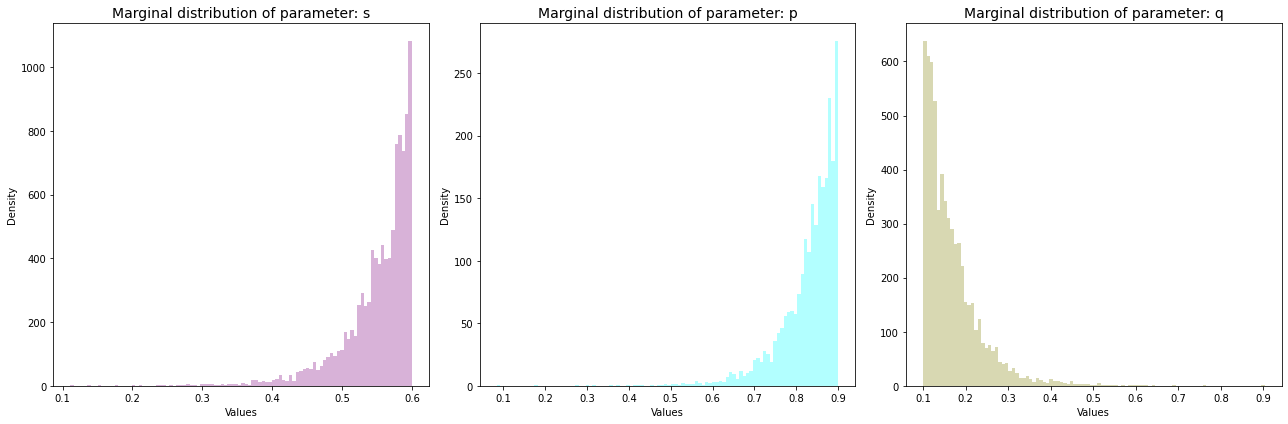

In [45]:
import matplotlib.pyplot as plt

df = pd.DataFrame(samples, columns=['s', 'p', 'q'])


def plot_marginal_distribution(samples, index, xlabel, ylabel, ax=None, color="lightblue", ec="red"):
    if ax is None:
        fig, axes = plt.subplots()

    ax.hist(samples[:, index], bins=100, alpha=0.3, density=True, color=color)
    plt.setp(ax, xticklabels=[round(i,1) for i in np.arange(0, 1.1, 0.1)])
    ax.set_title('Marginal distribution of parameter: {}'.format(xlabel),fontsize = 14)
    ax.set_xlabel('Values')
    ax.set_ylabel(ylabel)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
plot_marginal_distribution(samples, 0, ax=ax1, xlabel='s', ylabel='Density', color='purple')
plot_marginal_distribution(samples, 1, ax=ax2, xlabel='p', ylabel='Density', color='cyan')
plot_marginal_distribution(samples, 2, ax=ax3, xlabel='q', ylabel='Density', color='olive')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


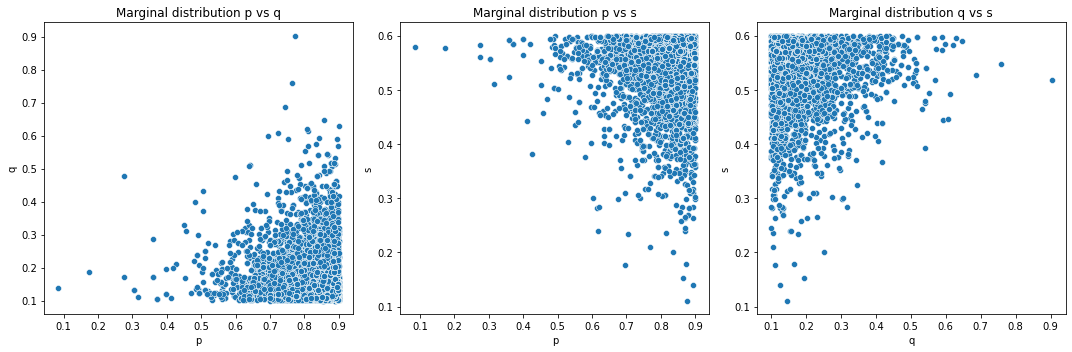

In [46]:
import seaborn as sns

def plot_marginal_scatter(samples, index1, index2, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
   
    g = sns.scatterplot(df[index1],df[index2], ax=ax)
    plt.setp(ax, xticklabels=[round(i,1) for i in np.arange(0, 1.1, 0.1)],
                 yticklabels=[round(i,1) for i in np.arange(0, 1.1, 0.1)])
    g.set_title('Marginal distribution {} vs {}'.format(index1,index2))
    return g
      

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
plot_marginal_scatter(df, 'p','q', ax=ax1)
plot_marginal_scatter(df, 'p','s', ax=ax2)
plot_marginal_scatter(df, 'q','s', ax=ax3)
plt.tight_layout()
plt.show()

# Question 5

**Finding the maximum, average and median of each parameter**

In [47]:
max_s = max(samples[:, 0])
max_p = max(samples[:, 1])
max_q = max(samples[:, 2])

values= [max_s, max_p, max_q]
for i in range(len(values)):
  params=['s', 'p', 'q']
  print('The maximum value of parameter "{parameter}" is: {value}'.format(parameter=params[i], value=values[i]))
  print()

The maximum value of parameter "s" is: 0.9999990646844158

The maximum value of parameter "p" is: 0.9999999510444634

The maximum value of parameter "q" is: 0.016055001336014032



In [48]:
mean_s = samples[:, 0].mean()
mean_p = samples[:, 1].mean()
mean_q = samples[:, 2].mean()

values= [mean_s, mean_p, mean_q]
for i in range(len(values)):
  params=['s', 'p', 'q']
  print('The average value of parameter "{parameter}" is: {value}'.format(parameter=params[i], value=values[i]))
  print()

The average value of parameter "s" is: 0.9990144744325519

The average value of parameter "p" is: 0.9964315357288993

The average value of parameter "q" is: 0.0013496866282770657



In [49]:
median_s = np.median(samples[:, 0])
median_p = np.median(samples[:, 1])
median_q = np.median(samples[:, 2])

values= [median_s, median_p, median_q]
for i in range(len(values)):
  params=['s', 'p', 'q']
  print('The median value of parameter "{parameter}" is: {value}'.format(parameter=params[i], value=values[i]))
  print()

The median value of parameter "s" is: 0.9993130247280698

The median value of parameter "p" is: 0.9973790238349464

The median value of parameter "q" is: 0.0009791540346913194



# Question 6

**Finding the smallest area in which the parameter is found with a 90% confidence.**

על מנת למצוא תחום בו כל פרמטר נמצא עם סיכוי 90 אחוז.

נמצא קודם את הגבול עליון וגבול תחתון.

לדוגמא:

נמצא את האחוזון ה-5 ואת האחוזון ה-95

נחשב את ההפרש ביניהם

נשמור את התואה בצד

ונחזור על אותה פעולה עבור כל זוג גבולות האפשריים

(p1:p91) (p2:p92) (p3:p93) (p4:p94) (p5:p95) (p6:p96) (p7:p97) (p8:p98) 
(p9:p99) (p10:p100)

נמצא את זוג הגבולות שנותן תחום הכי קטן

כלומר נוציא ערך הכי קטן מהמערך ששמרנו לתוכו את התוצאות 

In [27]:
# Example:
lower_bound_s = np.percentile(samples[:, 0], 5)
upper_bound_s = np.percentile(samples[:, 0], 95)

lower_bound_p = np.percentile(samples[:, 1], 5)
upper_bound_p = np.percentile(samples[:, 1], 95)

lower_bound_q = np.percentile(samples[:, 2], 5)
upper_bound_q = np.percentile(samples[:, 2], 95)

In [82]:
# Algorithm for finding the smallest area with 90% confidence

def find_interval(lower, upper, data, column=0):
   l = np.percentile(data[:, column], lower)
   u = np.percentile(data[:, column], upper)
   return u-l

s_intervals = {}
p_intervals = {}
q_intervals = {}

intervals=[s_intervals, p_intervals, q_intervals]

i=0 
while i<=10:
  s_intervals["{}:{}".format(i,i+90)]=find_interval(i,i+90,samples,0)
  p_intervals["{}:{}".format(i,i+90)]=find_interval(i,i+90,samples,1)
  q_intervals["{}:{}".format(i,i+90)]=find_interval(i,i+90,samples,2)
  i+=1


for i in range(len(intervals)):
   cols=['s','p','q']
   print('The smallest area in which parameter "{}" is found = {}'.format(cols[i], min(list(intervals[i].values()))))
   key=list(intervals[i].values()).index(min(list(intervals[i].values()))) 
   print('These area is between procentiles: {}'.format(list(p_intervals.keys())[key]))
   print('All possible areas of 90% confidence:')
   print(intervals[i])
   print()

The smallest area in which parameter "s" is found = 0.002269442581989245
These area is between procentiles: 10:100
All possible areas of 90% confidence:
{'0:90': 0.009679737086753515, '1:91': 0.004469292914764167, '2:92': 0.0037944149947696237, '3:93': 0.0033946198742774714, '4:94': 0.003106583076666114, '5:95': 0.0029468373076012577, '6:96': 0.002761243722908757, '7:97': 0.002614743366582295, '8:98': 0.0024826788099142627, '9:99': 0.002369399505835701, '10:100': 0.002269442581989245}

The smallest area in which parameter "p" is found = 0.007987078573208461
These area is between procentiles: 10:100
All possible areas of 90% confidence:
{'0:90': 0.040437239469959696, '1:91': 0.016167336552117217, '2:92': 0.013014725820174267, '3:93': 0.01193356262306644, '4:94': 0.010864262451316442, '5:95': 0.010051609089997693, '6:96': 0.009620732703749746, '7:97': 0.009203569161004954, '8:98': 0.008702197119129895, '9:99': 0.00835350577400562, '10:100': 0.007987078573208461}

The smallest area in whi